# **AI Agents for Social Sciences: Week 2 Homework Modules**

- __Instructor:__ James Evans

- __Notebook Author & TAs:__ Shiyang Lai, Gio Choi, Avi Oberoi, Jesse Zhou

__Perform 3 out of this week's following 5 modules:__

<font color="orange">NOTE: We acknowledge that this is another notebook with a lot of code - but do not fear, it is only here to help you. You don't need to run all of it, and in many cases we pursue multiple ways to perform an activity, such as a word or sentence embedding. Think of all of the code as a resource to help you do the HW and your group projects.</font>

<font color="orange">NOTE: As usual, we recommend looking at the HW first before going through and running each of the cells, as some of it may not be relevant to what you seek to accomplish. This notebook is expected to be a resource on the different kinds of static neural based methods for text, which can be quickly adapted for your analysis of choice. You are not expected to master all of these methods, but to be aware of them. The homework will require you to use a variety of them to come up with a meaningful exploration and analysis of your textual dataset.</font>

## 1. **Neural Embeddings**

### **Summary:**
In this module, we introduce multiple techniques to construct your own word and document embeddings through different forms of neural networks such as Word2Vec, FastText, GloVe, etc. Furthermore, we will also guide you to debias a word embedding space and use text embeddings for downstream tasks such as deep-learning-based topic analysis.

### **Tasks/Questions:**

**1)** Train a word2vec model on your dataset. Explore some of the relationships between words which are learned on your dataset.

**2)** Perform an advanced word embedding analysis, such as visualising embeddings, creating dynamic embeddings, projecting embeddings on distinct dimensions, debiasing, retrofitting, or aligning.

**3)** Use the spaCy language model's Computational Linguistics functions to explore 20 sentences in your documents from the corpora.

**4)** How do you think such methods can be useful in your social scientific research? Hint: think of what different parts of speech or entities might entail!

**5)** Create 3 different neural representations of each of the documents in your corpus.

**6)** Compare between a subset of documents for each of these representations and calculate similarities between documents.

**7)** Use these representations of documents to perform a classification task on your data based on labels or possible natural categories.

**8)** Use either the inverse of distributed representations or discourse atoms on your dataset.

## 2. **Encoders, Decoders, Seq2Seq and Attention**

### **Summary:**
Encoder-Decoder models are a powerful way to deal with sequence to sequence problems - this kind of setup is also called seq2seq. When we use this kind of sequence to sequence alignment and also map certain parts of the sequences with different values (a process called Attention), the sequence to sequence prediction task performance increases. In this section and the next we will focus on Machine Translation as the domain to try Encoder and Decoder tasks, without and then with attention.

### **Tasks/Questions:**

**1)** Use a large pre-trained language model for sequence classification, question answering, language modeling, or any other NLP task. Fine-tune the model on your dataset.

**2)** What model did you use? How did your model perform?

**3)** Build a SHAP-based explainer of your model for 3 inputs from your data. Describe the feature importance relationships you see for each of your inputs.

**4)** Build a SHAP-based explainer of your model over a substantial subsample of your data. Describe the aggregate feature importance values you obtain for each of your labels.

## 3. **Transformers**

### **Summary:**
Transformers are a neural architecture comprised of encoder component and a decoder component, which use self-attention to reach high levels of performance for sequence to sequence tasks (and drops all RNN components!) This is THE most popular archetecture for generative language models as of now. GPT-N is essentially a variant of this model family.

### **Tasks/Questions:**

**1)** Use a large pre-trained language model different from the one used in the prior module's assignment for sequence classification, question answering, language modeling, or any other NLP task. Fine-tune the model on your dataset.

**2)** What model did you use? How did your model perform?

**3)** BONUS: use a PyTorch or Keras sequence to sequence model to perform a task other than machine translation.

## 4. **BERT Word and Sentence Embeddings**

### **Summary:**
The BERT (Bidirectional Encoder Representations from Transformers) model is a powerful deep learning model introduced by Google in 2018. It reads text in both directions, helping it understand the full context of words in a sentence. BERT has been used for many language tasks like answering questions, classifying text, and analyzing sentiment. Its success has inspired improved versions and made it a key tool in natural language processing.

### **Tasks/Questions:**

**1)** Use BERT or a related model to create word and sentence embeddings from your own corpus, and perform different similarity metrics on your embeddings, as well as perplexity measures.

**2)** How does fine-tuning your model change the similarity and perplexity metrics?

**3)** BONUS: Fine tune a Transformers based model and use bertviz to visualise its attention layers using two sentences. Compare this to two sentences on a non fine tuned model.

## 5. **Diffusion Models**

### **Summary:**
Here, we move to the frontier of contemporary foundational language model research by introducing a relatively new architectural paradigm that departs from the dominant Transformer framework: diffusion models. Originally developed and popularized for image generation, diffusion models have recently been adapted to text generation tasks. These models generate outputs through an iterative denoising process, starting from random noise and progressively refining it into coherent sequences. Unlike traditional autoregressive language models, diffusion-based approaches can generate tokens in parallel, or selectively incorporate sequential dependencies to balance efficiency and expressiveness. In this brief tutorial, we offer a simple, concrete illustration of how diffusion models can be applied to text generation.

### **Tasks/Questions:**

**1)** Play with hyper-parameters in `DiffusionConfig` class and report how 1 or 2 of them impacts model learning.

**2)** Propose one application of diffusion-based language models.

**3)** BONUS: What unique properties of language do diffusion-based embeddings encode that transformer-based embeddings fail to capture?


In [ ]:
# @markdown Mark the Modules you completed
Neural Embeddings = False  # @param {type:"boolean"}
Encoders, Decoders, Seq2Seq and Attention = False  # @param {type:"boolean"}
Transformers = False  # @param {type:"boolean"}
BERT Word and Sentence Embeddings and Bayesian Optimization = False  # @param {type:"boolean"}
Diffusion Models = False  # @param {type:"boolean"}

SyntaxError: invalid syntax (ipython-input-3762073097.py, line 2)

# Module 0: Installation and Preparation

## Imports and Installations

In [ ]:
# Let's quitely install some necessary dependencies here
!pip install -q git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git
!pip install -q -U yellowbrick
!pip install -q umap-learn
!pip install -q transformers
!pip install -q shap
!pip install -q datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# text related packages
import gensim
import spacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import lucem_illud

# ML and DL packages
import sklearn
import keras

# generally not good practice, as we want to see warnings - but in this case, there are no critical warnings
import warnings
warnings.filterwarnings('ignore')

# Module 1: Neural Embeddings

We'll now start using neural networks - not explicitly, by building models using Keras and PyTorch, but by using different tricks in training models, we can get a network to end up learning different useful notions of semantics - we then use this model's final embedding (or other aspect) to extract useful features for our text data.

## Shallow Neural Embeddings

***Word2vec***, much like methods like LSA which we saw earlier, is based on theories of distributional semantics - words that appear around each other are more likely to mean similar things than words that do not appear around each other. Keeping this in mind, our job is to create a high dimensional space where these semantic relations are preserved. The innovation in word2vec is the realization that we can use unlabelled, running text in sentences as inputs for a supervised learning algorithm--as a self-supervision task. It is supervised because we use the words in a sentence to serve as positive and negative examples. Let’s break this down:

... "use the kitchen knife to chop the vegetables"…

**C1   C2   C3   T   C4   C5   C6   C7**

Here, the target word is *knife*, and the context words are the ones in its immediate (6-word) window.
The first word2vec method we'll see is called skipgram, where the task is to assign a probability for how likely it is that the context window appears around the target word. In the training process, positive examples are samples of words and their context words, and negative examples are created by sampling from pairs of words that do not appear nearby one another.

This method of implementing word2vec is called *skipgram with negative sampling*. So while the algorithm tries to better learn which context words are likely to appear around a target word, it ends up pushing the embedded representations for every word so that they are located optimally (e.g., with minimal semantic distortion). In this process of adjusting embedding values, the algorithm brings semantically similar words close together in the resulting high dimensional space, and dissimilar words far away.

Another word2vec training method, *Continuous Bag of Words (CBOW)*, works in a similar fashion, and tries to predict the target word, given context. This is converse of skipgram, which tries to predict the context, given the target word. Skip-gram represents rare words and phrases well, often requiring more data for stable representations, while CBOW is several times faster to train than the skip-gram, but with slightly better accuracy for the frequent words in its prediction task. The popular gensim implementation of word2vec has both the methods included.

The code below has two examples, one for loading a pre-trained word2vec model, and one for training our own model, with an explanation of the hyperparameters.

### Training Word Embeddings

In the first example, we train a word2vec model on the hobbies dataset with a dimension size of 100 and window of 10, meaning the context window is 10 words. The training process goes through 10 iterations.

In [ ]:
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import preprocess_documents
from gensim.corpora import Dictionary
from yellowbrick.datasets import load_hobbies

corpus = load_hobbies()
len(corpus.data)

In [ ]:
print("Example 1")
print("Text   :", corpus.data[0])
print("Label  :", corpus.target[0])
print("\n" + "-"*60 + "\n")
print("Example 2")
print("Text   :", corpus.data[200])
print("Label  :", corpus.target[200])

Here, pre-processed texts is a file we created for our topic models, and includes stemmed words. This is a useful exercise to see how pre-processing effects word2vec models. Recall from earlier sections (and homeworks) that the deeper the model the less pre-processing we need to perform because the model can be trained to perform optimal processing.

<font color="red">NOTE: if using gensim v3.8.3, use "size" for dimension size, and if using v4 +, use "vector_size".</font>

In [ ]:
preprocessed_texts = preprocess_documents(corpus.data)
dictionary = Dictionary(preprocessed_texts)

In [ ]:
w2vmodel_cleaned = Word2Vec(preprocessed_texts,
                            vector_size=100,
                            window=10)

Let's test the model by looking up some words that we know are in the corpus and find similar words.

In [ ]:
def similar_words_df(model, word, topn=10):
    return pd.DataFrame(
        model.wv.most_similar(word, topn=topn),
        columns=["word", "cosine_similarity"]
    )

display(similar_words_df(w2vmodel_cleaned, "book"))
display(similar_words_df(w2vmodel_cleaned, "talk"))

<font color="orange">NOTE: it may soon become clear in the next section, but it isn't the best idea to use a corpus with stop words removed. Following from above, we lose a lot of potential relationships we can learn automatically!</font>

We don't always need to train our own models. One of the advantages of word embedding (and many deep learning) models is using pre-trained models, where the training has already been completed on a large and/or representative corpus or document collection. In the following lines of code we load either a [Google News model](https://drive.google.com/file/d/1TW3h1SIx__4Y6zEzLnrPry2Z-6BZgtyh/view?usp=sharing) (3+ GB), or a [model trained on NY Times data](https://drive.google.com/file/d/1xrs1UhTH5LPTBFLcflX-nQ86zwCAoLt5/view?usp=sharing) (30 MB). If you have Colab Pro, you can try the heavier model. I have used the mounting capacity on google drive here. You can also just upload the file if you prefer.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model_address = "/content/nytimes_cbow.reduced.txt"

wv = gensim.models.KeyedVectors.load_word2vec_format(model_address)
nytimes_w2v_model = Word2Vec(vector_size=wv.vector_size, min_count=1)
nytimes_w2v_model.build_vocab([wv.index_to_key])

# Assign the vectors to the model's wv
nytimes_w2v_model.wv.vectors = wv.vectors
nytimes_w2v_model.wv.index_to_key = wv.index_to_key
nytimes_w2v_model.wv.key_to_index = wv.key_to_index

In [ ]:
display(similar_words_df(nytimes_w2v_model, "book"))
display(similar_words_df(nytimes_w2v_model, "talk"))

Note how the most similar words make a lot more sense with the pre-trained, larger, ny times word2vec model. Also note what lemmatizing words can dramatically change the results of word2vec! Why? Because we are removing specificity in context that our model can otherwise learn. The smaller the corpus, the more useful to remove content (e.g., stem); the larger the corpus, the more useful to retain it.

Just so we have a comparison, we also create a non-cleaned corpus of the hobbies dataset on which to build an embedding model.

In [ ]:
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation

CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation]

tokenized_texts = []
for doc in corpus.data:
  tokenized_texts.append(preprocess_string(doc, CUSTOM_FILTERS))

print(tokenized_texts[0][0:10])

<font color="orange">NOTE: if using gensim v3.8.3, use "size" for dimension size, and if using v4 +, use "vector_size"</font>

In [ ]:
w2vmodel = Word2Vec(tokenized_texts,
        vector_size=100,
        window=10)

### Word and Context Embeddings

The gensim model allows us to access both the target embedding for the word itself, and the context embedding for words. These two embedding are multiplied to recreate the original word space, revealing the way in which neural embeddings perform (and are optimized through) matrix factorization of the original word-by-context matrix. The target embedding is what is most commonly used, though in some cases the context is also used along with the target. We show how to use both.

The context vector is not showcased in the documentation - we unearthed it thanks to this helpful [StackOverflow link](https://stackoverflow.com/questions/39406092/how-to-get-both-the-word-embeddings-vector-and-context-vector-of-a-given-word-by).

In [ ]:
# target embedding
book_embedding_ny = nytimes_w2v_model.wv["book"]
book_embedding = w2vmodel.wv["book"]

# context embedding
book_idx = w2vmodel.wv.key_to_index["book"]
book_context_embedding = w2vmodel.syn1neg[book_idx]

book_idx = nytimes_w2v_model.wv.key_to_index["book"]
book_context_embedding_ny = nytimes_w2v_model.syn1neg[book_idx]

### Exploring Semantics with Embeddings

So what do these vectors encapsulate? We've seen before that it is some notion of meaning, as captured by distributional semantics, with some aspect of syntactic information. How do we then use these word embeddings? Because they capture semantic information in a space that allows for semantic decomposition, a common task is to perform semantic arithmetic and analogy tasks.

Let's try find the word that least matches the others within a word set (cosine similarity).

In [ ]:
nytimes_w2v_model.wv.doesnt_match(['books', 'books', 'novel', 'memoir', 'truck'])

We can also perform arithmetic on vectors using the most_similar function we saw earlier. One of the more popular, earlier examples demonstrating the analogous power of word2vec models was ``vector['king'] - vector['man'] + vector['woman'] = vector['queen']``, where the idea is that we are traversing a "gender" dimension and looking at either end of it.

Let's see how that works on our NY Times model.

In [ ]:
display(pd.DataFrame(nytimes_w2v_model.wv.most_similar(positive=['king', 'woman'], negative = ['man']), columns=["word", "cosine_similarity"]))

If we shift `['king']` in the direction of woman, we get to `['royal']`...and almost to `['queen']` (try adding woman twice!) Interestingly, `['prince']` is a similarly effeminate royal. We can begin to see the utility of these models, even if they do capture all semantic associations as we might imagine. Larger language models capture even more sophisticated relationships.

In the rest of this section we will see other ways in which we can use and explore word embeddings.

### Visualising Word Embeddings

Most methods involving visualising word embeddings involve projecting words into a lower dimensional space and seeing which words appear nearby one another.

See this [example by TTIC](https://home.ttic.edu/~kgimpel/wordembviz/wordembviz.html) which visualises different sets of word embeddings, using t-SNE.

The code below gives you an idea of how you might do it yourself.

In [ ]:
import matplotlib.pyplot as plt

numWords = 50
targetWords = nytimes_w2v_model.wv.index_to_key[200: 200 + numWords]

wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(nytimes_w2v_model.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

Then we can use PCA to reduce the dimesions (e.g., to 50), and T-SNE to project them down to the two we will visualize. We note that this is nondeterministic process, and so you can repeat and achieve alternative projectsions/visualizations of the words. We also recommend exploring UMAP, which allows projections to any arbitrary number of dimensions.

In [ ]:
import sklearn.decomposition
import sklearn.manifold

pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

We now can plot the points

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

Note how the TTIC projection was a lot more satisfactory because it projected related but differentiated words. Our example plots seemingly random words. We encourage that you try this example again with a curated list of words and see how the visualisation improves!

### Projecting Embeddings on Dimensions of Social Analysis

We can see how word2vec does remarkably well in capturing certain aspects of semantics! Word embeddings have a lot of utility outside of just looking at relations between words, though. Because words derive their meanings from various social characteristics and dimensions, it is possible for us to project word vectors onto word-defined dimensions to see where they lie. We can create these dimensions by choosing words which that might anchor the dimension and then project other words onto this dimension. For example, if we were trying to find a gender dimension, we might make a vector between the words he, him, man and she, her, woman, and so on. Then, with a cosine projection, we can get a value of where our word of choice might lie on this dimension, revealing to us how “gendered” the word is. The following snippets of code implements this for various such dimensions. Using such a technique for social scientific analysis as described by Kozlowski et al 2019; it can be very easily extended for many business and analytical solutions.


First we can visualize with dimension reduction

In [ ]:
#words to create dimensions
tnytTargetWords = ['man','him','he', 'woman', 'her', 'she', 'black','blacks','African', 'white', 'whites', 'Caucasian', 'rich', 'richer', 'richest', 'expensive', 'wealthy', 'poor', 'poorer', 'poorest', 'cheap', 'inexpensive']
#words we will be mapping
tnytTargetWords += ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse", "steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry", "basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]


wordsSubMatrix = []
for word in tnytTargetWords:
    wordsSubMatrix.append(nytimes_w2v_model.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

In [ ]:
pcaWordsNYT = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_dataNYT = pcaWordsNYT.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsNYT = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataNYT)

In [ ]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsNYT[:, 0], tsneWordsNYT[:, 1], alpha = 0) #Making the points invisible

for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWordsNYT[:, 0][i],tsneWordsNYT[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))

plt.xticks(())
plt.yticks(())
plt.show()

Define some convenient functions for getting dimensions.

In [ ]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model.wv[x]) for x in positives]) - sum([normalize(model.wv[y]) for y in negatives])
    return diff

Let's calculate three dimensions: gender, race, and class.

In [ ]:
Gender = dimension(nytimes_w2v_model, ['man','him','he'], ['woman', 'her', 'she'])
Race = dimension(nytimes_w2v_model, ['black','blacks','African'], ['white', 'whites', 'Caucasian'])
Class = dimension(nytimes_w2v_model, ['rich', 'richer', 'richest', 'expensive', 'wealthy'], ['poor', 'poorer', 'poorest', 'cheap', 'inexpensive'])

Here we have some words.

In [ ]:
Occupations = ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse"]

Foods = ["steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry"]

Sports  = ["basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]

Define a function to project words in a word list to each of the three dimensions.

In [ ]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_w2v_model.wv[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_w2v_model.wv[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_w2v_model.wv[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
    df = pd.DataFrame({'gender': g, 'race': r, 'class': c}, index = word_list)
    return df

Get the projections.

In [ ]:
OCCdf = makeDF(nytimes_w2v_model, Occupations)
Fooddf = makeDF(nytimes_w2v_model, Foods)
Sportsdf = makeDF(nytimes_w2v_model, Sports)

Define some useful functions for plotting.

In [ ]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

Plot the occupational words in each of the three dimensions.

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, OCCdf, 'class')
plt.show()

Foods:

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Fooddf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Fooddf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Fooddf, 'class')
plt.show()

Sports:

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Sportsdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Sportsdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Sportsdf, 'class')
plt.show()

### Debiasing Word Embeddings

As we are creating these dimensions, it may become clear that such an approach may be adapted to measure socio-cultural biases in embeddings. Language models are trained on human generated corpora and text, so they end up reflecting the social and cultural biases present in text (Caliskan et al. 2017). Keeping in mind that the semantics we generate from natural language corpora reflect real world biases which may be harmful (for e.g, in the non modified,  biased models, man:computer programer:: woman:homemaker), there has been significant work in attempting to correct these biases (Bolukbasi et al 2016). These methods work similarly to the projection based methods we explored, and the following code includes code to debias embedding models so that generated associations (e.g., as in a job ad) do not propagate the bias.

In the following section, we use the code from this repository associated with the famous "Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings" paper: https://github.com/tolga-b/debiaswe


#### Hands-on Tutorial: Quantifying and Reducing Gender Stereotypes in Word Embeddings

Ensuring fairness in algorithmically-driven decision-making is important to avoid inadvertent cases of bias and perpetuation of harmful stereotypes. However, modern natural language processing techniques, which learn model parameters based on data, might rely on implicit biases presented in the data to make undesirable stereotypical associations. Such a danger faces us with word embeddings, a popular framework to represent text data as vectors which has been used in many machine learning and natural language processing tasks. Recent results ([1](https://arxiv.org/abs/1607.06520), [2](https://arxiv.org/abs/1608.07187)) show that word embeddings trained on a Google News articles exhibit extensive female/male gender stereotypes. This raises concerns because their widespread use may tend to amplify these biases.

In the following, we provide step-by-step instructions to demonstrate and quanitfy the biases in word embedding.



In [ ]:
# Setup:
# Clone the code repository from https://github.com/tolga-b/debiaswe.git
!mkdir debiaswe_tutorial
!cd debiaswe_tutorial
!git clone https://github.com/tolga-b/debiaswe.git

# To reduce the time of downloading data, we provide as subset of GoogleNews-vectors in the following location:
# https://drive.google.com/file/d/1NH6jcrg8SXbnhpIXRIXF_-KUE7wGxGaG/view?usp=sharing

# For full embeddings:
# Download embeddings at https://github.com/tolga-b/debiaswe and put them on the following directory
# embeddings/GoogleNews-vectors-negative300-hard-debiased.bin
# embeddings/GoogleNews-vectors-negative300.bin

In [ ]:
from __future__ import print_function, division
%matplotlib inline
from matplotlib import pyplot as plt
import json
import random
import numpy as np

import debiaswe.debiaswe as dwe
import debiaswe.debiaswe.we as we
from debiaswe.debiaswe.we import WordEmbedding
from debiaswe.debiaswe.data import load_professions

#### Part 1: Gender Bias in Word Embedding


##### Step 1: Load data
We first load the word embedding trained on a corpus of Google News texts consisting of 3 million English words and terms. The embedding maps each word into a 300-dimension vector.

In [ ]:
# load google news word2vec
E = WordEmbedding('/content/drive/MyDrive/w2v_gnews_small.txt')      # change this path to the location you uploaded the file

# load professions
professions = load_professions()
profession_words = [p[0] for p in professions]

#### Step 2: Define gender direction

We define gender direction by the direction of she - he because they are frequent and do not have alternative word senses (e.g., man can also refer to mankind).

In [ ]:
# gender direction
v_gender = E.diff('she', 'he')

#### Step 3: Generating analogies of "Man: x :: Woman : y"

We show that the word embedding model generates gender-streotypical analogy pairs.
To generate the analogy pairs, we use an analogy score defined in the paper mentioned above. This score finds word pairs well aligned with gender direction as well as within a short distance from each other to preserve topic consistency.


In [ ]:
# analogies gender
a_gender = E.best_analogies_dist_thresh(v_gender)

for (a,b,c) in a_gender:
    print(a+"-"+b)

NameError: name 'E' is not defined

#### Step 4: Analyzing gender bias in word vectors asscoiated with professions

Next, we show that many occupations are unintendedly associated with either male of female by projecting their word vectors onto the gender dimension.

The script will output the profession words sorted with respect to the projection score in the direction of gender.

In [ ]:
# profession analysis gender
sp = sorted([(E.v(w).dot(v_gender), w) for w in profession_words if w in E.index])

sp[0:20], sp[-20:]

#### Part 2 Racial Bias

##### Step 5: Define racial direction
We define racial direction based on the common names in different Demographic groups.

In [ ]:
names = ["Emily", "Aisha", "Anne", "Keisha", "Jill", "Tamika", "Allison", "Lakisha", "Laurie", "Tanisha", "Sarah",
         "Latoya", "Meredith", "Kenya", "Carrie", "Latonya", "Kristen", "Ebony", "Todd", "Rasheed", "Neil", "Tremayne",
         "Geoffrey", "Kareem", "Brett", "Darnell", "Brendan", "Tyrone", "Greg", "Hakim", "Matthew", "Jamal", "Jay",
         "Leroy", "Brad", "Jermaine"]
names_group1 = [names[2 * i] for i in range(len(names) // 2)]
names_group2 = [names[2 * i + 1] for i in range(len(names) // 2)]

In [ ]:
# racial direction
vs = [sum(E.v(w) for w in names if w in E.index) for names in (names_group2, names_group1)]
vs = [v / np.linalg.norm(v) for v in vs]

v_racial = vs[1] - vs[0]
v_racial = v_racial / np.linalg.norm(v_racial)

#### Step 6: Generating racial biased analogies

Similar to Step 3, we generate analogies that align with the racial dimension.

In [ ]:
# racial analogies
a_racial = E.best_analogies_dist_thresh(v_racial)

for (a,b,c) in a_racial:
    print(a+"-"+b)

#### Step 7: Analyzing racial bias in word vectors asscoiated with professions

Similar to Step 4, we project occpurations onto the racial dimension.

In [ ]:
# profession analysis racial
sp = sorted([(E.v(w).dot(v_racial), w) for w in profession_words])

sp[0:20], sp[-20:]

#### Practice

Repeat Step 2-4 with debiased word embedding.

You can use debiaswe debias function to do the debiasing with word sets of your choosing

You can leave equalize_pairs and gender_specific_words blank when coming up with your own groups. We give an example for the case of gender below for you to warm up.

<font color="red">Resolving the `ModuleNotFoundError: No module named 'debiaswe.debiasewe'` Issue</font>

If you encounter the error `ModuleNotFoundError: No module named 'debiaswe.debiasewe'`, follow these steps to resolve it:

1. Navigate to the `debiaswe` directory, then to the nested `debiaswe` folder, and open the `debiaswe.py` file.
2. Locate **line 2** in the file.
3. Replace the following line:

   ```python
   import we
   ```
   with:
   ```python
   from . import we
   ```

In [ ]:
from debiaswe.debiaswe.debias import debias

In [ ]:
# Lets load some gender related word lists to help us with debiasing
with open('debiaswe/data/definitional_pairs.json', "r") as f:
    defs = json.load(f)
print("definitional", defs)

with open('debiaswe/data/equalize_pairs.json', "r") as f:
    equalize_pairs = json.load(f)

with open('debiaswe/data/gender_specific_seed.json', "r") as f:
    gender_specific_words = json.load(f)
print("gender specific", len(gender_specific_words), gender_specific_words[:10])

In [ ]:
debias(E, gender_specific_words, defs, equalize_pairs)

In [ ]:
# profession analysis gender
sp_debiased = sorted([(E.v(w).dot(v_gender), w) for w in profession_words])

sp_debiased[0:20], sp_debiased[-20:]

In [ ]:
# analogies gender
a_gender_debiased = E.best_analogies_dist_thresh(v_gender)

for (a,b,c) in a_gender_debiased:
    print(a+"-"+b)

### Retrofitting Word Vectors

We can debias word embeddings (or try to, at least) based on how we can move word vectors around in this high dimensional space. Word2vec and related methods are static in that they are trained only once and word vectors don’t change based on context. Nevertheless, research by (Faruqui et al. 2015) has shown that we can improve the performance of word embeddings on a series of tasks by retrofitting them, which involves using an external lexicon (collection of words) to move certain words closer together or farther apart. While the authors use this to improve performance on a series of semantic tasks, we can be creative in how we want to retrofit our embeddings. Below are instructions for performing this kind of task.

This is taken from the repository from the paper cited above:
Retrofitting word vectors: https://github.com/mfaruqui/retrofitting

For the [retrofit.py](https://github.com/mfaruqui/retrofitting/blob/master/retrofit.py) file, use this link. The code is also copy pasted in the code cell below this.

#### Data you need

Word vector file
Lexicon file (provided here)
Each vector file should have one word vector per line as follows (space delimited):-

the -1.0 2.4 -0.3 ...

#### Running the program

python retrofit.py -i word_vec_file -l lexicon_file -n num_iter -o out_vec_file

python retrofit.py -i sample_vec.txt -l lexicons/ppdb-xl.txt -n 10 -o out_vec.txt

where, 'n' is an integer which specifies the number of iterations for which the optimization is to be performed. Usually n = 10 gives reasonable results.

#### Output File: out_vec.txt

which are your new retrofitted and (hopefully) improved word vectors, enjoy !



In [ ]:
import argparse
import gzip
import math
import numpy
import re
import sys

from copy import deepcopy

isNumber = re.compile(r'\d+.*')
def norm_word(word):
  if isNumber.search(word.lower()):
    return '---num---'
  elif re.sub(r'\W+', '', word) == '':
    return '---punc---'
  else:
    return word.lower()

''' Read all the word vectors and normalize them '''
def read_word_vecs(filename):
  wordVectors = {}
  if filename.endswith('.gz'): fileObject = gzip.open(filename, 'r')
  else: fileObject = open(filename, 'r')

  for line in fileObject:
    line = line.strip().lower()
    word = line.split()[0]
    wordVectors[word] = numpy.zeros(len(line.split())-1, dtype=float)
    for index, vecVal in enumerate(line.split()[1:]):
      wordVectors[word][index] = float(vecVal)
    ''' normalize weight vector '''
    wordVectors[word] /= math.sqrt((wordVectors[word]**2).sum() + 1e-6)

  sys.stderr.write("Vectors read from: "+filename+" \n")
  return wordVectors

''' Write word vectors to file '''
def print_word_vecs(wordVectors, outFileName):
  sys.stderr.write('\nWriting down the vectors in '+outFileName+'\n')
  outFile = open(outFileName, 'w')
  for word, values in wordVectors.iteritems():
    outFile.write(word+' ')
    for val in wordVectors[word]:
      outFile.write('%.4f' %(val)+' ')
    outFile.write('\n')
  outFile.close()

''' Read the PPDB word relations as a dictionary '''
def read_lexicon(filename):
  lexicon = {}
  for line in open(filename, 'r'):
    words = line.lower().strip().split()
    lexicon[norm_word(words[0])] = [norm_word(word) for word in words[1:]]
  return lexicon

''' Retrofit word vectors to a lexicon '''
def retrofit(wordVecs, lexicon, numIters):
  newWordVecs = deepcopy(wordVecs)
  wvVocab = set(newWordVecs.keys())
  loopVocab = wvVocab.intersection(set(lexicon.keys()))
  for it in range(numIters):
    # loop through every node also in ontology (else just use data estimate)
    for word in loopVocab:
      wordNeighbours = set(lexicon[word]).intersection(wvVocab)
      numNeighbours = len(wordNeighbours)
      #no neighbours, pass - use data estimate
      if numNeighbours == 0:
        continue
      # the weight of the data estimate if the number of neighbours
      newVec = numNeighbours * wordVecs[word]
      # loop over neighbours and add to new vector (currently with weight 1)
      for ppWord in wordNeighbours:
        newVec += newWordVecs[ppWord]
      newWordVecs[word] = newVec/(2*numNeighbours)
  return newWordVecs

if __name__=='__main__':

  parser = argparse.ArgumentParser()
  parser.add_argument("-i", "--input", type=str, default=None, help="Input word vecs")
  parser.add_argument("-l", "--lexicon", type=str, default=None, help="Lexicon file name")
  parser.add_argument("-o", "--output", type=str, help="Output word vecs")
  parser.add_argument("-n", "--numiter", type=int, default=10, help="Num iterations")
  args = parser.parse_args()

  wordVecs = read_word_vecs(args.input)
  lexicon = read_lexicon(args.lexicon)
  numIter = int(args.numiter)
  outFileName = args.output

  ''' Enrich the word vectors using ppdb and print the enriched vectors '''
  print_word_vecs(retrofit(wordVecs, lexicon, numIter), outFileName)

### Aligning Word Embeddings

We've explored alignment in some detail in tutorial 2.2, on Data Integration and Alignment. Specifically, we looked at alignment across time and across languages -  in this section, we will revisit these examples.


NOTE: the following section has previously seen code.

#### Time based data

In order to explore this, let's get some data that follows a time trend. We'll look at conference proceedings from the American Society for Clinical Oncologists. You can download the data [here](https://drive.google.com/file/d/1R9EiThdJQ3vY84xcoPJGUBeqvemu_o8L/view?usp=sharing).

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

ascoDF = pd.read_csv("/content/ASCO_abstracts.csv", index_col=0, on_bad_lines='skip', delimiter=',')
# to speed up...
ascoDF = ascoDF.sample(frac=0.05, random_state=60615)

In [ ]:
# This may take quite a while to finish....
# Tokenize sentences with a progress bar
ascoDF['tokenized_sents'] = ascoDF['Body'].progress_apply(
    lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)]
)

# Normalize tokens with a progress bar
ascoDF['normalized_sents'] = ascoDF['tokenized_sents'].progress_apply(
    lambda x: [lucem_illud.normalizeTokens(s) for s in x]
)

In [ ]:
import copy

#### Cross Temporal Alignment

Below is code that aligns the dimensions of multiple embeddings arrayed over time or some other dimension and allow identification of semantic change as the word vectors change their loadings for focal words. This code comes from the approach piloted at Stanford by William Hamilton, Daniel Jurafsky and Jure Lescovec [here](https://arxiv.org/pdf/1605.09096.pdf).

In this case we train the models ourselves instead of using a pre-trained model, so this might take some time.

In [ ]:
def calc_vectors_norm(model):
    """
    Returns a manually normalized version of the Gensim model's vectors
    as a (num_words x embedding_dim) numpy array.
    """
    vectors = model.wv.vectors
    # If your model hasn't yet built vectors, you might need to handle that separately
    norms = np.sqrt((vectors ** 2).sum(axis=1, keepdims=True))
    return (vectors / norms).astype(np.float32)

def intersection_align_gensim(m1, m2, words=None):
    """
    Intersect two Gensim 4+ Word2Vec models m1 and m2 so they share the same vocabulary.
    If `words` is given, intersect that list/set as well.
    The models' vectors, key_to_index, and index_to_key are updated in place.

    Returns (m1, m2).
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.key_to_index.keys())
    vocab_m2 = set(m2.wv.key_to_index.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1.intersection(vocab_m2)
    if words:
        common_vocab = common_vocab.intersection(set(words))

    # If the vocab is already identical, just return
    if (vocab_m1 == common_vocab) and (vocab_m2 == common_vocab):
        return (m1, m2)

    # Otherwise, sort by descending frequency
    # Gensim 4+ stores counts in model.wv.get_vecattr(word, "count") (if available)
    def total_count(word):
        return (m1.wv.get_vecattr(word, "count") or 0) + \
               (m2.wv.get_vecattr(word, "count") or 0)

    common_vocab = list(common_vocab)
    common_vocab.sort(key=total_count, reverse=True)

    # Rebuild each model so it has only the common vocabulary
    for model in [m1, m2]:
        old_key_to_index = model.wv.key_to_index
        old_vectors = model.wv.vectors
        old_norms = calc_vectors_norm(model)  # We'll use this to preserve alignment

        # Identify the rows (indices) that correspond to the common vocab words
        indices = [old_key_to_index[w] for w in common_vocab]

        # Rebuild the main vectors
        new_vectors = old_norms[indices]
        model.wv.vectors = new_vectors
        model.wv.vectors_norm = None  # Force recalculation if needed

        # Rebuild key_to_index and index_to_key
        model.wv.key_to_index = {}
        model.wv.index_to_key = []
        for new_idx, word in enumerate(common_vocab):
            model.wv.key_to_index[word] = new_idx
            model.wv.index_to_key.append(word)

        # If you want to keep track of counts, you can also do something like:
        # for word in common_vocab:
        #     old_count = model.wv.get_vecattr(word, "count")
        #     if old_count is not None:
        #         model.wv.set_vecattr(word, "count", old_count)

    return (m1, m2)


def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """
    Procrustes-align two Gensim 4+ Word2Vec models (for comparing same words across models).

    1. Intersect their vocabularies (and optionally intersect with `words`).
    2. Align the `other_embed` model to the `base_embed` model via Procrustes.
    3. Modify `other_embed` in place and return it.
    """

    # Make (shallow) copies so we don't edit the originals
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)

    # 1. Intersect the vocabularies
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # 2. Get the normalized vectors from both
    base_vecs = calc_vectors_norm(in_base_embed)
    other_vecs = calc_vectors_norm(in_other_embed)

    # Dot product and SVD
    m = np.dot(other_vecs.T, base_vecs)
    u, _, v = np.linalg.svd(m)
    ortho = np.dot(u, v)  # orthogonal transformation

    # Apply the transformation to other_embed's vectors
    new_other_vecs = np.dot(calc_vectors_norm(other_embed), ortho)
    other_embed.wv.vectors = new_other_vecs
    other_embed.wv.vectors_norm = None  # reset, so Gensim can recalc norms if needed

    return other_embed

In [ ]:
def compareModels(df, category, sort=True):
    """
    Example function that trains a separate Word2Vec model for each distinct
    value of `df[category]`, then aligns them pairwise via Procrustes.
    """

    embeddings_raw = {}
    cats = sorted(set(df[category]))

    # Train a model per category (simplified example)
    for cat in cats:
        print(f"Embedding {cat}", end='\r')
        subsetDF = df[df[category] == cat]
        # Adjust Word2Vec parameters to your preference
        model = Word2Vec(
            sentences=subsetDF['normalized_sents'].sum(),
            vector_size=100,  # or any dimension you like
            min_count=1,
            workers=4
        )
        embeddings_raw[cat] = model

    # Align each model to the first model in cats, for instance
    embeddings_aligned = {}
    for outer_cat in cats:
        # Start with the base
        base_model = embeddings_raw[outer_cat]
        embeddings_aligned[outer_cat] = [base_model]
        for inner_cat in cats:
            if inner_cat == outer_cat:
                continue
            aligned = smart_procrustes_align_gensim(
                embeddings_aligned[outer_cat][-1],
                embeddings_raw[inner_cat]
            )
            embeddings_aligned[outer_cat].append(aligned)

    return embeddings_raw, embeddings_aligned

In [ ]:
rawEmbeddings, comparedEmbeddings = compareModels(ascoDF, 'Year')

This is the key to our aligning - the smart procrustes align method here is the one doing the aligning, and we are adding the alligned embeddings to the dictionary.

We need to compare them across all permutions so we will define another function to help, we will be using 1 - cosine similarity as that gives a more intitive range of 0-2 with low values meaning little change and high meaning lots of change.

In [ ]:
def getDivergenceDF(word, embeddingsDict):
    """
    Computes absolute (1 - cosine_similarity) for `word` between a 'base' model
    (index 0 in each category list) and each subsequent model (aligned versions).

    Parameters
    ----------
    word : str
        Target word.
    embeddingsDict : dict
        {
            category: [model_base, model_aligned1, model_aligned2, ...],
            ...
        }
        Each value is a list of Word2Vec models.

    Returns
    -------
    pd.DataFrame
        Rows are categories, columns are each aligned model's divergence from the base.
    """
    import numpy as np
    from sklearn.metrics.pairwise import cosine_similarity

    cats = sorted(embeddingsDict.keys())
    dists = {}

    for cat in cats:
        # Safety check: does this category have at least one model?
        if len(embeddingsDict[cat]) == 0:
            dists[cat] = []
            continue

        # The first model is our "base" model
        base_model = embeddingsDict[cat][0]

        # Retrieve base vector for the target word
        # Make sure the word actually exists in the vocabulary
        if word not in base_model.wv:
            # If missing, store something (e.g., np.nan) or skip
            dists[cat] = []
            continue

        base_vec = base_model.wv[word].reshape(1, -1)

        # Compare against all subsequent models in this category
        cat_dists = []
        for aligned_model in embeddingsDict[cat][1:]:
            if word not in aligned_model.wv:
                # If the word doesn't exist in that model, handle it
                cat_dists.append(np.nan)
                continue

            aligned_vec = aligned_model.wv[word].reshape(1, -1)
            cos_sim = cosine_similarity(base_vec, aligned_vec)[0, 0]
            divergence = np.abs(1 - cos_sim)
            cat_dists.append(divergence)

        dists[cat] = cat_dists

    # Each category's row in the DataFrame shows divergences for that category
    # across the aligned models (in order).
    return pd.DataFrame.from_dict(dists, orient='index')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn

We now check certain words and see their movement in time along these abstracts.

In [ ]:
targetWord = 'breast'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
targetWord = 'combination'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def findDiverence(word, embeddingsDict):
    """
    Computes the sum of (1 - cosine_similarity) between the 'base' model
    in the first category and all aligned models (if any).
    """
    cats = sorted(embeddingsDict.keys())
    if not cats:
        return 0.0

    # 'Base' model is the first model in embeddingsDict[cats[0]]
    base_models = embeddingsDict[cats[0]]
    if not base_models:
        return 0.0

    base_model = base_models[0]

    dists = []
    # Compare 'base_model' vs. each aligned model in [1:]
    for aligned_model in base_models[1:]:
        if (word in base_model.wv) and (word in aligned_model.wv):
            base_vec = base_model.wv[word].reshape(1, -1)
            aligned_vec = aligned_model.wv[word].reshape(1, -1)
            cos_sim = cosine_similarity(base_vec, aligned_vec)[0, 0]
            dists.append(1 - cos_sim)
        else:
            # Optionally handle missing words differently (e.g., skip or np.nan)
            pass

    return sum(dists)

def findMostDivergent(embeddingsDict):
    """
    Finds the word(s) with the largest sum of (1 - cosine_similarity)
    across all categories’ base/aligned models.
    """
    # Collect all unique words from all models
    all_words = []
    for cat_models in embeddingsDict.values():
        for model in cat_models:
            # In Gensim 4+, model.wv.key_to_index is a dict of {word: index}
            all_words.extend(list(model.wv.key_to_index.keys()))
    all_words = set(all_words)

    print(f"Found {len(all_words)} words to compare")

    # Compute and store (word, divergence_value) for each unique word
    word_divs = []
    for w in all_words:
        div_value = findDiverence(w, embeddingsDict)
        word_divs.append((w, div_value))

    # Sort by divergence descending
    return sorted(word_divs, key=lambda x: x[1], reverse=True)

In [ ]:
wordDivergences = findMostDivergent(comparedEmbeddings)

In [ ]:
wordDivergences[:20]

In [ ]:
wordDivergences[-20:]

In [ ]:
targetWord = wordDivergences[2][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
targetWord = wordDivergences[-1][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

We've seen here from a small, research based corpus how it is still able to capture some notion of semantic drift. The word cell has moved among the most and the word view has moved the least. We recommend trying similar analyses on different datasets to see how words change their meaning over time based on the company they keep.

#### Cross language alignment

While in the previous example we saw how we can use a time-stamped textual corpus to create embeddings and then compare between them, in the following example we use pre-trained embeddings for different languages and align them using some powerful packages.

Here, we use Fast Text word embeddings downloaded from their [documentation website](https://fasttext.cc/), for Spanish and French embeddings. Fast Text does not take the word as a special unit but rather the character window, allowing it to achieve more subtle contextual information. You must download these embeddings and upload them to be able to complete this part of the exercise. Note that these files are large! If it doesn't work, restart your session, clear your uploads and try this section again.

We then perform an SVD and orthogonal transformation on the data to rotate and reflect it so that it best aligns.
The code is adapted from:
https://github.com/babylonhealth/fastText_multilingual

In [ ]:
import io
# !rm -r fastText

In [ ]:
!pip install fasttext
import fasttext

In [ ]:
# fr_dictionary = fasttext.load_model(vector_file='/content/wiki.fr.vec')


In [ ]:
# es_dictionary = fasttext.load_model(vector_file='/content/wiki.es.vec')

In [ ]:
# fr_vector = fr_dictionary["chat"]
# es_vector = es_dictionary["gata"]

In [ ]:
# print(fasttext.cosine_similarity(fr_vector, es_vector))

In [ ]:
# from https://stackoverflow.com/questions/21030391/how-to-normalize-array-numpy
def normalized(a, axis=-1, order=2):
    """Utility function to normalize the rows of a numpy array."""
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return a / np.expand_dims(l2, axis)

def make_training_matrices(source_dictionary, target_dictionary, bilingual_dictionary):
    """
    Source and target dictionaries are the FastVector objects of
    source/target languages. bilingual_dictionary is a list of
    translation pair tuples [(source_word, target_word), ...].
    """
    source_matrix = []
    target_matrix = []

    for (source, target) in bilingual_dictionary:
        if source in source_dictionary and target in target_dictionary:
            source_matrix.append(source_dictionary[source])
            target_matrix.append(target_dictionary[target])

    # return training matrices
    return np.array(source_matrix), np.array(target_matrix)

def learn_transformation(source_matrix, target_matrix, normalize_vectors=True):
    """
    Source and target matrices are numpy arrays, shape
    (dictionary_length, embedding_dimension). These contain paired
    word vectors from the bilingual dictionary.
    """
    # optionally normalize the training vectors
    if normalize_vectors:
        source_matrix = normalized(source_matrix)
        target_matrix = normalized(target_matrix)

    # perform the SVD
    product = np.matmul(source_matrix.transpose(), target_matrix)
    U, s, V = np.linalg.svd(product)

    # return orthogonal transformation which aligns source language to the target
    return np.matmul(U, V)

To align the two word embeddings, we must try and find some common words with similar meanings. Lets try this by simply going through some common dictionaries.

In [ ]:
# es_words = set(es_dictionary.word2id.keys())
# fr_words = set(fr_dictionary.word2id.keys())
# overlap = list(es_words & fr_words)
# bilingual_dictionary = [(entry, entry) for entry in overlap]

In [ ]:
# len(bilingual_dictionary)

In [ ]:
# form the training matrices
# source_matrix, target_matrix = make_training_matrices(fr_dictionary, es_dictionary, bilingual_dictionary)

In [ ]:
# learn and apply the transformation
# transform = learn_transformation(source_matrix, target_matrix)
# fr_dictionary.apply_transform(transform)

In [ ]:
# fr_vector = fr_dictionary["chat"]
# es_vector = es_dictionary["gata"]
# print(FastVector.cosine_similarity(fr_vector, es_vector))

Here, we see that by simply picking up words spelled the same, we have done a decent job in aligning the two spaces - the Spanish word for cat and French word for cat are closer than they were in the previously unaligned space. Try using an actual Spanish - French dictionary next time and see how well the embeddings end up aligning!


#### Deep Canonical Alignment

Aligning word embeddings is a popular task: here is some more material on aligning embeddings in different contexts, as well as a more efficient deep canonical alignment.

[Deep Canonical Alignment](http://proceedings.mlr.press/v28/andrew13.html)

https://github.com/Michaelvll/DeepCCA

https://github.com/mfaruqui/crosslingual-cca



In [ ]:
# code for deep CCA

### Dynamic Word Embeddings

While some temporal analysis with word embedding models create seperate embedding spaces for different time periods and align them, it is also possible to train all these embeddings in the same space, by assuming a _drift_ between each time period, simily to a dynamic topic model. Recently, it was shown in Bamler and Mandt (2017)(‘dynamic skip-gram’ model) and Yao et al. (2018) (‘dynamic Word2Vec’ model) that it is possible to learn the word embeddings across several time periods jointly, enforcing alignment across all of them simultaneously, and positioning all the models in the same vector space in one step.  This develops the idea of model alignment even further and eliminates the need to first learn separate embeddings for each time period, and then align subsequent model pairs. Of course, it also hides idiosyncratic differences between time periods.

- [Dynamic Word Embeddings for Evolving Semantic Discovery](https://arxiv.org/abs/1703.00607), Yao et al, [GitHub implementation](https://github.com/yifan0sun/DynamicWord2Vec)

- [Dynamic Word Embeddings](https://arxiv.org/pdf/1702.08359.pdf), Balmer and Mandt, [GitHub Implementation](https://github.com/accessai/dynamic_word_embeddings)

- [Dynamic Bernoulli Embeddings for Language Evolution](https://arxiv.org/abs/1703.08052), Rudolph and Blei, [GitHub Implementation](https://github.com/EvanZhuang/dynamic-clustering-of-dynamic-embeddings)

The code below implements a version of this.

The example input files can be downloaded at: [Dropbox link](
https://www.dropbox.com/s/nifi5nj1oj0fu2i/data.zip?dl=0)

The input is the word_pair_PMIs, which is stored in csvs (ignore the mat files); you need to put them all in a path and load everything from there (change the 'training head' variable).

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 10 13:10:42 2016

"""

# main script for time CD
# trainfile has lines of the form
# tok1,tok2,pmi

import numpy as np
import util_timeCD as util
import pickle as pickle

# PARAMETERS

nw = 20936 # number of words in vocab (11068100/20936 for ngram/nyt)
T = range(1990,2016) # total number of time points (20/range(27) for ngram/nyt)
cuda = True

trainhead = 'data/wordPairPMI_' # location of training data
savehead = 'results/'

def print_params(r,lam,tau,gam,emph,ITERS):

    print('rank = {}'.format(r))
    print('frob  regularizer = {}'.format(lam))
    print('time  regularizer = {}'.format(tau))
    print('symmetry regularizer = {}'.format(gam))
    print('emphasize param   = {}'.format(emph))
    print('total iterations = {}'.format(ITERS))

if __name__=='__main__':
    import sys
    ITERS = 5 # total passes over the data
    lam = 10 #frob regularizer
    gam = 100 # forcing regularizer
    tau = 50  # smoothing regularizer
    r   = 50  # rank
    b = nw # batch size
    emph = 1 # emphasize the nonzero

    foo = sys.argv
    for i in range(1,len(foo)):
        if foo[i]=='-r':    r = int(float(foo[i+1]))
        if foo[i]=='-iters': ITERS = int(float(foo[i+1]))
        if foo[i]=='-lam':    lam = float(foo[i+1])
        if foo[i]=='-tau':    tau = float(foo[i+1])
        if foo[i]=='-gam':    gam = float(foo[i+1])
        if foo[i]=='-b':    b = int(float(foo[i+1]))
        if foo[i]=='-emph': emph = float(foo[i+1])
        if foo[i]=='-check': erchk=foo[i+1]


    savefile = savehead+'L'+str(lam)+'T'+str(tau)+'G'+str(gam)+'A'+str(emph)

    print('starting training with following parameters')
    print_params(r,lam,tau,gam,emph,ITERS)
    print('there are a total of {} words, and {} time points'.format(nw,T))

    print('X*X*X*X*X*X*X*X*X')
    print('initializing')

    #Ulist,Vlist = util.initvars(nw,T,r, trainhead)
    Ulist,Vlist = util.import_static_init(T)
    print(Ulist)
    print(Vlist)
    print('getting batch indices')
    if b < nw:
        b_ind = util.getbatches(nw,b)
    else:
        b_ind = [range(nw)]

    import time
    start_time = time.time()
    # sequential updates
    for iteration in range(ITERS):
        print_params(r,lam,tau,gam,emph,ITERS)
        try:
            Ulist = pickle.load(open( "%sngU_iter%d.p" % (savefile,iteration), "rb" ) )
            Vlist = pickle.load(open( "%sngV_iter%d.p" % (savefile, iteration), "rb" ) )
            print('iteration %d loaded succesfully' % iteration)
            continue
        except(IOError):
            pass
        loss = 0
        # shuffle times
        if iteration == 0: times = T
        else: times = np.random.permutation(T)

        for t in range(len(times)):   # select a time
            print('iteration %d, time %d' % (iteration, t))
            f = trainhead + str(t) + '.csv'
            print(f)

            """
            try:
                Ulist = pickle.load( open( "%sngU_iter%d_time%d_tmp.p" % (savefile,iteration,t), "rb" ) )
                Vlist = pickle.load( open( "%sngV_iter%d_time%d_tmp.p" % (savefile, iteration,t), "rb" ) )
                times = pickle.load( open( "%sngtimes_iter%d_time%d_tmp.p" % (savefile, iteration,t), "rb" ) )
                print 'iteration %d time %d loaded succesfully' % (iteration, t)
                continue
            except(IOError):
                pass
            """

            pmi = util.getmat(f,nw,False)
            for j in xrange(len(b_ind)): # select a mini batch
                print('%d out of %d' % (j,len(b_ind)))
                ind = b_ind[j]
                ## UPDATE V
                # get data
                pmi_seg = pmi[:,ind].todense()

                if t==0:
                    vp = np.zeros((len(ind),r))
                    up = np.zeros((len(ind),r))
                    iflag = True
                else:
                    vp = Vlist[t-1][ind,:]
                    up = Ulist[t-1][ind,:]
                    iflag = False

                if t==len(T)-1:
                    vn = np.zeros((len(ind),r))
                    un = np.zeros((len(ind),r))
                    iflag = True
                else:
                    vn = Vlist[t+1][ind,:]
                    un = Ulist[t+1][ind,:]
                    iflag = False
                Vlist[t][ind,:] = util.update(Ulist[t],emph*pmi_seg,vp,vn,lam,tau,gam,ind,iflag)
                Ulist[t][ind,:] = util.update(Vlist[t],emph*pmi_seg,up,un,lam,tau,gam,ind,iflag)


            #pickle.dump(Ulist, open( "%sngU_iter%d_time%d_tmp.p" % (savefile,iteration,t), "wb" ) , pickle.HIGHEST_PROTOCOL)
            #pickle.dump(Vlist, open( "%sngV_iter%d_time%d_tmp.p" % (savefile, iteration,t), "wb" ) , pickle.HIGHEST_PROTOCOL)
            #pickle.dump(times, open( "%sngtimes_iter%d_time%d_tmp.p" % (savefile, iteration,t), "wb" ) , pickle.HIGHEST_PROTOCOL)


            ####  INNER BATCH LOOP END

        # save
        print('time elapsed = ', time.time()-start_time)


        pickle.dump(Ulist, open( "%sngU_iter%d.p" % (savefile,iteration), "wb" ) , pickle.HIGHEST_PROTOCOL)
        pickle.dump(Vlist, open( "%sngV_iter%d.p" % (savefile, iteration), "wb" ) , pickle.HIGHEST_PROTOCOL)


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 10 10:11:23 2016

@author: raon
"""

#utility functions for running the CD method
#loss: min 1/2 \sum_t | Yt - UtVt' |^2 + lam/2 \sum_t(|Ut|^2 + |Vt|^2) +
#                                        tau/2 \sum_t>1(|Vt - Vt-1|^2 + |Ut - Ut-1|^2)
#                                        gam/2 \sum_t (|Ut - Vt|^2)

import numpy as np
import scipy.io as sio
import copy
def update(U,Y,Vm1,Vp1,lam,tau,gam,ind,iflag):

    UtU = np.dot(U.T,U) # rxr
    r = UtU.shape[0]
    if iflag:   M   = UtU + (lam + 2*tau + gam)*np.eye(r)
    else:       M   = UtU + (lam + tau + gam)*np.eye(r)

    Uty = np.dot(U.T,Y) # rxb
    Ub  = U[ind,:].T   # rxb
    A   = Uty + gam*Ub + tau*(Vm1.T+Vp1.T)  # rxb
    Vhat = np.linalg.lstsq(M,A) #rxb
    return Vhat[0].T #bxr


#for the above function, the equations are to update V. So:
#Y is n X b (b = batch size)
#r = rank
#U is n X r
#Vm1 and Vp1 are bXr. so they are b rows of V, transposed

def import_static_init(T):
    emb = sio.loadmat('data/emb_static.mat')['emb']
    U = [copy.deepcopy(emb) for t in T]
    V = [copy.deepcopy(emb) for t in T]
    return U,V
def initvars(vocab_size,T,rank):
    # dictionary will store the variables U and V. tuple (t,i) indexes time t and word index i

    U,V = [],[]
    U.append(np.random.randn(vocab_size,rank)/np.sqrt(rank))
    V.append(np.random.randn(vocab_size,rank)/np.sqrt(rank))
    for t in xrange(1,T):
        U.append(U[0].copy())
        V.append(V[0].copy())
        print t
    return U,V

import pandas as pd
import scipy.sparse as ss
def getmat(f,v,rowflag):
    data = pd.read_csv(f)
    data = data.as_matrix()

    X = ss.coo_matrix((data[:,2],(data[:,0],data[:,1])),shape=(v,v))


    if rowflag:
        X = ss.csr_matrix(X)
        #X = X[inds,:]
    else:
        X = ss.csc_matrix(X)
        #X = X[:,inds]

    return X#.todense()

def getbatches(vocab,b):
    batchinds = []
    current = 0
    while current<vocab:
        inds = range(current,min(current+b,vocab))
        current = min(current+b,vocab)
        batchinds.append(inds)
    return batchinds

#   THE FOLLOWING FUNCTION TAKES A WORD ID AND RETURNS CLOSEST WORDS BY COSINE DISTANCE
from sklearn.metrics.pairwise import cosine_similarity
def getclosest(wid,U):
    C = []
    for t in range(len(U)):
        temp = U[t]
        K = cosine_similarity(temp[wid,:],temp)
        mxinds = np.argsort(-K)
        mxinds = mxinds[0:10]
        C.append(mxinds)
    return C

# THE FOLLOWING FUNCTIONS COMPUTES THE REGULARIZER SCORES GIVEN U AND V ENTRIES
def compute_symscore(U,V):
    return np.linalg.norm(U-V)**2

def compute_smoothscore(U,Um1,Up1):
    X = np.linalg.norm(U-Up1)**2 + np.linalg.norm(U-Um1)**2
    return X


## Adding more context - FastText and GloVE

Since the original word2vec paper, there have followed a slew of word embedding related methods which innovate and build on them in many ways. One popular extension is FastText (Bojanowski et al. 2017), which uses sub-words to generate its vectors. Using subwords means that it is powerful in dealing with unknown words and sparse languages that otherwise have a rich morphological structure. These sub-words are incorporated into the previously skipgram and CBOW methods. For example, if the word is “which”, it is represented as the word itself along with a bag of constituent n-grams. If n=3, the representation looks like <wh, whi, hic, ich, ch>, and we learn a representation for each of these constituents, with the word “which” taking on the average value of these constituents.

FastText can be used either via Gensim or the official package, and primarily has two functions - word representations, and text classification (Joulin et al. 2017). See below for code using the FastText package for playing with word representations, taken from their word representations tutorial (https://fasttext.cc/docs/en/unsupervised-tutorial.html).


In [ ]:
! pip install fasttext

### Representations with FastText

We will follow the instructions in the FastText tutorial to prepare our data, (Wikipedia). You can either follow the instructions on the page for setting the data, or download/copy it to drive it from this [google drive link](https://drive.google.com/file/d/12T3nNzf0a7tdhm1lVyfz9Ix9XVITFMCP/view?usp=sharing).

In this example, we will be training a model - it is also possible to download and use the many pre-trained models.

In [ ]:
import fasttext

In [ ]:
file_address = "/content/fil9"

In [ ]:
model = fasttext.train_unsupervised(file_address)

While FastText is running, the progress and estimated time to completion is shown on your screen. Once the training finishes, the model variable contains information on the trained model, which you can use for querying:



In [ ]:
model.words

It returns all words in the vocabulary, sorted by decreasing frequency. We can get the word vector by:



In [ ]:
model.get_word_vector("the")

In [ ]:
model.save_model("fil9.bin")

In [ ]:
# when we want to use the model again
# model = fasttext.load_model("result/fil9.bin")

Let's now print some vectors.

In [ ]:
[model.get_word_vector(x) for x in ["asparagus", "pidgey", "yellow"]]

A nice feature is that you can also query for words that did not appear in your data! Indeed words are represented by the sum of their substrings. As long as the unknown word is made of known substrings, there is a representation of it!

As an example let's try with a misspelled word:



In [ ]:
model.get_word_vector("enviroment")

You still get a word vector for it! But how good it is? Let's find out in the next sections!

#### Nearest neighbor queries
A simple way to check the quality of a word vector is to look at its nearest neighbors. This gives an intuition of the type of semantic information the vectors are able to capture.

This can be achieved with the nearest neighbor (nn) functionality. For example, we can query the 10 nearest neighbors of a word by running the following command:

In [ ]:
model.get_nearest_neighbors('asparagus')

Nice! It seems that vegetable vectors are similar. Note that the nearest neighbor is the word asparagus itself, this means that this word appeared in the dataset. What about Pokemons?

In [ ]:
model.get_nearest_neighbors('pidgey')

Different evolution of the same Pokemon have close-by vectors! But what about our misspelled word; is its vector close to anything reasonable? Let's find out:

In [ ]:
model.get_nearest_neighbors('enviroment')

Thanks to the information contained in the word, the vector of our misspelled word matches reasonable words! It is not perfect but the main information has been captured.

#### Measure of similarity

In order to find nearest neighbors, we need to compute a similarity score between words. Our words are represented by continuous word vectors and we can thus apply simple similarities to them. In particular we use the cosine of the angles between two vectors. This similarity is computed for all words in the vocabulary, and the 10 most similar words are shown. Of course, if the word appears in the vocabulary, it will appear on top, with a similarity of 1.

Word analogies
In a similar spirit, one can play around with word analogies. For example, we can see if our model can guess what is to France as Berlin is to Germany.

This can be done with the analogies functionality. It takes a word triplet (like Germany Berlin France) and outputs the analogy:



In [ ]:
model.get_analogies("berlin", "germany", "france")

The answer provided by our model is Paris, which is correct. Let's have a look at a less obvious example:



In [ ]:
model.get_analogies("psx", "sony", "nintendo")

Our model considers that the nintendo analogy of a psx is the gamecube, which seems reasonable. Of course the quality of the analogies depend on the dataset used to train the model; one can only hope to cover domains well-represented in the dataset.

#### Importance of character n-grams
Using subword-level information is particularly interesting to build vectors for unknown words. For example, the word gearshift does not exist on Wikipedia but we can still query its closest existing words:

In [ ]:
model.get_nearest_neighbors('gearshift')


Most of the retrieved words share substantial substrings but a few are actually quite different, like cogwheel. You can try other words like sunbathe or grandnieces.

Now that we have seen the interest of subword information for unknown words, let's check how it compares to a model that does not use subword information. To train a model without subwords, just run the following command:

In [ ]:
# this line takes a while
model_without_subwords = fasttext.train_unsupervised('fil9', maxn=0)

To illustrate the difference, let us take an uncommon word in Wikipedia, like accomodation which is a misspelling of accommodation. Here is the nearest neighbors obtained without subwords:

In [ ]:
model_without_subwords.get_nearest_neighbors('accomodation')

The result does not make much sense, most of these words are unrelated. On the other hand, using subword information gives the following list of nearest neighbors:

In [ ]:
model.get_nearest_neighbors('accomodation')

The nearest neighbors captures different variations around the word accommodation. We also get semantically related words such as amenities or catering.

#### Conclusion

In this section, we show how to obtain word vectors from Wikipedia. This can be done for any language and we provide [pre-trained models](https://fasttext.cc/docs/en/pretrained-vectors.html) with the default setting for 294 of them.

### FastText Aligned Embeddings and Vectors

The FastText website has an incredible resource, outside of the rich documentation and examples - pre-trained word vectors for 157 different languages! This is great because it allows for comparisons between languages, and an opportunity for us to search for structural similarities across languages. One of the ways we can do this is by aligning embeddings, similar to what we did for the diachronic temporal embeddings. We already saw code for aligning FastText embeddings using an unsupervised method (dictionary), and in the code below we will exploring embeddings that are already aligned. You can find code to perform the alignment in an [unsupervised](https://github.com/facebookresearch/fastText/blob/master/alignment/unsup_align.py) way, as well as [supervised](https://github.com/facebookresearch/fastText/blob/master/alignment/align.py). (Joulin et al, 2018)

Remember to first download the two files!

#### Loading word embeddings

In [ ]:
import io
import numpy as np

In [ ]:
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [ ]:
src_path = '/content/vectors-en.txt'
tgt_path = '/content/vectors-es.txt'
nmax = 50000  # maximum number of word embeddings to load

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax)

#### Get nearest neighbors

In [ ]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word2id = {v: k for k, v in src_id2word.items()}
    word_emb = src_emb[word2id[word]]
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [ ]:
# printing nearest neighbors in the source space
src_word = 'cat'
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

In [ ]:
# printing nearest neighbors in the target space
src_word = 'cat'
get_nn(src_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=5)

#### Visualize multilingual embeddings

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)  # TSNE(n_components=2, n_iter=3000, verbose=2)
pca.fit(np.vstack([src_embeddings, tgt_embeddings]))
print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())

In [ ]:
import matplotlib.pyplot as plt


def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb, pca):

    Y = []
    word_labels = []
    for sw in src_words:
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(sw)
    for tw in tgt_words:
        Y.append(tgt_emb[tgt_word2id[tw]])
        word_labels.append(tw)

    # find tsne coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualization of the multilingual word embedding space')

    plt.show()

In [ ]:
# get 5 random input words
src_words = ['university', 'love', 'history', 'tennis', 'research', 'conference']
tgt_words = ['universidad', 'amor', 'historia', u'tenis',  u'investigación', 'conferencia']

# assert words in dictionaries
for sw in src_words:
    assert sw in src_word2id, '"%s" not in source dictionary' % sw
for tw in tgt_words:
    assert tw in tgt_word2id, '"%s" not in target dictionary' % sw

plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca)

### GloVE

While word2vec and FastText focus on the local context of words, there are also methods which also attend to global corpus statistics. The most popular embedding model from this family is GloVe (Pennington et al., 2014), which gets its name from its approach to the embeddings - Global Vectors. It also includes information of ratios of probabilities from the word-word co-occurence matrix, which make it powerful for measuring semantic similarity, while still being able to capture the linear sub-structure (which we construct our dimensions with, and do our algebraic operations on). Below is code for loading GloVe vectors using gensim, and straight into a dictionary.

You can download pre-trained GloVe vectors here: https://nlp.stanford.edu/projects/glove/

In [ ]:
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
glove_file = datapath('/content/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [ ]:
model.most_similar('obama')

In [ ]:
model.most_similar('banana')

In [ ]:
model.most_similar(negative='banana')

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

In [ ]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [ ]:
analogy('japan', 'japanese', 'australia')


In [ ]:
analogy('australia', 'beer', 'france')


In [ ]:
analogy('obama', 'clinton', 'reagan')


In [ ]:
analogy('tall', 'tallest', 'long')


In [ ]:
analogy('good', 'fantastic', 'bad')


In [ ]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))


In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    # Select words
    if words is None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            words = list(model.key_to_index.keys())

    # Get word vectors
    word_vectors = np.array([model[word] for word in words])

    # Perform PCA
    twodim = PCA().fit_transform(word_vectors)[:, :2]

    # Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, twodim):
        plt.text(x + 0.05, y + 0.05, word)
    plt.show()

In [ ]:
display_pca_scatterplot(model,
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])


In [ ]:
display_pca_scatterplot(model, sample=300)

### svd2vec

GloVe attempts to use the best of both local and global information (although we note that its performance is comparable to word2vec, which only accounts for local information). Count-based information is built on older methods such as PMI, which stands for Pointwise Mutual Information (Fano 1961) - these measures are built by trying to identify the chances of two events occuring at the same time, and can be refashioned to think about target and context words. There has been further work showing that dense embeddings such as word2vec have a strong relationship with matrix factorisation like processes that use PMI, where word2vec can be seen as implicitly optimizing a shifted version of a PMI matrix (Levy and Goldberg 2015). This work has been taken forward in Levy et al 2015, where they use PMI and SVD to generate vectors comparable to those from word2vec. Below is code for using such methods with the package svd2vec.

In [ ]:
! pip install svd2vec

We've seen a few corpora so far - the small hobbies corpus, and the wikipedia corpus. We will use the Wikipedia corpus for training this model, as it is more suited to training a language model. While we could directly feed the raw file to train it for FastText, svd2vec requires it to be similar to the gensim format, which is a list of lists representing the corpus.

In [ ]:
from svd2vec import svd2vec

In [ ]:
wiki_texts = []

In [ ]:
for line in open("fil9"):
  # this is an example of generating a corpus - you can use your own!
  wiki_texts.append(line)
  break

In [ ]:
# code to clean files

In [ ]:
# creating the words representation (can take a while)
svd = svd2vec(wiki_texts, window=5, min_count=100, verbose=False)

In [ ]:
svd.similarity("bad", "good")


In [ ]:
svd.similarity("monday", "friday")


In [ ]:
svd.distance("apollo", "moon")


In [ ]:
svd.most_similar(positive=["january"], topn=2)


In [ ]:
svd.analogy("paris", "france", "berlin")


In [ ]:
svd.analogy("road", "cars", "rail", topn=5)


This sort of matrix decomposition can be as powerful as word2vec - please follow this [notebook tutorial](https://valentinp72.github.io/svd2vec/gensim_comparison.html) for a demonstration comparing it to the gensim word2vec algorithm on the same corpus.

## Deep Learning and Computational Linguistics

Now that we have our doc object, what can we do with it?
We can see that the doc object now contains the entire corpus. This is important because we will be using this doc object to create our corpus for the machine learning algorithms. When creating a corpus for gensim/scikit-learn, we sometimes forget the incredible power which spaCy packs in its pipeline, so we will briefly demonstrate the same in this section with a smaller example sentence. Keep in mind that whatever we can do with a sentence, we can also do with the entire corpus.

spaCy does all of this using a powerful but light weight deep learning langauge model under the hood!

In [ ]:
sent = nlp(u"Tom went to IKEA to get some of those delicious Swedish meatballs.")

In [ ]:
from spacy import displacy

Simple enough sentence, right? When we pass any kind of text through the spaCy pipeline, it becomes annotated. We will quickly have a look at the 3 most important of capabilities which spaCy provides - POS-tagging, NER-tagging, and dependency parsing.

#### POS-Tagging

In [ ]:
for token in sent:
    print(token.text, token.pos_, token.tag_)

#### NER-Tagging

In [ ]:
for token in sent:
    print(token.text, token.ent_type_)

In [ ]:
for ent in sent.ents:
    print(ent.text, ent.label_)

In [ ]:
displacy.render(sent, style='ent', jupyter=True)

#### Dependency Parsing

In [ ]:
for chunk in sent.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,
          chunk.root.head.text)


In [ ]:
for token in sent:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
          [child for child in token.children])


In [ ]:
displacy.render(sent, style='dep', jupyter=True)

## NOTE: Where are the deep neural nets?

So far, we've seen concepts heavily related to and linked to deep learning, but not actually used deep learning for text. In the following sections, we will begin to see deep models used in more obvious ways.

We have also already seen an example of deep learning for text, but in the last week - when we used a bi directional LSTM to classify text documents. A reminder - LSTMs are a recurrent neural network which are well suited to language based tasks.

While we will continue our mode of using pre-trained models and popular packages to extract sentence and paragraph vectors, some of these methods include an LSTM (and more) under the hood!

In [ ]:
# empty cell

## Sentence, paragraph, and document embeddings

Word embeddings caught on so popularly not just because of their ability to semantically and/or syntactically represent individual words, but because of their utility as building blocks for more complex natural language and text related tasks. Apart from the kinds analysis we've seen, word embeddings are used in text classification and clustering tasks, information retrieval tasks, and as the internal representations for more complex deep neural models (which we will see in the coming sections and chapter).

Most of the time, word embeddings are used in these tasks to create some form of sentence, paragraph or document embeddings. These representations are then used in downstream task. The process of putting these embeddings together can be thought of as a vector space composition task - how do we put together these vectors to represent a sentence or larger collection of words? Earlier approaches doing this involved attempts at building linguistically informed vector space addition and multiplication models (Mitchell and Lapata (2008) , Baroni and Zamparelli (2010), (Mitchell and Lapata 2010)), but composition now often takes a deep learning approach, and there are a variety of ways to create these representations, each with their advantages and weaknesses.

### Non neural representations


In this section, we start with some very simple ways to create sentence and document representations, before moving on to neural network based methods. We saw some of these methods for creating representations earlier in the notebook, where we used simple counting methods (bag of words), weighted metrics (TF-IDF), and topic models. Some of these ways of representing longer texts may be very sparse, so we can also perform a dimensionality reduction technique on them such as PCA.

Because we already saw the implementation using TF-IDF, SVD/PCA, Random Projection and HDP, the code below demonstrates using the ldamodel we created for the hobbies data.

In [ ]:
from gensim.parsing.preprocessing import preprocess_documents

preprocessed_texts = preprocess_documents(corpus.data)
dictionary = Dictionary(preprocessed_texts)
corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]

model = LdaModel(corpus, id2word=dictionary, num_topics=5, minimum_probability=1e-8)

In [ ]:
rep = model[corpus]

In [ ]:
rep[0]

Here we see a case of documents being represented as their distribution of topics, based on the topic model we created. You might remember that our topic model wasn't the most informative - you will have to adapt between different neural methods to see what best suits your data and question. It can often be useful to baseline your neural method approach requiring distinct assumptions and assurances.

### Averaging word vectors

Before the advent of deep learning for text, most text-based systems would use some form of the representations we just observed. But with word2vec (an admittedly shallow neural network), words capture complex semantic content, which means that documents and paragraphs could begin to use this rich information. There are a couple of different approaches to creating document and paragraph embeddings which treat word2vec vectors like concepts. The first two we will see use word embeddings directly to create the representation for longer combinations of words. A naive (but still useful and sometimes more robust!) way to create sentence embeddings is to simply average all the word embeddings in a sentence.

In [ ]:
def create_vector(text, model, model_type=None):
    if model_type == "word2vec":
        vectors = []
        for word in text:
            try:
                vectors.append(model.wv[word])
            except KeyError:
                pass
        if len(vectors) > 0:
            return np.mean(vectors, axis=0)

In [ ]:
hobbie_vector = create_vector(tokenized_texts[0], w2vmodel)

In [ ]:
hobbie_vector

### More than just averaging

This doesn’t always work out the best though -  as sentences get longer, we run the risk of getting a massive semantic blob as opposed to something which captures fine grained semantics. There are ways around this, and the work by Arora et al (2017) , titled ‘A simple but tough-to-beat baseline for sentence embeddings’ is a good example of using word embeddings while still creating meaningful sentence embeddings. They compute the weighted average of the word vectors in the sentence and then remove the projections of the average vectors on their first principal component (“common component removal”). The weighted average here is similar to TF-IDF, modified for better empirical performance. What is remarkable is despite only performing simple operations on word embeddings, these sentence embeddings outperform more complex architectures such as RNNs specifically built for sentence embeddings. The following code uses a package called Fast Sentence Embeddings (similar to gensim) which creates sentence representations using this technique.

[Fast Sentence Embedding](https://github.com/oborchers/Fast_Sentence_Embeddings)

[Sentence2vec package (alternative)](https://github.com/peter3125/sentence2vec)


In [ ]:
!pip install -U git+https://github.com/oborchers/Fast_Sentence_Embeddings

NOTE: this package only works with gensim version 3.8.3, which includes the Keyedvector class.

In [ ]:
import gensim

In [ ]:
from fse.models import Average
from fse import IndexedList

In [ ]:
model = Average(w2vmodel)

In [ ]:
model.train(IndexedList(tokenized_texts))


In [ ]:
corpus.target[0]

In [ ]:
corpus.target[1]

In [ ]:
corpus.target[400]

In [ ]:

model.sv.similarity(0,1)

In [ ]:
model.sv.similarity(0,400)

It's a small corpus with similar language so we don't see a remarkable difference, but we do see that documents with similar labels have closer similarities. We recommend exploring the package and their alternative sentence embedding methods.

### RNN powered Inference for Sentence Vectors

Another popular setting to learn such embeddings is using captioned images to learn a “grounded” representation of sentence meaning. The work by (Kiela et al. 2018) is from the same team that came up with NLI based sentence embeddings, and uses captioned images from the popular COCO dataset (which we encountered in Homework 3). In the code below, we use their code and package, InferSent to create and evaluate sentence embeddings. This embedding space is referred to as a universal sentence encoder, and these families of methods are also called sentence encoders because of their use of encoder-decoder architectures.

Code for sentence embeddings and inference
 https://github.com/facebookresearch/InferSent


There are 2 versions of InferSent. Version 1 uses GLovE while version 2 uses FastText vectors. You can choose to work with either model. Thus, we download the InferSent Model and the pre-trained Word Vectors. For this, please first save the models.py file from here and store it in your working directory.

We also need to save the trained model and pre-trained GLoVe word vectors. According to the code below, our working directory should have an ‘encoders’ folder and a folder called ‘GLoVe’. The encoder folder will have our model while the GloVe folder should have the word vectors:


In [ ]:
! mkdir encoder
! curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl

! mkdir GloVe
! curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
! unzip GloVe/glove.840B.300d.zip -d GloVe/

In [ ]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [ ]:
from models import InferSent
import torch

V = 2
MODEL_PATH = 'encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

W2V_PATH = '/content/GloVe/glove.840B.300d.txt'
model.set_w2v_path(W2V_PATH)

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

In [ ]:
model.build_vocab(corpus.data, tokenize=True)


In [ ]:
query = "I love to play video games"
query_vec = model.encode(query)[0]


In [ ]:
query_vec

In [ ]:
similarity = []
for sent in corpus.data[0:10]:
  sim = cosine(query_vec, model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

You can play around with the queries and corpus to check out more similarity metrics.

### Universal Sentence Encoder

Google has also come up with a [universal sentence encoder](https://arxiv.org/abs/1803.11175) (Cer et al. 2018) model based on similar supervised classification settings, and has shared the model via tensorflow hub making it easy to use.

We can download this universal sentence encoder using tensorflow hub. You can also check this useful [blog post](https://towardsdatascience.com/use-cases-of-googles-universal-sentence-encoder-in-production-dd5aaab4fc15#:~:text=The%20Universal%20Sentence%20Encoder%20encodes,and%20other%20natural%20language%20tasks.&text=It%20comes%20with%20two%20variations,Deep%20Averaging%20Network%20(DAN).) for production level uses.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

In [ ]:
sentence_embeddings = model(tokenized_texts)
query = "I had pizza and pasta"
query_vec = model([query])[0]

In [ ]:
for sent in sentences:
  sim = cosine(query_vec, model([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

### Doc2Vec

So far we’ve seen unsupervised aggregation methods, and self-supervised methods that use a specific task to help learn a sentence embedding space. The last popular class of embeddings we will look at are unsupervised methods which can also be used to learn larger text embeddings such as paragraphs and documents. For larger documents, the same tasks and settings are not quite as relevant. One of the earliest (and to this day, very popular) method for creating document embeddings is often referred to as doc2vec (Le and Mikolov, 2014, Lau and Baldwin 2016). It is inspired by word2vec, also has two training processes, Distributed Memory and Distributed Bag of Words. DM attempts to use an encoder-decoder model as well as a “memory vector” for the document, and each word in the document is given a vector representation, as well as the document itself. These vectors are then used to predict a single word based on its context. The D-BOW method uses a single document to predict whether a series of sampled words are from the document in question. The popular gensim implementation includes both methods and works well.

Instead of just looking at just how words embed within the space, we can look at how the different documents relate to each other within the space. First lets load our data--abstracts of most U.S. physics papers from the 1950s.

In [ ]:
apsDF = pd.read_csv('../data/APSabstracts1950s.csv', index_col = 0)
apsDF[:10]

We will load these as documents into Word2Vec, but first we need to normalize and pick some tags.

In [ ]:
keywords = ['photomagnetoelectric', 'quantum', 'boltzmann', 'proton', 'positron', 'feynman', 'classical', 'relativity']

In [ ]:
apsDF['tokenized_words'] = apsDF['abstract'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
apsDF['normalized_words'] = apsDF['tokenized_words'].apply(lambda x: lucem_illud_2020.normalizeTokens(x, lemma=False))

In [ ]:
taggedDocs = []
for index, row in apsDF.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['copyrightYear'])
    docKeywords.append(row['doi']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'], tags = docKeywords))
apsDF['TaggedAbstracts'] = taggedDocs

Now we can train a Doc2Vec model:

In [ ]:
apsD2V = gensim.models.doc2vec.Doc2Vec(apsDF['TaggedAbstracts'], size = 100) #Limiting to 100 dimensions

We can get vectors for the tags/documents, just as we did with words. Documents are actually the centroids (high dimensional average points) of their words.

In [ ]:
apsD2V.docvecs[1952]

The words can still be accessed in the same way:

In [ ]:
apsD2V['atom']

We can still use the ``most_similar`` command to perform simple semantic equations:

In [ ]:
apsD2V.most_similar(positive = ['atom','electrons'], negative = ['electron'], topn = 1)

NameError: name 'apsD2V' is not defined

This is interesting. **Electron** is to **electrons** as **atom** is to **atoms**. Another way to understand this, developed below is: **electrons - electron** induces a singular to plural dimension, so when we subtract **electron** from **atom** and add **electrons**, we get **atoms**!

In [ ]:
apsD2V.most_similar(positive = ['einstein','law'], negative = ['equation'], topn = 1)

In other words **Einstein** minus **equation** plus **law** equals **Meissner**--Walthur Meissner studied mechanical engineering and physics ... and was more likely to produce a "law" than a "equation", like the Meissner effect, the damping of the magnetic field in superconductors. If we built our word-embedding with a bigger corpus like the entire arXiv, a massive repository of physics preprints, we would see many more such relationships like **gravity - Newton + Einstein = relativity**.

We can also compute all of these *by hand*--explicitly wth vector algebra:

In [ ]:
sklearn.metrics.pairwise.cosine_similarity(apsD2V['electron'].reshape(1,-1), apsD2V['positron'].reshape(1,-1))
#We reorient the vectors with .reshape(1, -1) so that they can be computed without a warning in sklearn

In the doc2vec model, the documents have vectors just as the words do, so that we can compare documents with each other and also with words (similar to how a search engine locates a webpage with a query). First, we will calculate the distance between a word and documents in the dataset:

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['electron'] ], topn=5 )

If we search for the first of these on the web (these are doi codes), we find the following...a pretty good match:

In [ ]:
from IPython.display import Image
Image("../data/PhysRev.98.875.jpg", width=1000, height=1000)

Now let's go the other way around and find words most similar to this document:

In [ ]:
apsD2V.most_similar( [ apsD2V.docvecs['10.1103/PhysRev.98.875'] ], topn=5)

We can even look for documents most like a query composed of multiple words:

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['electron']+apsD2V['positron']+apsD2V['neutron']], topn=5 )

Now let's plot some words and documents against one another with a heatmap:

In [ ]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

Now let's look at a heatmap of similarities between the first ten documents in the corpus:

In [ ]:
targetDocs = apsDF['doi'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

Now let's look at a heatmap of similarities between the first ten documents and our keywords:

In [ ]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

We will save the model in case we would like to use it again.

In [ ]:
apsD2V.save('apsW2V')

We can later load it:

In [ ]:
#apsD2V = gensim.models.word2vec.Word2Vec.load('data/apsW2V')

### Skip Thought

There exist many methods inspired by word2vec (and other embedding algorithms) which create embeddings for sentences and paragraphs. A notable method is skip-thought (Kiros et al, 2015) and the related FastSent which attempt to predict the entire sentence context based on the sentence in question. By doing this, sentences that share semantic and syntactic properties are mapped to similar vector representations. We do not explore this method in detail, but one can download the required model via the official GitHub repository, and use the model with just a few lines of code.

https://github.com/ryankiros/skip-thoughts

In [ ]:
# code to run model is in the GitHub link

### Word Mover's Distance and Embeddings

The last method we will explore in this section uses word embeddings to create distance measures between documents in a high dimensional space. Inspired by the Earth Mover’s (or discrete Wasserstein) Distance metric used to measure between points in space, Word Mover’s Distance (Kusner et al, 2015) measures the dissimilarity between two text documents as the minimum amount of distance that the embedded words of one document need to “travel” in the embedding space to reach the embedded words of another document. The best part of WMD is that we don’t need either of the sentences we compare to have any common words. Gensim’s implementation of Word Mover’s Distance works well and can be useful in building information retrieval systems built on word embeddings.

(code for WMD - https://radimrehurek.com/gensim/auto_examples/tutorials/run_wmd.html)

Building on this method, IBM built a sentence encoder inspired by WMD that goes beyond just distances in space towards encoding sentences using word embeddings and a distance measure. This embedding method is called Word Movers Embeddings, and there exists a C++ based python wrapper of the code, which we link to but do not demonstrate in this section.  Word mover embedding -  https://github.com/IBM/WordMoversEmbeddings


In [ ]:
# code to run models are in the GitHub link

## Classification and topic extraction with word embeddings

In this section we will explore the use of word and document embeddings for classification and topic extraction, two popular natural language processing tasks.

### Classification using Doc2vec

The last section in this tutorial will demonstrate some of the other powerful uses of word embeddings, such as document classification and topic extraction. A standard way to perform classification or clustering tasks for text documents is to use a machine learning (or deep learning) based method on the vectorised text documents, such as Naive Bayes or a Convolutional Neural Network. In the last section we saw a number of ways we can vectorise documents, and most of these would be pretty useful for classifying documents.

In this section, we encourage you to visit these Gensim doc2vec tutorials which feature classification as one of the primary tasks.

For more doc2vec examples:


[Gensim doc2vec code lee corpus](
https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py)

[Gensim doc2vec code imdb corpus](
https://radimrehurek.com/gensim/auto_examples/howtos/run_doc2vec_imdb.html#sphx-glr-auto-examples-howtos-run-doc2vec-imdb-py
)



A dataset that may be well suited for classification with doc2vec:

[Yelp reviews](https://www.kaggle.com/c/yelp-recruiting/data?select=yelp_training_set.zip)

In [ ]:
# doc2vec classification code - build vectors using model, and set up a classification pipeline.
# multiple links to code implementations provided.

### Inversion of Distributed Representations

But this isn’t the only way we can use word and document embeddings. Word embeddings are essentially distributed language models, and such a model can be inverted using bayesian techniques. What this means is that given a document, we can calculate the probability it was generated by a distributed model - by creating multiple word embedding models for each class, we are able to easily whip up a distribution of probabilities for a document belonging to each of these classes. This method of classification by inversion of distributed representations was first introduced by (Taddy 2015), and performed better than a doc2vec based classification on the dataset of Yelp reviews we just used.


#### The Score Function

The score function is a simple calculation developed by [Matt Taddy](https://arxiv.org/pdf/1504.07295.pdf) to calculate the likelihood that a given text would have been generated by a word-embedding model by summing the inner product between each pair of the text's word vectors. This relies on a few data files that are not in the git repo due to their size please download and unzip [this](https://github.com/Computational-Content-Analysis-2018/Upcoming/raw/master/data/supplement.zip) (472MB) file in the data directory.

Here, we explore this using a model trained with millions of resumes from the CareerBuilder website (we can't share the private resumes...but we can share a model built with them :-):

In [ ]:
resume_model  = gensim.models.word2vec.Word2Vec.load('../data/resumeAll.model')

We can examine the vacabularies of this model by building a word-index map:

In [ ]:
vocab = resume_model.wv.index2word

Let's just load the sample and take a look at it. The sentences in each job description are already tokenized and normalized.

In [ ]:
sampleDF = pd.read_csv('../data/SampleJobAds.csv', index_col = False)
#We need to convert the last couple columns from strings to lists
sampleDF['tokenized_sents'] = sampleDF['tokenized_sents'].apply(lambda x: eval(x))
sampleDF['normalized_sents'] = sampleDF['normalized_sents'].apply(lambda x: eval(x))
sampleDF

Let's define a function to calculate the likelihood of each job description. The idea is borrowed from [Matt Taddy](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/deepir.ipynb), who shows how a document can be characterized as the inner product of the distance between its words. In other words, this analysis will show which job ads are most likely to find an appropriate pool of workers in the resume bank that generated our word embedding.  

In [ ]:
def adprob(ad, model):
    sen_scores = model.score(ad, len(ad))
    ad_score = sen_scores.mean()
    return ad_score

Let's apply this function to every job description.

In [ ]:
sampleDF['likelihood'] = sampleDF['normalized_sents'].apply(lambda x: adprob(x, resume_model))

Let's take a look at the top 5 job descriptions that have the highest likelihood.

In [ ]:
for ad in sampleDF.sort_values(by = 'likelihood', ascending = False)['jobDescription'][:5]:
    print (ad + '\n\n')

Let's take a look at the bottom 5 job descriptions that have the lowest likelihood to be matched by the resumes.

In [ ]:
for ad in sampleDF.sort_values(by = 'likelihood')['jobDescription'][:5]:
    print (ad + '\n\n')

We can do the same for phrases corresponding to job skills.

In [ ]:
adprob([["python", "programming"]], resume_model)

In [ ]:
adprob([["julia", "programming"]], resume_model)

Basic programming appears to be more likely in this pool of resumes than python programming.

We can also do some simple statistics. Unfortunately, we don't have a large sample here. Nevertheless, let's first look at the mean likelihood score of each hiring organization. Some organizations will do well to hire on CareerBuilder...while others will not.

In [ ]:
sampleDF.groupby("hiringOrganization_organizationName")[['likelihood']].mean().sort_values('likelihood', ascending = False)

We can also look at the mean likelihood of each state.

In [ ]:
sampleDF.groupby("jobLocation_address_region")[['likelihood']].mean().sort_values('likelihood', ascending = False)

### FastText Classification

Earlier in the homework we explored the word embedding method FastText, which is built using character n-grams or subwords. FastText can be very powerful for text classification, especially when we are dealing with many classes, partly due to its using Hierarchical Softmax for determining the probabilities a document belongs to a class, after averaging FastText embeddings of the words in a sentence or document. This is because a hierarchical algorithm follows a tree-like approach to determining the probabilities of the class, allowing for much faster computational times (hence, the fast part of the text). This allows for efficient text classification (performs as well as pure deep learning approaches) while being much faster. The code below, taken from the official documentation for FastText classification, demonstrates how to use the pre-trained vectors for the task.

FastText classification: https://fasttext.cc/docs/en/supervised-tutorial.html)


In [ ]:
# code for FastText classification

### Discourse Atoms

Another method also focuses on treating word embedding models as a generative process are Discourse Atoms, which are very similar to topic models. First described by Princeton NLP researchers ((Arora et al. 2016), (Arora et al. 2018)), the approach uses an idea of gist, or discourse as the process which generates text. These discourse atoms, similar to topic models, are defined as probabilities over words, and make it possible to measure similarities between the discourse vector and individual word vectors. While we won’t delve into the mathematical details of the generative process (a random walk over semantic space), what we do need to know is the steps to generate these discourse atoms for us. This is described well in one of the first social scientific papers to use these atoms for descriptive research (Arseniev-Koehler et al. 2020), and we adapt code used by them to create the atoms. The first major step is training word embeddings on the corpus in question.

#### imports

In [ ]:
# from gensim.test.utils import datapath
# import re
# import string, re
# import cython

In [ ]:
!pip install ksvd

In [ ]:
from gensim import corpora, models, similarities #calc all similarities at once, from http://radimrehurek.com/gensim/tut3.html
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
from random import seed, sample
from ksvd import ApproximateKSVD #pip or conda install ksvd #this is key!

In [ ]:
import pickle

In [ ]:
import math

In [ ]:
nytimes_w2v_model

#### k-SVD

We then perform a K-SVD on the word embedding matrix to learn topics in such a way where each word-vector is represented as a spare linear combination of topics. To generate a good representation of the original word vector space, we want to minimize the difference between our word vectors and the vectors generated as a linear combination of topics.




In [ ]:
#### TRAIN MODEL:

#n_comp: Number of topics (i.e., atoms, or dictionary elements)
#n_nonzeros: Number of nonzero coefficients to target (how many atoms each word can load onto)

def do_aksvd(w2vmodel, n_comp, n_nonzeros, save=False, savelocation='/content/aksvd_models/'):
    #https://github.com/nel215/ksvd #takes about 2 min on Alina's laptop for 30 atoms
    aksvd_t = ApproximateKSVD(n_components=n_comp, transform_n_nonzero_coefs=n_nonzeros) #also may adjuste n iter which is default at 10, and tolerance for error which is default at  tol=1e-6 #n_components is number of discourse atoms, since vocab size is smallish, keep this fewer. transform_n is the number of atoms (components) that a word can be a linear combo of
    dictionary_t = aksvd_t.fit(w2vmodel.wv.vectors).components_ # Dictionary is the matrix of discourse atoms.
    alpha_t = aksvd_t.transform(w2vmodel.wv.vectors) #get the alphas, which are the "weights" of each word on a discourse atoms

    if save==True:
        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_aksvd_nvdrsdf20','wb')
        pickle.dump(aksvd_t,outfile)
        outfile.close()

        outfile = open(str(savelocation) + '200d_' +str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_dictionary_nvdrsdf20','wb')
        pickle.dump(dictionary_t,outfile)
        outfile.close()

        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_alpha_nvdrsdf20','wb')
        pickle.dump(alpha_t,outfile)
        outfile.close()
    return(dictionary_t, alpha_t)

Two quick quality checks. These are useful to choose the number of atoms in the dictionary (i.e., number of topics): $R^2$ and Topic Diversity

Useful to look at product of the two since $R^2$ tends to increase with higher # topics, as Topic Diversity decreases. Intuition: more topics can better explain the original semantic space, but also then these topics are less distinct from one another. As a result, we typically want a balance between the two.

In [ ]:
def reconst_qual(w2vmodel, dictionary_mat, alpha_mat):
    #reconstruct the word vectors
    reconstructed = alpha_mat.dot(dictionary_mat) #reconstruct word vectors and add back in mean(?). but note that reconstructed norm is still around 0-1, not 1, is that an issue?
    #e1 = norm(w2vmodel.wv.vectors - reconstructed) #total reconstruction error, larger means MORE error. norm as specified here takes frobenius norm of error matrix.


    #total VARIANCE in the data: sum of squares
    squares3= w2vmodel.wv.vectors-np.mean(w2vmodel.wv.vectors, axis=1).reshape(-1,1) #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sst3= np.sum([i.dot(i) for i in squares3] ) #same as below

    sst3= np.sum(np.square(squares3))


    #total sum of squared ERRORS/residuals
    e3= [reconstructed[i]-w2vmodel.wv.vectors[i] for i in range(0,len(w2vmodel.wv.vectors))]  #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sse3= np.sum([i.dot(i) for i in e3] ) #same as below
    sse3= np.sum(np.square(e3))

    #R^2: 1- (SSE / SST )
    r2= 1- (sse3 /  sst3) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error


    #compute root mean square error
    rmse=  math.sqrt(np.mean(np.square(e3)))



    return(sse3, rmse, r2) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error

#### Inferring topics from document

We now use a similar approach to what we saw a little earlier, where we inverted our generative model to see which documents belong to which class - we do the same now, but with discourse atoms instead of the whole model. This process tells us the topic most likely to have generated a specific context (document).



In [ ]:
#topic diversity (% unique words among total closest 25 words to each atom)
def topic_diversity(w2vmodel, dictionary_mat, top_n=25):

    topwords=[] #list of list, each innter list includes top N words in that topic

    for i in range(0, len(dictionary_mat)): #set to number of total topics
        topwords.extend([i[0] for i in w2vmodel.wv.similar_by_vector(dictionary_mat[i],topn=top_n)]) #set for top N words
        #print(w2vmodel.wv.similar_by_vector(dictionary[i],topn=N))

    uniquewords= set(topwords)
    diversity = len(uniquewords)/len(topwords)
    return(diversity)

In [ ]:
dictionary, alpha = do_aksvd(nytimes_w2v_model, 150, 5, save=True)

In [ ]:
topic_diversity(nytimes_w2v_model, dictionary, top_n=25)

In [ ]:
reconst_qual(nytimes_w2v_model, dictionary, alpha)


In [ ]:
#loading back in the model pieces if not already in

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_dictionary_nvdrsdf20','rb')
# dictionary=pickle.load(infile)
# infile.close()

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_aksvd_nvdrsdf20','rb')
# aksvd=pickle.load(infile)
# infile.close()

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_alpha_nvdrsdf20','rb')
# alpha=pickle.load(infile)
# infile.close()

In [ ]:
for i in range(0, len(dictionary)):
    print("Discourse_Atom " + str(i))
    print([i[0] for i in nytimes_w2v_model.wv.similar_by_vector(dictionary[i],topn=25)]) #what are the most similar words to the Nth
    #print([i[0] for i in w2vmodel.wv.similar_by_vector(-dictionary[i],topn=25)]) #what are the most similar words to the Nth dicourse atom?
    print('\n')


In [ ]:
# for a specific atom, e.g., 112th atom look at 25 most similar words:
nytimes_w2v_model.wv.similar_by_vector(dictionary[112],topn=25)

In [ ]:
print(nytimes_w2v_model.wv.vocab.get('the').index, '\n', alpha[w2vmodel.wv.vocab.get('the').index])



In [ ]:
#useful relevant code:
#w2vmodel.wv.index2word[3452]
#w2vmodel.wv.most_similar('the', topn=15)
#np.where(alpha[w2vmodel.wv.vocab.get('the').index] != 0) #get index where the loading of a word onto discourse atoms is not 0

## Homework Exercise

**1)** Train a word2vec model on your dataset. Explore some of the relationships between words which are learned on your dataset.

**2)** Perform an advanced word embedding analysis, such as visualising embeddings, creating dynamic embeddings, projecting embeddings on distinct dimensions, debiasing, retrofitting, or aligning.

**3)** Use the spaCy language model's Computational Linguistics functions to explore 20 sentences in your documents from the corpora.

**4)** How do you think such methods can be useful in your social scientific research?
Hint: think of what different parts of speech or entities might entail!

In [ ]:
comp_ling_possibilities = 'something' #@param {type:"string"}

**5)** Create 3 different neural representations of each of the documents in your corpus.

**6)** Compare between a subset of documents for each of these representations and calculate similarities between documents.

**7)** Use these representations of documents to perform a classification task on your data based on labels or possible natural categories.

**8)** Use either the inverse of distributed representations or discourse atoms on your dataset.

# Module 2: Encoders, Decoders, Seq2Seq and Attention

Encoder-Decoder models are a powerful way to deal with sequence to sequence problems - this kind of setup is also called seq2seq.

When we use this kind of sequence to sequence alignment and also map certain parts of the sequences with different values (a process called Attention), the sequence to sequence prediction task performance increases. In this section and the next we will focus on Machine Translation as the domain to try Encoder and Decoder tasks, without and then with attention.

**We highly recommend using this [visual blog](http://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/) which explains seq2seq and attention based models**

We will be using the code from a Keras tutorial and PyTorch tutorial to demonstrate these models.

NOTE: these sections can be skimmed through - you can go through these in detail if you decide to do the HW question on sequence to sequence pairs.

In [ ]:
# empty cell

## Character-level recurrent sequence-to-sequence model

This code is adapted from the [Keras official tutorial](https://keras.io/examples/nlp/lstm_seq2seq/) on seq2seq using LSTM, authored by [fchollet](https://twitter.com/fchollet).

### Introduction

This example demonstrates how to implement a basic character-level
recurrent sequence-to-sequence model. We apply it to translating
short English sentences into short French sentences,
character-by-character. Note that it is fairly unusual to
do character-level machine translation, as word-level
models are more common in this domain.

**Summary of the algorithm**

- We start with input sequences from a domain (e.g. English sentences)
    and corresponding target sequences from another domain
    (e.g. French sentences).
- An encoder LSTM turns input sequences to 2 state vectors
    (we keep the last LSTM state and discard the outputs).
- A decoder LSTM is trained to turn the target sequences into
    the same sequence but offset by one timestep in the future,
    a training process called "teacher forcing" in this context.
    It uses as initial state the state vectors from the encoder.
    Effectively, the decoder learns to generate `targets[t+1...]`
    given `targets[...t]`, conditioned on the input sequence.
- In inference mode, when we want to decode unknown input sequences, we:
    - Encode the input sequence into state vectors
    - Start with a target sequence of size 1
        (just the start-of-sequence character)
    - Feed the state vectors and 1-char target sequence
        to the decoder to produce predictions for the next character
    - Sample the next character using these predictions
        (we simply use argmax).
    - Append the sampled character to the target sequence
    - Repeat until we generate the end-of-sequence character or we
        hit the character limit.


### Setup


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


### Download the data


In [ ]:
!!curl -O http://www.manythings.org/anki/fra-eng.zip
!!unzip fra-eng.zip

### Configuration


In [ ]:
batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = "fra.txt"


### Prepare the data


In [ ]:
# Vectorize the data.
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, "r", encoding="utf-8") as f:
    lines = f.read().split("\n")
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text, _ = line.split("\t")
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = "\t" + target_text + "\n"
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print("Number of samples:", len(input_texts))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
)
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.0
    encoder_input_data[i, t + 1 :, input_token_index[" "]] = 1.0
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.0
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.0
    decoder_input_data[i, t + 1 :, target_token_index[" "]] = 1.0
    decoder_target_data[i, t:, target_token_index[" "]] = 1.0


### Build the model


In [ ]:
# Define an input sequence and process it.
encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
encoder = keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = keras.Input(shape=(None, num_decoder_tokens))

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)


### Train the model


In [ ]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

model.fit(
    [encoder_input_data, decoder_input_data],
    decoder_target_data,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
)

# Save model
model.save("s2s.h5")

### Run inference (sampling)

1. encode input and retrieve initial decoder state
2. run one step of decoder with this initial state
and a "start of sequence" token as target.
Output will be the next target token.
3. Repeat with the current target token and current states


In [ ]:
# Define sampling models
# Restore the model and construct the encoder and decoder.
model = keras.models.load_model("s2s.h5")

encoder_inputs = model.input[0]  # input_1
encoder_outputs, state_h_enc, state_c_enc = model.layers[2].output  # lstm_1
encoder_states = [state_h_enc, state_c_enc]
encoder_model = keras.Model(encoder_inputs, encoder_states)

decoder_inputs = model.input[1]  # input_2
decoder_state_input_h = keras.Input(shape=(latent_dim,), name="input_3")
decoder_state_input_c = keras.Input(shape=(latent_dim,), name="input_4")
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_lstm = model.layers[3]
decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs
)
decoder_states = [state_h_dec, state_c_dec]
decoder_dense = model.layers[4]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = keras.Model(
    [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states
)

# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())


def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index["\t"]] = 1.0

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ""
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if sampled_char == "\n" or len(decoded_sentence) > max_decoder_seq_length:
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.0

        # Update states
        states_value = [h, c]
    return decoded_sentence



You can now generate decoded sentences as such:


In [ ]:
for seq_index in range(20):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index : seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print("-")
    print("Input sentence:", input_texts[seq_index])
    print("Decoded sentence:", decoded_sentence)



##  Translation with a Sequence to Sequence Network and Attention

This code is adapted from the [PyTorch official tutorial](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html), authored by [Sean Robertson](https://github.com/spro/practical-pytorch).

We recommend you to <font color="red">refresh</font> and <font color="red">restart</font> your running session before doing exercises in this module.


### Introduction
In this project we will be teaching a neural network to translate from
French to English.


    [KEY: > input, = target, < output]

    > il est en train de peindre un tableau .
    = he is painting a picture .
    < he is painting a picture .

    > pourquoi ne pas essayer ce vin delicieux ?
    = why not try that delicious wine ?
    < why not try that delicious wine ?

    > elle n est pas poete mais romanciere .
    = she is not a poet but a novelist .
    < she not not a poet but a novelist .

    > vous etes trop maigre .
    = you re too skinny .
    < you re all alone .

... to varying degrees of success.

This is made possible by the simple but powerful idea of the [sequence
to sequence network](https://arxiv.org/abs/1409.3215), in which two
recurrent neural networks work together to transform one sequence to
another. An encoder network condenses an input sequence into a vector,
and a decoder network unfolds that vector into a new sequence.


To improve upon this model we'll use an [attention
mechanism](https://arxiv.org/abs/1409.0473), which lets the decoder
learn to focus over a specific range of the input sequence.

### imports

In [ ]:
%matplotlib inline

from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import numpy as np
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Loading data files


The data for this project is a set of many thousands of English to
French translation pairs.

`This question on Open Data Stack
Exchange <https://opendata.stackexchange.com/questions/3888/dataset-of-sentences-translated-into-many-languages>`__
pointed me to the open translation site https://tatoeba.org/ which has
downloads available at https://tatoeba.org/eng/downloads - and better
yet, someone did the extra work of splitting language pairs into
individual text files here: https://www.manythings.org/anki/

The English to French pairs are too big to include in the repo, so
download to ``data/eng-fra.txt`` before continuing. The file is a tab
separated list of translation pairs:

::

    I am cold.    J'ai froid.

.. Note::
   Download the data from
   `here <https://download.pytorch.org/tutorial/data.zip>`_
   and extract it to the current directory.



In [ ]:
!unzip data.zip

Similar to the character encoding used in the character-level RNN
tutorials, we will be representing each word in a language as a one-hot
vector, or giant vector of zeros except for a single one (at the index
of the word). Compared to the dozens of characters that might exist in a
language, there are many many more words, so the encoding vector is much
larger. We will however cheat a bit and trim the data to only use a few
thousand words per language.

.. figure:: /_static/img/seq-seq-images/word-encoding.png
   :alt:





We'll need a unique index per word to use as the inputs and targets of
the networks later. To keep track of all this we will use a helper class
called ``Lang`` which has word → index (``word2index``) and index → word
(``index2word``) dictionaries, as well as a count of each word
``word2count`` to use to later replace rare words.




In [ ]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

The files are all in Unicode, to simplify we will turn Unicode
characters to ASCII, make everything lowercase, and trim most
punctuation.




In [ ]:
# Turn a Unicode string to plain ASCII, thanks to
# https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z!?]+", r" ", s)
    return s.strip()

To read the data file we will split the file into lines, and then split
lines into pairs. The files are all English → Other Language, so if we
want to translate from Other Language → English I added the ``reverse``
flag to reverse the pairs.




In [ ]:
def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and split into lines
    lines = open('data/%s-%s.txt' % (lang1, lang2), encoding='utf-8').\
        read().strip().split('\n')

    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

Since there are a *lot* of example sentences and we want to train
something quickly, we'll trim the data set to only relatively short and
simple sentences. Here the maximum length is 10 words (that includes
ending punctuation) and we're filtering to sentences that translate to
the form "I am" or "He is" etc. (accounting for apostrophes replaced
earlier).




In [ ]:
MAX_LENGTH = 10

eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)

def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH and \
        p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

The full process for preparing the data is:

-  Read text file and split into lines, split lines into pairs
-  Normalize text, filter by length and content
-  Make word lists from sentences in pairs




In [ ]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs

input_lang, output_lang, pairs = prepareData('eng', 'fra', True)
print(random.choice(pairs))

### The Seq2Seq Model

A Recurrent Neural Network, or RNN, is a network that operates on a
sequence and uses its own output as input for subsequent steps.

A `Sequence to Sequence network <https://arxiv.org/abs/1409.3215>`__, or
seq2seq network, or `Encoder Decoder
network <https://arxiv.org/pdf/1406.1078v3.pdf>`__, is a model
consisting of two RNNs called the encoder and decoder. The encoder reads
an input sequence and outputs a single vector, and the decoder reads
that vector to produce an output sequence.

.. figure:: /_static/img/seq-seq-images/seq2seq.png
   :alt:

Unlike sequence prediction with a single RNN, where every input
corresponds to an output, the seq2seq model frees us from sequence
length and order, which makes it ideal for translation between two
languages.

Consider the sentence "Je ne suis pas le chat noir" → "I am not the
black cat". Most of the words in the input sentence have a direct
translation in the output sentence, but are in slightly different
orders, e.g. "chat noir" and "black cat". Because of the "ne/pas"
construction there is also one more word in the input sentence. It would
be difficult to produce a correct translation directly from the sequence
of input words.

With a seq2seq model the encoder creates a single vector which, in the
ideal case, encodes the "meaning" of the input sequence into a single
vector — a single point in some N dimensional space of sentences.




### The Encoder

The encoder of a seq2seq network is a RNN that outputs some value for
every word from the input sentence. For every input word the encoder
outputs a vector and a hidden state, and uses the hidden state for the
next input word.

.. figure:: /_static/img/seq-seq-images/encoder-network.png
   :alt:





In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_p=0.1):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, input):
        embedded = self.dropout(self.embedding(input))
        output, hidden = self.gru(embedded)
        return output, hidden

### The Decoder

The decoder is another RNN that takes the encoder output vector(s) and
outputs a sequence of words to create the translation.






In the simplest seq2seq decoder we use only last output of the encoder.
This last output is sometimes called the *context vector* as it encodes
context from the entire sequence. This context vector is used as the
initial hidden state of the decoder.

At every step of decoding, the decoder is given an input token and
hidden state. The initial input token is the start-of-string ``<SOS>``
token, and the first hidden state is the context vector (the encoder's
last hidden state).

.. figure:: /_static/img/seq-seq-images/decoder-network.png
   :alt:





In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, encoder_outputs, encoder_hidden, target_tensor=None):
        batch_size = encoder_outputs.size(0)
        decoder_input = torch.empty(batch_size, 1, dtype=torch.long, device=device).fill_(SOS_token)
        decoder_hidden = encoder_hidden
        decoder_outputs = []

        for i in range(MAX_LENGTH):
            decoder_output, decoder_hidden  = self.forward_step(decoder_input, decoder_hidden)
            decoder_outputs.append(decoder_output)

            if target_tensor is not None:
                # Teacher forcing: Feed the target as the next input
                decoder_input = target_tensor[:, i].unsqueeze(1) # Teacher forcing
            else:
                # Without teacher forcing: use its own predictions as the next input
                _, topi = decoder_output.topk(1)
                decoder_input = topi.squeeze(-1).detach()  # detach from history as input

        decoder_outputs = torch.cat(decoder_outputs, dim=1)
        decoder_outputs = F.log_softmax(decoder_outputs, dim=-1)
        return decoder_outputs, decoder_hidden, None # We return `None` for consistency in the training loop

    def forward_step(self, input, hidden):
        output = self.embedding(input)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.out(output)
        return output, hidden

I encourage you to train and observe the results of this model, but to
save space we'll be going straight for the gold and introducing the
Attention Mechanism.




Attention Decoder
^^^^^^^^^^^^^^^^^

If only the context vector is passed betweeen the encoder and decoder,
that single vector carries the burden of encoding the entire sentence.

Attention allows the decoder network to "focus" on a different part of
the encoder's outputs for every step of the decoder's own outputs. First
we calculate a set of *attention weights*. These will be multiplied by
the encoder output vectors to create a weighted combination. The result
(called ``attn_applied`` in the code) should contain information about
that specific part of the input sequence, and thus help the decoder
choose the right output words.

.. figure:: https://i.imgur.com/1152PYf.png
   :alt:

Calculating the attention weights is done with another feed-forward
layer ``attn``, using the decoder's input and hidden state as inputs.
Because there are sentences of all sizes in the training data, to
actually create and train this layer we have to choose a maximum
sentence length (input length, for encoder outputs) that it can apply
to. Sentences of the maximum length will use all the attention weights,
while shorter sentences will only use the first few.

.. figure:: /_static/img/seq-seq-images/attention-decoder-network.png
   :alt:





In [ ]:
class BahdanauAttention(nn.Module):
    def __init__(self, hidden_size):
        super(BahdanauAttention, self).__init__()
        self.Wa = nn.Linear(hidden_size, hidden_size)
        self.Ua = nn.Linear(hidden_size, hidden_size)
        self.Va = nn.Linear(hidden_size, 1)

    def forward(self, query, keys):
        scores = self.Va(torch.tanh(self.Wa(query) + self.Ua(keys)))
        scores = scores.squeeze(2).unsqueeze(1)

        weights = F.softmax(scores, dim=-1)
        context = torch.bmm(weights, keys)

        return context, weights

class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1):
        super(AttnDecoderRNN, self).__init__()
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.attention = BahdanauAttention(hidden_size)
        self.gru = nn.GRU(2 * hidden_size, hidden_size, batch_first=True)
        self.out = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, encoder_outputs, encoder_hidden, target_tensor=None):
        batch_size = encoder_outputs.size(0)
        decoder_input = torch.empty(batch_size, 1, dtype=torch.long, device=device).fill_(SOS_token)
        decoder_hidden = encoder_hidden
        decoder_outputs = []
        attentions = []

        for i in range(MAX_LENGTH):
            decoder_output, decoder_hidden, attn_weights = self.forward_step(
                decoder_input, decoder_hidden, encoder_outputs
            )
            decoder_outputs.append(decoder_output)
            attentions.append(attn_weights)

            if target_tensor is not None:
                # Teacher forcing: Feed the target as the next input
                decoder_input = target_tensor[:, i].unsqueeze(1) # Teacher forcing
            else:
                # Without teacher forcing: use its own predictions as the next input
                _, topi = decoder_output.topk(1)
                decoder_input = topi.squeeze(-1).detach()  # detach from history as input

        decoder_outputs = torch.cat(decoder_outputs, dim=1)
        decoder_outputs = F.log_softmax(decoder_outputs, dim=-1)
        attentions = torch.cat(attentions, dim=1)

        return decoder_outputs, decoder_hidden, attentions


    def forward_step(self, input, hidden, encoder_outputs):
        embedded =  self.dropout(self.embedding(input))

        query = hidden.permute(1, 0, 2)
        context, attn_weights = self.attention(query, encoder_outputs)
        input_gru = torch.cat((embedded, context), dim=2)

        output, hidden = self.gru(input_gru, hidden)
        output = self.out(output)

        return output, hidden, attn_weights



### Training

Preparing Training Data

To train, for each pair we will need an input tensor (indexes of the
words in the input sentence) and target tensor (indexes of the words in
the target sentence). While creating these vectors we will append the
EOS token to both sequences.




In [ ]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(1, -1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

def get_dataloader(batch_size):
    input_lang, output_lang, pairs = prepareData('eng', 'fra', True)

    n = len(pairs)
    input_ids = np.zeros((n, MAX_LENGTH), dtype=np.int32)
    target_ids = np.zeros((n, MAX_LENGTH), dtype=np.int32)

    for idx, (inp, tgt) in enumerate(pairs):
        inp_ids = indexesFromSentence(input_lang, inp)
        tgt_ids = indexesFromSentence(output_lang, tgt)
        inp_ids.append(EOS_token)
        tgt_ids.append(EOS_token)
        input_ids[idx, :len(inp_ids)] = inp_ids
        target_ids[idx, :len(tgt_ids)] = tgt_ids

    train_data = TensorDataset(torch.LongTensor(input_ids).to(device),
                               torch.LongTensor(target_ids).to(device))

    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    return input_lang, output_lang, train_dataloader

### Training the Model

To train we run the input sentence through the encoder, and keep track
of every output and the latest hidden state. Then the decoder is given
the ``<SOS>`` token as its first input, and the last hidden state of the
encoder as its first hidden state.

"Teacher forcing" is the concept of using the real target outputs as
each next input, instead of using the decoder's guess as the next input.
Using teacher forcing causes it to converge faster but `when the trained
network is exploited, it may exhibit
instability <http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.378.4095&rep=rep1&type=pdf>`__.

You can observe outputs of teacher-forced networks that read with
coherent grammar but wander far from the correct translation -
intuitively it has learned to represent the output grammar and can "pick
up" the meaning once the teacher tells it the first few words, but it
has not properly learned how to create the sentence from the translation
in the first place.

Because of the freedom PyTorch's autograd gives us, we can randomly
choose to use teacher forcing or not with a simple if statement. Turn
``teacher_forcing_ratio`` up to use more of it.




In [ ]:
def train_epoch(dataloader, encoder, decoder, encoder_optimizer,
          decoder_optimizer, criterion):

    total_loss = 0
    for data in dataloader:
        input_tensor, target_tensor = data

        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()

        encoder_outputs, encoder_hidden = encoder(input_tensor)
        decoder_outputs, _, _ = decoder(encoder_outputs, encoder_hidden, target_tensor)

        loss = criterion(
            decoder_outputs.view(-1, decoder_outputs.size(-1)),
            target_tensor.view(-1)
        )
        loss.backward()

        encoder_optimizer.step()
        decoder_optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)

This is a helper function to print time elapsed and estimated time
remaining given the current time and progress %.




In [ ]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

The whole training process looks like this:

-  Start a timer
-  Initialize optimizers and criterion
-  Create set of training pairs
-  Start empty losses array for plotting

Then we call ``train`` many times and occasionally print the progress (%
of examples, time so far, estimated time) and average loss.




In [ ]:
def train(train_dataloader, encoder, decoder, n_epochs, learning_rate=0.001,
               print_every=100, plot_every=100):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate)
    criterion = nn.NLLLoss()

    for epoch in range(1, n_epochs + 1):
        loss = train_epoch(train_dataloader, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if epoch % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, epoch / n_epochs),
                                        epoch, epoch / n_epochs * 100, print_loss_avg))

        if epoch % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

### Plotting results

Plotting is done with matplotlib, using the array of loss values
``plot_losses`` saved while training.




In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np

def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

### Evaluation

Evaluation is mostly the same as training, but there are no targets so
we simply feed the decoder's predictions back to itself for each step.
Every time it predicts a word we add it to the output string, and if it
predicts the EOS token we stop there. We also store the decoder's
attention outputs for display later.




In [ ]:
def evaluate(encoder, decoder, sentence, input_lang, output_lang):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)

        encoder_outputs, encoder_hidden = encoder(input_tensor)
        decoder_outputs, decoder_hidden, decoder_attn = decoder(encoder_outputs, encoder_hidden)

        _, topi = decoder_outputs.topk(1)
        decoded_ids = topi.squeeze()

        decoded_words = []
        for idx in decoded_ids:
            if idx.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            decoded_words.append(output_lang.index2word[idx.item()])
    return decoded_words, decoder_attn

We can evaluate random sentences from the training set and print out the
input, target, and output to make some subjective quality judgements:




In [ ]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, _ = evaluate(encoder, decoder, pair[0], input_lang, output_lang)
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

### Training and Evaluating

With all these helper functions in place (it looks like extra work, but
it makes it easier to run multiple experiments) we can actually
initialize a network and start training.

Remember that the input sentences were heavily filtered. For this small
dataset we can use relatively small networks of 256 hidden nodes and a
single GRU layer. After about 40 minutes on a MacBook CPU we'll get some
reasonable results.

.. Note::
   If you run this notebook you can train, interrupt the kernel,
   evaluate, and continue training later. Comment out the lines where the
   encoder and decoder are initialized and run ``trainIters`` again.




In [ ]:
hidden_size = 128
batch_size = 32

input_lang, output_lang, train_dataloader = get_dataloader(batch_size)

encoder = EncoderRNN(input_lang.n_words, hidden_size).to(device)
decoder = AttnDecoderRNN(hidden_size, output_lang.n_words).to(device)

train(train_dataloader, encoder, decoder, 80, print_every=5, plot_every=5)

Set dropout layers to `eval` mode

In [ ]:
encoder.eval()
decoder.eval()
evaluateRandomly(encoder, decoder)

### Visualizing Attention


A useful property of the attention mechanism is its highly interpretable
outputs. Because it is used to weight specific encoder outputs of the
input sequence, we can imagine looking where the network is focused most
at each time step.

You could simply run ``plt.matshow(attentions)`` to see attention output
displayed as a matrix, with the columns being input steps and rows being
output steps:




In [ ]:
def showAttention(input_sentence, output_words, attentions):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.cpu().numpy(), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(encoder, decoder, input_sentence, input_lang, output_lang)
    print('input =', input_sentence)
    print('output =', ' '.join(output_words))
    showAttention(input_sentence, output_words, attentions[0, :len(output_words), :])


evaluateAndShowAttention('il n est pas aussi grand que son pere')

evaluateAndShowAttention('je suis trop fatigue pour conduire')

evaluateAndShowAttention('je suis desole si c est une question idiote')

evaluateAndShowAttention('je suis reellement fiere de vous')

## Homework Exercise

**1)** Use a large pre-trained language model for sequence classification, question answering, language modelling, or any other NLP task. Fine-tune the model on your dataset.

**2)** What model did you use? How did your model perform?

In [ ]:
model_performance = 'something' #@param {type:"string"}

**3)** Build a SHAP-based explainer of your model for 3 inputs from your data. Describe the feature importance relationships you see for each of your inputs.

In [ ]:
explanations = 'something' #@param {type:"string"}

**4)** Build a SHAP-based explainer of your model over a substantial subsample of your data. Describe the aggregate feature importance values you obtain for each of your labels.

NOTE: This task may not be appropriate for models other than for sequence classification.

In [ ]:
explanations = 'something' #@param {type:"string"}

# Module 3: Transformers

Transformers are a neural architecture comprised of encoder component and a decoder component, which use self-attention to reach high levels of performance for sequence to sequence tasks (and drops all RNN components!)

**We highly recommend reading this [visual blog](http://jalammar.github.io/illustrated-transformer/) on the Transformer before proceeding.**


## Models

We usually see two families of models - the Generative Pre-Trained Transformer models (GPT-n) developed by Open-AI, and the BERT family of models developed by Google, which featured Bi-directional Transformers as language models.

### GPT and similar models

These are auto-regressive language models created by [OpenAI](https://openai.com/). GPT3 has 175 billion parameters, and we don't even know how large GPT-4 is. GPT-N is currently the largest, most powerful generative language model, which drives ChatGPT.

**We highly recommend reading this [visual blog](http://jalammar.github.io/illustrated-gpt2/) on the GPT-2 before proceeding.**

**Also, here is the [GPT-3 paper](https://proceedings.neurips.cc/paper/2020/hash/1457c0d6bfcb4967418bfb8ac142f64a-Abstract.html)**


### BERT and similar models

The BERT model, first presented by Google Research, uses bi-directional transformers and two tasks - Masked Language Modelling task, and Next Sentence Prediction task, to train the model. These large transformers based models are trained on lots of data (Wikipedia + books). BERT has since spun off many models, include language specific ones (SpanBERT), domain specific models (SciBERT), and different level of sequences (CharacterBERT).

**We highly recommend reading this [visual blog](http://jalammar.github.io/illustrated-bert/) on BERT and similar models before proceeding**.

We also highly recommend these papers for a more critical view on such language models:

[On the Dangers of Stochastic Parrots: Can Language Models Be Too Big? 🦜](https://dl.acm.org/doi/10.1145/3442188.3445922) - Bender et al, 2021

[Climbing towards NLU: On Meaning, Form, and Understanding in the Age of Data](https://www.aclweb.org/anthology/2020.acl-main.463/) - Bender and Koller, 2020


## Popular Tasks using Transformers & Model Explanations

We will now use the 'pipelines' feature from the popular Transformers package to explore common NLP tasks. For several of these tasks, we perform model interpretability exercises that provide a window into model's decision-making process by computing the SHAP values of different parts of our input. Before we jump into our code, let's take a brief overview of the concepts behind our model explanations.

SHAP ([SHapley Additive exPlanations](https://arxiv.org/abs/1705.07874)) - which we introduced in Week 1 - is a game theoretic approach to explain model outputs based on [Shapley values](https://christophm.github.io/interpretable-ml-book/shapley.html). The intuition behind Shapley values is simple: It treats model inputs as a 'coalition' of features ('players') that collectively contribute to the output ('reward'). It then estimates the importance of any particular feature as the average marginal contribution of the feature across all combinatorial possibilities of 'coalitions' of features.

[SHAP](https://christophm.github.io/interpretable-ml-book/shap.html#shap) is a computational approach to estimating Shapley values by building a separate 'explanation' model to explain the output of any particular input. It is a model agnostic measure (it is not specific to any particular model architecture), making it a very handy analytical tool to better understand and compare the deep-learning-based models we build.

[Transformers Documentation](https://huggingface.co/transformers/)

[Transformers GitHub](https://github.com/huggingface/transformers)

[A great resource for interpretable ML by Christoph Molnar](https://christophm.github.io/interpretable-ml-book/)

The following sections of code are based on the [Summary of Tasks](https://huggingface.co/transformers/task_summary.html) page in the Transformers documentation and [SHAP documentation.](https://shap.readthedocs.io/en/latest/index.html)

### Sequence Classification

Here, we look at an example of emotion identification: Classifying text into joy, sadness, love, anger, fear, or surprise.

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
import transformers
from datasets import load_dataset
import shap

# load the emotion dataset
dataset  = load_dataset("emotion", split = "train")
data = pd.DataFrame({'text':dataset['text'],'emotion':dataset['label']})

In [ ]:
# load the model and tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained("nateraw/bert-base-uncased-emotion", use_fast=True)
model = transformers.AutoModelForSequenceClassification.from_pretrained("nateraw/bert-base-uncased-emotion").cuda()

# build a pipeline object to do predictions
pred = transformers.pipeline("text-classification", model=model, tokenizer=tokenizer, device=0, return_all_scores=True)

In [ ]:
data['text'][:3]

Now let's run a single example through our pipeline:

In [ ]:
eg = "Felt so intimidated by all that code!"

In [ ]:
pred(eg)

We get softmax values over our labels.
That output makes sense!

Let's now *explain* the reasoning of ou model:

In [ ]:
#Creaing an explainer that wraps around our pipeline
explainer = shap.Explainer(pred)

In the code block below, we visualize the explainer we built on our three text inputs.

For each example at the top, we see can our five emotion labels, with fear highlighted in red for our first example to indicate that it is the prediction for the input. If you click on 'fear' the graphic changes to indicate which words in our input has the most positive SHAP contribution (red) and negative contribution (blue) to our final decision. To be clear, both red and blue features matter to the model: red positively influences label probability; blue negatively influences label probability. The width of the bar (right coordinate - left coordinate) for each token indicates the magnitude of our estimate. You might see that many featurees have very litte corresponding width - this indicates that these features have negligible influence on label probabilites (for the input in question).

In the case below, we see that 'intimidated' is a strong red - which makes a lot of sense!

In [ ]:
#Estimating SHAP values for our example
shap_values = explainer([eg])

In [ ]:
shap.plots.text(shap_values)

A cool feature of the explainer is that you can click on the other labels as well - not just the final prediction - to understand what the model 'thinks' of each label and input!

Play around with some additional examples below - you should see that our model is building a lot of dependencies behind the scenes (thanks to attention):

In [ ]:
#Estimating SHAP values for first three text inputs
shap_values = explainer(data['text'][:3])

In [ ]:
shap.plots.text(shap_values)

You can also limit your visualization to focus on explanations for a particular label:

In [ ]:
shap.plots.text(shap_values[:, :, "anger"])

We can also use other plots to help us compare feature contributions more readily. Below, we calculate feature importance values across *all* of our three prior inputs. This is a powerful tool to directly investigate the associations our model builds between labels and data.

In [ ]:
shap.plots.bar(shap_values[:,:,"joy"].mean(0))

rinting features with most negative relationship with label:

In [ ]:
shap.plots.bar(shap_values[:,:,"joy"].mean(0), order=shap.Explanation.argsort)

And the most positive relationships with label:

In [ ]:
# ...or acending order
shap.plots.bar(shap_values[:,:,"joy"].mean(0), order=shap.Explanation.argsort.flip)

### Extractive Question Answering

Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune a
model on a SQuAD task, you may leverage the [run_squad.py](https://github.com/huggingface/transformers/tree/master/examples/question-answering/run_squad.py) and
[run_tf_squad.py](https://github.com/huggingface/transformers/tree/master/examples/question-answering/run_tf_squad.py) scripts.


Here is an example of using pipelines to do question answering: extracting an answer from a text given a question. It
leverages a fine-tuned model on SQuAD.

In [ ]:
from transformers import pipeline
nlp = pipeline("question-answering")
context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the examples/question-answering/run_squad.py script.
"""

This returns an answer extracted from the text, a confidence score, alongside "start" and "end" values, which are the
positions of the extracted answer in the text.

In [ ]:
result = nlp(question="What is extractive question answering?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")
result = nlp(question="What is a good example of a question answering dataset?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Let's now take a look at model explanations for extractive question answering:

In [ ]:
import shap

In [ ]:
def f(questions, start, device="cuda"):
    """
    Generate logits (start or end) for a list of questions and contexts.

    Args:
    - questions: List of strings with format "question[SEP]context".
    - start: Boolean, True for start logits, False for end logits.
    - device: The device to run the model on ('cuda' or 'cpu').

    Returns:
    - List of logits for each input question.
    """
    outs = []
    for q in questions:
        if "[SEP]" not in q:
            raise ValueError("Each question must contain '[SEP]' separating question and context.")

        # Split question and context
        question, context = q.split("[SEP]")

        # Tokenize and move tensors to the specified device
        d = nlp.tokenizer(question, context, return_tensors="pt", truncation=True, padding=True, max_length=512)
        d = {k: v.to(device) for k, v in d.items()}

        # Forward pass through the model
        out = nlp.model(**d)
        logits = out.start_logits if start else out.end_logits

        # Append logits as a numpy array
        outs.append(logits.squeeze(0).detach().cpu().numpy())  # Squeeze batch dimension and move to CPU
    return outs

def f_start(questions, device="cuda"):
    """Wrapper for start logits."""
    return f(questions, True, device=device)

def f_end(questions, device="cuda"):
    """Wrapper for end logits."""
    return f(questions, False, device=device)

# Attach a dynamic output_names property to the models for token visualization
def out_names(inputs):
    """
    Decode input tokens to words.

    Args:
    - inputs: String with format "question[SEP]context".

    Returns:
    - List of token strings.
    """
    if "[SEP]" not in inputs:
        raise ValueError("Input must contain '[SEP]' separating question and context.")

    question, context = inputs.split("[SEP]")
    d = nlp.tokenizer(question, context, truncation=True, padding=True, max_length=512, return_tensors="pt")
    return [nlp.tokenizer.decode([token_id.item()]) for token_id in d["input_ids"].squeeze()]

# Attach output names to f_start and f_end
f_start.output_names = out_names
f_end.output_names = out_names

Let's first take a look at model explanations for identifying the start of our answer:

In [ ]:
data = ["""What is extractive question answering?[SEP]Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the examples/question-answering/run_squad.py script."""]

inputs = tokenizer(data, return_tensors="pt", truncation=True, padding=True)
for key in inputs.keys():
    inputs[key] = inputs[key].to("cuda:0")

In [ ]:
explainer_start = shap.Explainer(f_start, nlp.tokenizer)
shap_values_start = explainer_start(data)

shap.plots.text(shap_values_start)

Let's now take a look at model explanations for identifying the end of our answer:

In [ ]:
explainer_end = shap.Explainer(f_end, nlp.tokenizer)
shap_values_end = explainer_end(data)

shap.plots.text(shap_values_end)

And finally, the whole extract. Click on the alternative answers and notice how the model is paying 'attention' to different parts of our context:


In [ ]:
def make_answer_scorer(answers):
    def f(questions):
        out = []
        for q in questions:
            question, context = q.split("[SEP]")
            results = nlp(question, context, top_k=20)
            values = []
            for answer in answers:
                value = 0
                for result in results:
                    if result["answer"] == answer:
                        value = result["score"]
                        break
                values.append(value)
            out.append(values)
        return out
    f.output_names = answers
    return f

f_answers = make_answer_scorer(["the task of extracting an answer from a text given a question", "SQuAD dataset", "run_squad.py script"])
explainer_answers = shap.Explainer(f_answers, nlp.tokenizer)
shap_values_answers = explainer_answers(data)

In [ ]:
shap.plots.text(shap_values_answers)

We instantiated a pipeline automatically using the Transformers library in the previous example. Here is another example of question answering using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. The model is identified as a BERT model and loads it
   with the weights stored in the checkpoint.
2. Define a text and a few questions.
3. Iterate over the questions and build a sequence from the text and the current question, with the correct
   model-specific separators token type ids and attention masks.
4. Pass this sequence through the model. This outputs a range of scores across the entire sequence of tokens (question and
   text), for both the start and end positions.
5. Compute the softmax of the result to get probabilities over the tokens.
6. Fetch the tokens from the identified start and stop values, convert those tokens to a string.
7. Print the results.

In [ ]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
text = r"""
🤗 Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose
architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural
Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between
TensorFlow 2.0 and PyTorch.
"""
questions = [
    "How many pretrained models are available in 🤗 Transformers?",
    "What does 🤗 Transformers provide?",
    "🤗 Transformers provides interoperability between which frameworks?",
]
for question in questions:
    inputs = tokenizer(question, text, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]

    text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
    outputs = model(**inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits

    answer_start = torch.argmax(
        answer_start_scores
    )  # Get the most likely beginning of answer with the argmax of the score
    answer_end = torch.argmax(answer_end_scores) + 1  # Get the most likely end of answer with the argmax of the score

    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

    print(f"Question: {question}")
    print(f"Answer: {answer}")

### Language Modeling

Language modeling is the task of fitting a model to a corpus, which can be domain specific. All popular
transformer-based models are trained using a variant of language modeling, e.g., BERT with masked language modeling,
GPT-2/3 with causal language modeling.

Language modeling can be useful beyond pretraining as well, for example to shift the model distribution to be
domain-specific: using a language model trained over a very large corpus, and then fine-tuning it to a news dataset or
on scientific papers e.g. [LysandreJik/arxiv-nlp](https://huggingface.co/lysandre/arxiv-nlp).

#### Masked Language Modeling

Masked language modeling is the task of masking tokens in a sequence with a masking token, and prompting the model to
fill that mask with an appropriate token. This allows the model to attend to both the right context (tokens on the
right of the mask) and the left context (tokens on the left of the mask). Such a training creates a strong basis for
downstream tasks requiring bi-directional context, such as SQuAD (question answering, see [Lewis, Lui, Goyal et al.](https://arxiv.org/abs/1910.13461), part 4.2).

Here is an example of using pipelines to replace a mask from a sequence:

In [ ]:
from transformers import pipeline
nlp = pipeline("fill-mask")

This outputs the sequences with the mask filled, the confidence score, and the token id in the tokenizer vocabulary:

In [ ]:
from pprint import pprint
pprint(nlp(f"HuggingFace is creating a {nlp.tokenizer.mask_token} that the community uses to solve NLP tasks."))

Here is an example of doing masked language modeling using a model and a tokenizer. The process as follows:

1. Instantiate a tokenizer and a model from the checkpoint name. The model is identified as a DistilBERT model and
   loads it with the weights stored in the checkpoint.
2. Define a sequence with a masked token, placing the `tokenizer.mask_token` instead of a word.
3. Encode that sequence into a list of IDs and find the position of the masked token in that list.
4. Retrieve the predictions at the index of the mask token: this tensor has the same size as the vocabulary, and the
   values are the scores attributed to each token. The model gives higher scores to tokens it deems probable in that
   context.
5. Retrieve the top 5 tokens using the PyTorch `topk` or TensorFlow `top_k` methods.
6. Replace the mask token by the tokens and print the results

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer
import torch
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
model = AutoModelWithLMHead.from_pretrained("distilbert-base-cased")
sequence = f"Distilled models are smaller than the models they mimic. Using them instead of the large versions would help {tokenizer.mask_token} our carbon footprint."
input = tokenizer.encode(sequence, return_tensors="pt")
mask_token_index = torch.where(input == tokenizer.mask_token_id)[1]
token_logits = model(input).logits
mask_token_logits = token_logits[0, mask_token_index, :]
top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()

This prints five sequences, with the top 5 tokens predicted by the model:

In [ ]:
for token in top_5_tokens:
    print(sequence.replace(tokenizer.mask_token, tokenizer.decode([token])))

#### Causal Language Modeling

Causal language modeling is the task of predicting the token following a sequence of tokens. In this situation, the
model only attends to the left context (tokens on the left of the mask). Such a training is particularly interesting
for generation tasks.

Usually, the next token is predicted by sampling from the logits of the last hidden state the model produces from the
input sequence.

Here is an example of using the tokenizer and model and leveraging the
`PreTrainedModel.top_k_top_p_filtering` method to sample the next token following an input sequence
of tokens.

In [ ]:
from torch import Tensor

def top_k_top_p_filtering(
    logits: Tensor,
    top_k: int = 0,
    top_p: float = 1.0,
    filter_value: float = -float("Inf"),
    min_tokens_to_keep: int = 1,
) -> Tensor:
    """Filter a distribution of logits using top-k and/or nucleus (top-p) filtering
    Args:
        logits: logits distribution shape (batch size, vocabulary size)
        if top_k > 0: keep only top k tokens with highest probability (top-k filtering).
        if top_p < 1.0: keep the top tokens with cumulative probability >= top_p (nucleus filtering).
            Nucleus filtering is described in Holtzman et al. (http://arxiv.org/abs/1904.09751)
        Make sure we keep at least min_tokens_to_keep per batch example in the output
    From: https://gist.github.com/thomwolf/1a5a29f6962089e871b94cbd09daf317
    """
    if top_k > 0:
        top_k = min(max(top_k, min_tokens_to_keep), logits.size(-1))  # Safety check
        # Remove all tokens with a probability less than the last token of the top-k
        indices_to_remove = logits < torch.topk(logits, top_k)[0][..., -1, None]
        logits[indices_to_remove] = filter_value

    if top_p < 1.0:
        sorted_logits, sorted_indices = torch.sort(logits, descending=True)
        cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)

        # Remove tokens with cumulative probability above the threshold (token with 0 are kept)
        sorted_indices_to_remove = cumulative_probs > top_p
        if min_tokens_to_keep > 1:
            # Keep at least min_tokens_to_keep (set to min_tokens_to_keep-1 because we add the first one below)
            sorted_indices_to_remove[..., :min_tokens_to_keep] = 0
        # Shift the indices to the right to keep also the first token above the threshold
        sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
        sorted_indices_to_remove[..., 0] = 0

        # scatter sorted tensors to original indexing
        indices_to_remove = sorted_indices_to_remove.scatter(1, sorted_indices, sorted_indices_to_remove)
        logits[indices_to_remove] = filter_value
    return logits

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer
import torch
from torch.nn import functional as F
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelWithLMHead.from_pretrained("gpt2")
sequence = f"Hugging Face is based in DUMBO, New York City, and "
input_ids = tokenizer.encode(sequence, return_tensors="pt")
# get logits of last hidden state
next_token_logits = model(input_ids).logits[:, -1, :]
# filter
filtered_next_token_logits = top_k_top_p_filtering(next_token_logits, top_k=50, top_p=1.0)
# sample
probs = F.softmax(filtered_next_token_logits, dim=-1)
next_token = torch.multinomial(probs, num_samples=1)
generated = torch.cat([input_ids, next_token], dim=-1)
resulting_string = tokenizer.decode(generated.tolist()[0])

This outputs a (hopefully) coherent next token following the original sequence, which in our case is the word **has**:

In [ ]:
print(resulting_string)

In the next section, we show how this functionality is leveraged in `PreTrainedModel.generate` to
generate multiple tokens up to a user-defined length.

### Text Generation

In text generation (**a.k.a** **open-ended text generation**) the goal is to create a coherent portion of text that is a
continuation from the given context. The following example shows how **GPT-2** can be used in pipelines to generate text.
As a default all models apply **Top-K** sampling when used in pipelines, as configured in their respective configurations
(see [gpt-2 config](https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-config.json) for example).

In [ ]:
from transformers import pipeline
text_generator = pipeline("text-generation")
print(text_generator("As far as I am concerned, I will", max_length=50, do_sample=False))

Here, the model generates a random text with a total maximal length of **50** tokens from context **"As far as I am
concerned, I will"**. The default arguments of `PreTrainedModel.generate()` can be directly overridden in the
pipeline, as is shown above for the argument `max_length`.

Here is an example of text generation using `XLNet` and its tokenizer.

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
model = AutoModelForCausalLM.from_pretrained("gpt2").cuda()
tokenizer = AutoTokenizer.from_pretrained("gpt2")



In [ ]:
# set model decoder to true
model.config.is_decoder=True
# set text-generation params under task_specific_params
model.config.task_specific_params["text-generation"] = {
    "do_sample": True,
    "max_length": 70,
    "temperature": 0.7,
    "top_k": 70,
    "no_repeat_ngram_size": 2
}

Let's now take a look at how a pretrained GPT-2 model completes certain sentences and *why* it completed them as it does:

In [ ]:
sent = ["Computational social science is the academic sub-discipline concerned with computational approaches to"]

In [ ]:
explainer = shap.Explainer(model, tokenizer)
shap_values = explainer(sent)

In [ ]:
shap.plots.text(shap_values)

Bingo! We see that 'social science.' is indeed an obvious logical end the sentence. The model explanation is also clearly intuitive. But this was a too easy - how about a more difficult query?

In [ ]:
sent = ['Computational social science work increasingly relies on the greater availability of large']

In [ ]:
explainer = shap.Explainer(model, tokenizer)
shap_values = explainer(sent)

In [ ]:
shap.plots.text(shap_values)

More impressive! Perhaps most interesting is the reasoning our model employs: 'scale' follows due to 'large', but 'data sets' are partly inferred from the context of 'science' and 'relies'. The model picks up on the notion that 'Science relies on data'!

Text generation is currently possible with **GPT-2**, **OpenAi-GPT**, **CTRL**, **XLNet**, **Transfo-XL** and **Reformer** in
PyTorch and for most models in Tensorflow as well. **XLNet** and **Transfo-XL** often
need to be padded to work well. GPT-2 is usually a good choice for **open-ended text generation** because it was trained
on millions of webpages with a causal language modeling objective.

For more information on how to apply different decoding strategies for text generation, please also refer to this text
generation blog post [here](https://huggingface.co/blog/how-to-generate).

### Named Entity Recognition

Named Entity Recognition (NER) is the task of classifying tokens according to a class, for example, identifying a token
as a person, an organisation or a location. An example of a named entity recognition dataset is the CoNLL-2003 dataset,
which is entirely based on that task. If you would like to fine-tune a model on an NER task, you may leverage the
[run_ner.py](https://github.com/huggingface/transformers/tree/master/examples/token-classification/run_ner.py)
(PyTorch), [run_pl_ner.py](https://github.com/huggingface/transformers/tree/master/examples/token-classification/run_pl_ner.py) (leveraging
pytorch-lightning) or the [run_tf_ner.py](https://github.com/huggingface/transformers/tree/master/examples/token-classification/run_tf_ner.py) (TensorFlow)
scripts.

Here is an example of using pipelines to do named entity recognition, specifically, trying to identify tokens as
belonging to one of 9 classes:

- O, Outside of a named entity
- B-MIS, Beginning of a miscellaneous entity right after another miscellaneous entity
- I-MIS, Miscellaneous entity
- B-PER, Beginning of a person's name right after another person's name
- I-PER, Person's name
- B-ORG, Beginning of an organisation right after another organisation
- I-ORG, Organisation
- B-LOC, Beginning of a location right after another location
- I-LOC, Location

It leverages a fine-tuned model on CoNLL-2003, fine-tuned by [@stefan-it](https://github.com/stefan-it) from [dbmdz](https://github.com/dbmdz).

In [ ]:
from transformers import pipeline
nlp = pipeline("ner")
sequence = "Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very close to the Manhattan Bridge which is visible from the window."

This outputs a list of all words that have been identified as one of the entities from the 9 classes defined above.
Here are the expected results:

In [ ]:
print(nlp(sequence))

Note how the tokens of the sequence "Hugging Face" have been identified as an organisation, and "New York City",
"DUMBO" and "Manhattan Bridge" have been identified as locations.

Here is an example of doing named entity recognition, using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. The model is identified as a BERT model and loads it
   with the weights stored in the checkpoint.
2. Define the label list with which the model was trained on.
3. Define a sequence with known entities, such as "Hugging Face" as an organisation and "New York City" as a location.
4. Split words into tokens so that they can be mapped to predictions. We use a small hack by, first, completely
   encoding and decoding the sequence, so that we're left with a string that contains the special tokens.
5. Encode that sequence into IDs (special tokens are added automatically).
6. Retrieve the predictions by passing the input to the model and getting the first output. This results in a
   distribution over the 9 possible classes for each token. We take the argmax to retrieve the most likely class for
   each token.
7. Zip together each token with its prediction and print it.

In [ ]:
from transformers import AutoModelForTokenClassification, AutoTokenizer
import torch
model = AutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
label_list = [
    "O",       # Outside of a named entity
    "B-MISC",  # Beginning of a miscellaneous entity right after another miscellaneous entity
    "I-MISC",  # Miscellaneous entity
    "B-PER",   # Beginning of a person's name right after another person's name
    "I-PER",   # Person's name
    "B-ORG",   # Beginning of an organisation right after another organisation
    "I-ORG",   # Organisation
    "B-LOC",   # Beginning of a location right after another location
    "I-LOC"    # Location
]
sequence = "Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very" \
           "close to the Manhattan Bridge."
# Bit of a hack to get the tokens with the special tokens
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))
inputs = tokenizer.encode(sequence, return_tensors="pt")
outputs = model(inputs).logits
predictions = torch.argmax(outputs, dim=2)

This outputs a list of each token mapped to its corresponding prediction. Differently from the pipeline, here every
token has a prediction as we didn't remove the "0"th class, which means that no particular entity was found on that
token. The following array should be the output:

In [ ]:
print([(token, label_list[prediction]) for token, prediction in zip(tokens, predictions[0].numpy())])

### Summarization

Summarization is the task of summarizing a document or an article into a shorter text.

An example of a summarization dataset is the CNN / Daily Mail dataset, which consists of long news articles and was
created for the task of summarization. If you would like to fine-tune a model on a summarization task, various
approaches are described in this [document](https://github.com/huggingface/transformers/blob/master/examples/seq2seq/README.md).

Here is an example of using the pipelines to do summarization. It leverages a Bart model that was fine-tuned on the CNN
/ Daily Mail data set.

In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization")
ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

Because the summarization pipeline depends on the `PreTrainedModel.generate()` method, we can override the default
arguments of `PreTrainedModel.generate()` directly in the pipeline for `max_length` and `min_length` as shown
below. This outputs the following summary:

In [ ]:
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

Here is an example of doing summarization using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. Summarization is usually done using an encoder-decoder
   model, such as `Bart` or `T5`.
2. Define the article that should be summarized.
3. Add the T5 specific prefix "summarize: ".
4. Use the `PreTrainedModel.generate()` method to generate the summary.

In this example we use Google`s T5 model. Even though it was pre-trained only on a multi-task mixed dataset (including
CNN / Daily Mail), it yields very good results.

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer
model = AutoModelWithLMHead.from_pretrained("t5-base")
tokenizer = AutoTokenizer.from_pretrained("t5-base")
# T5 uses a max_length of 512 so we cut the article to 512 tokens.
inputs = tokenizer.encode("summarize: " + ARTICLE, return_tensors="pt", max_length=512)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)

### Translation

We have already seen Translation examples early in this notebook. We will now use a different case with BERT.

An example of a translation dataset is the WMT English to German dataset, which has sentences in English as the input
data and the corresponding sentences in German as the target data. If you would like to fine-tune a model on a
translation task, various approaches are described in this [document](https://github.com/huggingface/transformers/blob/master/examples/seq2seq/README.md).

Here is an example of using the pipelines to do translation. It leverages a T5 model that was only pre-trained on a
multi-task mixture dataset (including WMT), yet, yielding impressive translation results.

In [ ]:
from transformers import pipeline
translator = pipeline("translation_en_to_de")
print(translator("Hugging Face is a technology company based in New York and Paris", max_length=40))

Because the translation pipeline depends on the `PreTrainedModel.generate()` method, we can override the default
arguments of `PreTrainedModel.generate()` directly in the pipeline as is shown for `max_length` above.

Here is an example of doing translation using a model and a tokenizer. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. Summarization is usually done using an encoder-decoder
   model, such as `Bart` or `T5`.
2. Define the article that should be summarized.
3. Add the T5 specific prefix "translate English to German: "
4. Use the `PreTrainedModel.generate()` method to perform the translation.

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer
model = AutoModelWithLMHead.from_pretrained("t5-base")
tokenizer = AutoTokenizer.from_pretrained("t5-base")
inputs = tokenizer.encode("translate English to German: Hugging Face is a technology company based in New York and Paris", return_tensors="pt")
outputs = model.generate(inputs, max_length=40, num_beams=4, early_stopping=True)

As with the pipeline example, we get the same translation:

In [ ]:
print(tokenizer.decode(outputs[0]))

## Fine tuning models  

One of the most exciting things about BERT and GPT is being able to retune them the way we want to. This is what allows us to unleash the full power of BERT, whether it is for classification, generation, or language modelling.

The first section contains the CoLA (Linguistic Acceptability) classification task, the second contains training a model on Trump tweets, and the last bit has us training a model on US and UK blog posts. In each of these cases we are adapting our model to a specific domain.



### Fine tuning sequence classification

To demonstrate this, we will use the [Corpus of Linguistic Acceptability](https://nyu-mll.github.io/CoLA/). This corpus has sentences which are labelled as "acceptable" and "unnacceptable", and is a test of natural language understanding.


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertConfig
from transformers import AdamW, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io

We'll now load the CoLA dataset up here to Google Colab.

In [ ]:
!pip install wget

In [ ]:
import wget
import os

print('Downloading dataset...')

# The URL for the dataset zip file.
url = 'https://nyu-mll.github.io/CoLA/cola_public_1.1.zip'

# Download the file (if we haven't already)
if not os.path.exists('./cola_public_1.1.zip'):
    wget.download(url, './cola_public_1.1.zip')

In [ ]:
# Unzip the dataset (if we haven't already)
if not os.path.exists('./cola_public/'):
    !unzip cola_public_1.1.zip

In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

In [ ]:
df.loc[df.label == 0].sample(5)[['sentence', 'label']]

In [ ]:
# Create sentence and label lists
sentences = df.sentence.values

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = df.label.values

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

In [ ]:
# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway.
# In the original paper, the authors used a length of 512.
MAX_LEN = 128

In [ ]:
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [ ]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

In [ ]:
# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
                                                            random_state=2020, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2020, test_size=0.1)

#### How do shallow networks do?

Just to get a reference of how easy/difficult this task is, let's train a keras LSTM model to perform this classification.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

In [ ]:
vocab_in_size = tokenizer.vocab_size
embedding_dim = 32
unit = 100
no_labels = len(np.unique(train_labels))
batch_size = 32

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_in_size, embedding_dim, input_length=MAX_LEN))
model_lstm.add(LSTM(unit))
model_lstm.add(Dense(no_labels, activation='softmax'))
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

In [ ]:
history_lstm = model_lstm.fit(train_inputs, train_labels,
                              epochs=10,batch_size=batch_size)

#### On with BERT!

So while Neural Networks can do a good job with some kind of classification tasks, they don't perform too well on intent classification. Let us see how BERT might do.

In [ ]:
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop,
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

#### Loading our pre-trained model

#### Train Model
Now that our input data is properly formatted, it's time to fine tune the BERT model.
For this task, we first want to modify the pre-trained BERT model to give outputs for classification, and then we want to continue training the model on our dataset until that the entire model, end-to-end, is well-suited for our task. (Note that sometimes fine-tuning is also called pre-training the model.) Thankfully, the huggingface pytorch implementation includes a set of interfaces designed for a variety of NLP tasks. Though these interfaces are all built atop a trained BERT model, each has different top layers and output types designed to accomodate their specific NLP task.
We'll load BertForSequenceClassification. This is the normal BERT model with an added single linear layer on top for classification that we will use as a sentence classifier. As we feed input data, the entire pre-trained BERT model and the additional untrained classification layer is trained on our specific task.

#### Structure of Fine-Tuning Model

As we've showed before, the first token of every sequence is the special classification token ([CLS]). Unlike the hidden state vector corresponding to a normal word token, the hidden state corresponding to this special token is designated by the authors of BERT as an aggregate representation of the whole sentence used for classification tasks. As such, when we feed in an input sentence to our model during training, the output is the length 768 hidden state vector corresponding to this token. The additional layer that we've added on top consists of untrained linear neurons of size [hidden_state, number_of_labels], so [768,2], meaning that the output of BERT plus our classification layer is a vector of two numbers representing the "score" for "grammatical/non-grammatical" that are then fed into a cross-entropy loss function.

#### The Fine-Tuning (or, confusingly, Pre-Training) Process

Because the pre-trained BERT layers already encode a lot of information about the language, training the classifier is relatively inexpensive. Rather than training every layer in a large model from scratch, it's as if we have already trained the bottom layers 95% of where they need to be, and only really need to train the top layer, with a bit of tweaking going on in the lower levels to accomodate our task.
Sometimes practicioners will opt to "freeze" certain layers when fine-tuning, or to apply different learning rates, apply diminishing learning rates, etc. all in an effort to preserve the good quality weights in the network and speed up training (often considerably). In fact, recent research on BERT specifically has demonstrated that freezing the majority of the weights results in only minimal accuracy declines, but there are exceptions and broader rules of transfer learning that should also be considered. For example, if your task and fine-tuning dataset is very different from the dataset used to train the transfer learning model, freezing the weights may not be a good idea. We'll cover the broader scope of transfer learning in NLP in a future post.
OK, let's load BERT! There are a few different pre-trained BERT models available. "bert-base-uncased" means the version that has only lowercase letters ("uncased") and is the smaller version of the two ("base" vs "large").

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.cuda()

In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]


In [ ]:
# This variable contains all of the hyperparemeter information our training loop needs
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here:
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here:
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")

In [ ]:
loss_values

In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )

    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN,
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.
batch_size = 32

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)

    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch

    # Telling the model not to compute or store gradients, saving memory and
    # speeding up prediction
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)

print('    DONE.')

In [ ]:
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):

    # The predictions for this batch are a 2-column ndarray (one column for "0"
    # and one column for "1"). Pick the label with the highest value and turn this
    # in to a list of 0s and 1s.
    pred_labels_i = np.argmax(predictions[i], axis=1).flatten()

    # Calculate and store the coef for this batch.
    matthews = matthews_corrcoef(true_labels[i], pred_labels_i)
    matthews_set.append(matthews)

In [ ]:
matthews_set

In [ ]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(flat_true_labels, flat_predictions))

We see that BERT performs a lot better  on the Linguistic Acceptability task!

We now want to save this model to disk. Once you save it to disk, right click on the file and save it to your local computer to use it on your notebook. You would have trained your model on your own dataset, in which case you would also need to upload your data, or load it using wget as we did before.

NOTE: the files are accessible, both uploading and downloading, on the left hand side of the page, under the "folder" section.

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

BERT is a powerful tool for sequence classification and we encourage you to try it out for your dataset of choice!


### Fine-tuning text generation

You have to upload your files to the colab file - on the left of the screen, on the files section, click the upload section, and upload test_text_trump, train_text_trump, run_generation.py, and run_language_modelling.py. These files would be on this [GitHub repository page](https://github.com/UChicago-Computational-Content-Analysis/Homework-Notebooks/tree/main/week-8).

We start with training a model on Trump tweets. The following two lines of code does the language training, which we will then use for text generation. The important part here is training your model. You will notice it being saved in the files section.

In [ ]:
torch.cuda.empty_cache()

In [ ]:
!python /content/run_language_modelling.py --output_dir=output_gpt_trump --model_type=gpt2 --model_name_or_path=gpt2 --do_train --train_data_file=/content/train_text_trump --do_eval --eval_data_file=/content/test_text_trump --per_gpu_train_batch_size=1 --per_gpu_eval_batch_size=1

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer

In [ ]:
tokenizer_trump = AutoTokenizer.from_pretrained("/content/output_gpt_trump")
model_trump = AutoModelWithLMHead.from_pretrained("/content/output_gpt_trump")

Now that we've loaded our fine-tuned Trump GPT model, let's see what the model thinks of Obama.

In [ ]:
sequence = "Obama is going to"

input = tokenizer_trump.encode(sequence, return_tensors="pt")
generated = model_trump.generate(input, max_length=50, bos_token_id=1, pad_token_id=1, eos_token_ids=1)

resulting_string = tokenizer_trump.decode(generated.tolist()[0])
print(resulting_string)

Yikes. Sounds like what we'd expect from a Trump bot. Let's now try with the standard, untuned GPT2 model.

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer

tokenizer_gpt = AutoTokenizer.from_pretrained("gpt2")
model_gpt = AutoModelWithLMHead.from_pretrained("gpt2")

In [ ]:
sequence = "Obama is going to"

input = tokenizer_gpt.encode(sequence, return_tensors="pt")
generated = model_gpt.generate(input, max_length=50, bos_token_id=1, pad_token_id=1, eos_token_ids=1)

resulting_string = tokenizer_gpt.decode(generated.tolist()[0])
print(resulting_string)

We see dramatically different results for the two models!

### Fine tuning language models

We will also look at an example of training BERT-like models, such as RoBERTa, on US and UK blog posts. Our hope is to introduce an "accent" in a model, which learns distrinctive aspects of the kinds of speech - but considering how similar they can be and that we don't have access to a _lot_ of data, so it may not be perfect.

In [ ]:
!python run_language_modelling.py --output_dir=output_roberta_US --model_type=roberta --model_name_or_path=roberta-base --do_train --train_data_file=us_blog_train --do_eval --eval_data_file=us_blog_test --mlm

In [ ]:
!python run_language_modelling.py --output_dir=output_roberta_GB --model_type=roberta --model_name_or_path=roberta-base --do_train --train_data_file=gb_blog_train --do_eval --eval_data_file=gb_blog_test --mlm

In [ ]:
from transformers import RobertaConfig, RobertaModel, RobertaTokenizer

In [ ]:
roberta_us_model_embedding = RobertaModel.from_pretrained('/content/roberta_us')


In [ ]:
roberta_us_tokenizer = RobertaTokenizer.from_pretrained('/content/roberta_us')

Let us try to visualise how words in a sentence or different or similar to each other. We will try to construct sentences where words might mean different things in different countries - in the US, people might eat chips with salsa, but in the UK, chips are what Americans call french fries, and might eat it fried fish instead.

In [ ]:
text = "Do you have your chips with fish or with salsa?"

In [ ]:
text1 = "He went out in just his undershirt and pants." #pants are underwear in Britain; maybe closer to an undershirt
text2 = "His braces completed the outfit." #braces are suspenders (in Britain); maybe closer to an outfit
text3 = "Does your pencil have a rubber on it?" #rubber is an eraser in Britain); maybe closer to a pencil
text4 = "Was the bog closer to the forest or the house?" #bog is a toilen in Britain); maybe closer to a house
text5 = "Are you taking the trolley or the train to the grocery market" #trolley is a food carriage; possibly closer to a market

In [ ]:
import seaborn as sns

In [ ]:
def visualise_diffs(text, model, tokenizer):
    word_vecs = []
    for i in range(0, len(text.split())):
        word_vecs.append(word_vector(text, i, model, tokenizer))
    L = []
    for p in word_vecs:
        l = []
        for q in word_vecs:
            l.append(1 - cosine(p, q))
        L.append(l)
    M = np.array(L)
    fig = plt.figure()
    div = pd.DataFrame(M, columns = list(text.split()), index = list(text.split()))
    ax = sns.heatmap(div)
    plt.show()

In [ ]:
visualise_diffs(text, roberta_us_model_embedding, roberta_us_tokenizer)

In [ ]:
roberta_gb_model_embedding = RobertaModel.from_pretrained('/content/roberta_gb')
roberta_gb_tokenizer = RobertaTokenizer.from_pretrained('/content/roberta_gb')

In [ ]:
visualise_diffs(text, roberta_gb_model_embedding, roberta_gb_tokenizer)

What do you see regarding the relations with chips and sala/fish? What about the other sentences? How about comparing sentence embeddings?

### Post-training (Pre-training) and Domain Specific Models

After you finish training your models, you can download them by right clicking on each of the 8 files inside the name of your output folder. The largest file, pytorch_model.bin, is the file which does most of the heavy lifting but you need the other files to be able to use it later.

We also recommend checking out other domain specific models, such as [sciBERT](https://github.com/allenai/scibert) and [bioBERT](https://github.com/dmis-lab/biobert). This link should be useful for this [domain BERT tutorial](https://mccormickml.com/2020/06/22/domain-specific-bert-tutorial/).

## Homework Exercise

**1)** Use a large pre-trained language model different from the one used in the prior module's assignment for sequence classification, question answering, language modeling, or any other NLP task. Fine-tune the model on your dataset.

**2)** What model did you use? How did your model perform?

In [ ]:
model_performance = 'something' #@param {type:"string"}

In [ ]:
# empty cell

**3)** BONUS: use a PyTorch or Keras sequence to sequence model to perform a task other than machine translation.

# Module 4: BERT Word and Sentence Embeddings

In this section we will explore the many ways we can use BERT to generate word and sentence embeddings.





### Embeddings, Context Words

We saw how a bootstrapped BERT model performed so much better than a model trained from scatch. Because BERT's method of capturing context is bidirectional, meaning that words can now have different word embedding values based on their location within a sentence. Let us use the same BERT model to capture sentence and word embeddings.

In [ ]:
from transformers import BertModel
from transformers import BertTokenizer

Let's go through the sentence format for the BERT model, as well as how our vocabulary looks like. Note that you have to use the BERT tokenizer to use the BERT model because of the similar vocabulary.

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)

The BERT model uses a WordPiece technique to do its tokenizing, as described in the initial published paper. That's why the word embedding is split up the way it is.
A quick peek at what the voabulary looks like:

In [ ]:
list(tokenizer.vocab.keys())[6000:6030]

In [ ]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank."

# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indices.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

#### Segment ID

BERT is trained on and expects sentence pairs, using 1s and 0s to distinguish between the two sentences. That is, for each token in “tokenized_text,” we must specify which sentence it belongs to: sentence 0 (a series of 0s) or sentence 1 (a series of 1s). For our purposes, single-sentence inputs only require a series of 1s, so we will create a vector of 1s for each token in our input sentence.

If you want to process two sentences, assign each word in the first sentence plus the ‘[SEP]’ token at 0, and all tokens of the second sentence a 1.

In [ ]:
segments_ids = [1] * len(tokenized_text)

print (segments_ids)

As we did for classification, we now convert these segments to tensors.

The embedding layer is the hidden state layer, and this is what we pick up.

In [ ]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [ ]:
# Load pre-trained model (weights)
model_embedding = BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model_embedding.eval()

In [ ]:
output = model_embedding(tokens_tensor)

In [ ]:
output[0]

In [ ]:
output[1]

#### Understanding the Output

This kind of forward pass returns us the last layer of the net, which we will use to make our vectors. The first object returned contains the batch number, followed by each of the tokens and their vector values. The second object contains a vector value, which I suspect is the sentence vector of the tokens.

The first index is the batch size, and our batch size is 1, so we just choose the 0th index and work with that.

In [ ]:
word_embeddings, sentence_embedding = output[0], output[1]

In [ ]:
len(word_embeddings)

In [ ]:
word_embeddings

Let’s take a quick look at the range of values for a given layer and token.

You’ll find that the range is fairly similar for all layers and tokens, with the majority of values falling between [-2, 2], and a small smattering of values around -10.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
vec = word_embeddings[0][0]
vec = vec.detach().numpy()
# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

These values are grouped by layer - we can use the permute function to make it grouped by each individual token instead. Let us look at what the latter looks like:

#### Word Vectors

So each of those tokens have embedding values - let us try and compare them with each other.

In [ ]:
token_vecs = []
# For each token in the sentence...
for embedding in word_embeddings[0]:
    cat_vec = embedding.detach().numpy()
    # Use `cat_vec` to represent `token`.
    token_vecs.append(cat_vec)

In [ ]:
len(token_vecs)

Another method to create the vectors is to sum the last four layers.

#### Sentence Vector

To get a single vector for our entire sentence we have multiple application-dependent strategies - we could just average all the tokens in our sentence. We can also use this oppurtunity to see if the second vector returned is a sentence vector too.

In [ ]:
sentence_embedding_0 = sentence_embedding.detach().numpy()[0]

In [ ]:
sentence_embedding_1 = np.mean(token_vecs, axis=0)

In [ ]:
len(sentence_embedding_0), len(sentence_embedding_1)

Remember that the power of these vectors is how they are context dependant - our sentence had multiple uses of the word bank. Let us see the index and the word of the sentence and check the context accordingly. We'll then print the simlarity values for the similar and different meanings and see how it turns out.

In [ ]:
for i, token_str in enumerate(tokenized_text):
    print(i, token_str)

In [ ]:
print('First 5 vector values for each instance of "bank".')
print('')
print("bank vault   ", str(token_vecs[6][:5]))
print("bank robber  ", str(token_vecs[10][:5]))
print("river bank   ", str(token_vecs[19][:5]))

This means that within the space inscribed by BERT vectors, each word is represented not by a point (or vector) in the space, but rather by a cloud of points (or vectors).

In [ ]:
from scipy.spatial.distance import cosine


In [ ]:

# Calculate the cosine similarity between the word bank
# in "bank robber" vs "river bank" (different meanings).
diff_bank = 1 - cosine(token_vecs[10], token_vecs[19])

# Calculate the cosine similarity between the word bank
# in "bank robber" vs "bank vault" (same meaning).
same_bank = 1 - cosine(token_vecs[10], token_vecs[6])

print('Vector similarity for  *similar*  meanings:  %.2f' % same_bank)
print('Vector similarity for *different* meanings:  %.2f' % diff_bank)

This makes sense! Let us see if the mean value of all the tokens and what we think is the sentence vector is the same thing, by checking their cosine distance.

In [ ]:
1 - cosine(sentence_embedding_0, sentence_embedding_1)

That is good - it seems it is indeed the sentence vector, so we can now write two functions which calculate the word and sentence vectors.

In [ ]:
def word_vector(text, word_id, model, tokenizer):
    marked_text = "[CLS] " + text + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    tokens_tensor = torch.tensor([indexed_tokens])
    output = model(tokens_tensor)
    word_embeddings, sentence_embeddings = output[0], output[1]
    vector = word_embeddings[0][word_id].detach().numpy()
    return vector

In [ ]:
word_10 = word_vector(text, 6, model_embedding, tokenizer)
word_6 = word_vector(text, 10, model_embedding, tokenizer)
word_19 = word_vector(text, 19, model_embedding, tokenizer)

In [ ]:
def sentence_vector(text, model, tokenizer, method="average"):
    marked_text = "[CLS] " + text + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    tokens_tensor = torch.tensor([indexed_tokens])
    output = model(tokens_tensor)
    word_embeddings, sentence_embeddings = output[0], output[1]
    token_vecs = []

    for embedding in word_embeddings[0]:
        cat_vec = embedding.detach().numpy()
        token_vecs.append(cat_vec)

    if method == "average":
        sentence_embedding = np.mean(token_vecs, axis=0)
    if method == "model":
        sentence_embedding = sentence_embeddings
    # do something
    return sentence_embedding

In [ ]:
sen_vec_0 = sentence_vector(text, model_embedding, tokenizer)
sen_vec_1 = sentence_vector(text, model_embedding, tokenizer, method="model")

#### Similarity metrics
It is worth noting that word-level similarity comparisons are not appropriate with BERT embeddings because these embeddings are contextually dependent, meaning that the word vector changes depending on the sentence in which it appears. This enables direct sensitivity to polysemy so that, e.g., your representation encodes river “bank” and not a financial institution “bank”. Nevertheless, it makes direct word-to-word similarity comparisons less valuable. For sentence embeddings, however, similarity comparison is still valid such that one can query, for example, a single sentence against a dataset of other sentences in order to find the most similar. Depending on the similarity metric used, the resulting similarity values will be less informative than the relative ranking of similarity outputs as some similarity metrics make assumptions about the vector space (equally-weighted dimensions, for example) that do not hold for our 768-dimensional vector space.

### Using the Vectors

Without fine-tuning, BERT features may be less useful than plain GloVe or word2vec.
They start to be interesting when you fine-tune a classifier on top of BERT.



### BERT Sentence Perplexity

BERT can be used as a language model to see how "likely" a sentence is in that language model's configurations.

Here is some additional reading on the topic:

- [Can We Use BERT as a Language Model to Assign a Score to a Sentence?](https://www.scribendi.ai/can-we-use-bert-as-a-language-model-to-assign-score-of-a-sentence/)

- [Comparing BERT and GPT-2 as Language Models to Score the Grammatical Correctness of a Sentence](https://www.scribendi.ai/comparing-bert-and-gpt-2-as-language-models-to-score-the-grammatical-correctness-of-a-sentence/)

- [Transformers - Perplexity of fixed-length models](https://huggingface.co/transformers/perplexity.html)

- [Understanding evaluation metrics for language models](https://thegradient.pub/understanding-evaluation-metrics-for-language-models/)

In [ ]:
import math

In [ ]:
from transformers import BertTokenizer,BertForMaskedLM


In [ ]:
bertMaskedLM = BertForMaskedLM.from_pretrained('bert-base-uncased')

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
def get_score(sentence, model, tokenizer):
    tokenize_input = tokenizer.tokenize(sentence)
    tensor_input = torch.tensor([tokenizer.convert_tokens_to_ids(tokenize_input)])
    predictions = model(tensor_input)
    # print(predictions[0])
    # sentence_embedding, word_embedding = predictions[0], predictions[1]
    loss_fct = torch.nn.CrossEntropyLoss()
    loss = loss_fct(predictions[0].squeeze(),tensor_input.squeeze()).data
    return math.exp(loss)

In [ ]:
get_score("Can you get some bread?", bertMaskedLM, tokenizer)

In [ ]:
get_score("This is a correct sentence.", bertMaskedLM, tokenizer)

In [ ]:
get_score("Fungus skatebutter", bertMaskedLM, tokenizer)

In [ ]:
get_score("Xuusgs ddd", bertMaskedLM, tokenizer)

A lower perplexity score suggests a sentence with a higher probability of being correct.

### Contextual Sentence Embeddings

Standard BERT sentence embeddings don't perform as well as special architectures built for sentence embeddings, such as BERT siamese networks.

We will use the [UKPLab package "sentence transformers"](https://github.com/UKPLab/sentence-transformers
), which implement such methods.

- Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks (EMNLP 2019)
- Making Monolingual Sentence Embeddings Multilingual using Knowledge Distillation (EMNLP 2020)
- Augmented SBERT: Data Augmentation Method for Improving Bi-Encoders for Pairwise Sentence Scoring Tasks (NAACL 2021)
- The Curse of Dense Low-Dimensional Information Retrieval for Large Index Sizes (arXiv 2020)

Documentation for [SBERT](https://www.sbert.net/examples/applications/computing-embeddings/README.html).



In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')


In [ ]:
# Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

In [ ]:
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [ ]:
#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

We recommend visiting the documentation to view other uses of these sentence embeddings, such as [clustering](https://www.sbert.net/examples/applications/clustering/README.html), [Paraphrase Mining](https://www.sbert.net/examples/applications/paraphrase-mining/README.html), [Semantic Search](https://www.sbert.net/examples/applications/semantic-search/README.html), [Retreive and Rank](https://www.sbert.net/examples/applications/retrieve_rerank/README.html), and even multi-modal [Image Search](https://www.sbert.net/examples/applications/image-search/README.html).

## GPT embeddings

You can also utilize GPT embeddings, OpenAI's text embeddings that measure the relatedness of text strings. To obtain text embeddings, you need to install the OpenAI library, which enables you to use their API and extract embeddings from your texts.

Install openai library

In [ ]:
!pip install openai

You need to get your own "API key" from the OpenAI website (https://platform.openai.com/api-keys). Also, set the name of the model that you want to use. text-embedding-3-small and large are the most recent embedding models from OpenAI (See https://openai.com/blog/new-embedding-models-and-api-updates)

In [ ]:
api_key = '' #put your API key here

In [ ]:
from openai import OpenAI

client = OpenAI(api_key=api_key)
model="text-embedding-3-small"

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

embeddings = []
for text in sentences:
   embeddings.append(client.embeddings.create(input = [text], model=model).data[0].embedding)

Print the embeddings

In [ ]:
#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

## Homework Exercise

**1)** Use BERT or a related model to create word and sentence embeddings from your own corpus, and perform different similarity metrics on your embeddings, as well as perplexity measures.

**2)** How does fine-tuning your model change the similarity and perplexity metrics?

In [ ]:
fine_tuning = 'something' #@param {type:"string"}

**3)** BONUS: Fine tune a Transformers based model and use bertviz to visualise its attention layers using two sentences. Compare this to two sentences on a non fine tuned model.

'/content'

# Module 5: Diffussion Model

In [ ]:
# Clone the repository
!git clone https://github.com/madaan/minimal-text-diffusion.git
%cd minimal-text-diffusion

# Install system dependencies for mpi4py
!apt-get install libopenmpi-dev

# Install Python requirements
!pip install -r requirements.txt
!pip install mpi4py

fatal: destination path 'minimal-text-diffusion' already exists and is not an empty directory.
/content/minimal-text-diffusion
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopenmpi-dev is already the newest version (4.1.2-2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
  Using cached blobfile-1.3.3-py3-none-any.whl.metadata (14 kB)
  Using cached boto3-1.24.85-py3-none-any.whl.metadata (7.0 kB)
  Using cached botocore-1.27.85-py3-none-any.whl.metadata (5.9 kB)
  Using cached datasets-1.8.0-py3-none-any.whl.metadata (9.3 kB)
  Using cached ftfy-6.1.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached huggingface_hub-0.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpi4py-3.0.3.tar.gz (1.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.23.1.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did 

In [ ]:
%%writefile /content/minimal-text-diffusion/setup.py
from setuptools import setup, find_packages

setup(
    name="minimal_text_diffusion",
    version="0.1",
    packages=find_packages(),
    install_requires=[
        "torch",
        "numpy",
        "tqdm",
        "transformers",
    ],
)

Overwriting /content/minimal-text-diffusion/setup.py


In [ ]:
# Install the current directory as a package
!pip install -e .

Obtaining file:///content/minimal-text-diffusion
  Preparing metadata (setup.py) ... done
  Attempting uninstall: minimal_text_diffusion
    Found existing installation: minimal_text_diffusion 0.1
    Uninstalling minimal_text_diffusion-0.1:
      Successfully uninstalled minimal_text_diffusion-0.1
  Running setup.py develop for minimal_text_diffusion


In [ ]:
# Create a word-level tokenizer for the example dataset
!python src/utils/custom_tokenizer.py train-word-level data/simple/simple.txt

[00:00:00] Pre-processing files (0 Mo)    ██████████████████                100%[1, 7, 10, 5, 2]
Encoding(num_tokens=5, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])


In [ ]:
from src.utils.custom_tokenizer import create_tokenizer

tokenizer = create_tokenizer(
    return_pretokenized=False,
    path="data/simple"
)

print("Vocab size:", tokenizer.vocab_size)

Vocab size: 165


## Experiment Setup

### 1. Text-to-Text Diffusion: What Are We Training?

In this notebook, we train a **text diffusion model** that generates text by
**iteratively denoising continuous token embeddings** rather than predicting tokens
autoregressively.

High-level idea:

1. Text → token embeddings (continuous vectors)
2. Add Gaussian noise over many diffusion steps
3. Train a Transformer to denoise embeddings conditioned on time
4. Decode the final embeddings back into discrete tokens

This approach follows *Diffusion-LM–style* modeling:
- diffusion happens in **embedding space**
- language structure comes from a **Transformer encoder**
- discreteness is enforced via a **token-level decoding loss**

In the next sections, we will:
- define all training hyperparameters explicitly (instead of using bash scripts)
- construct the model and diffusion process
- run a minimal training loop

In [ ]:
import torch
import os
from dataclasses import dataclass

# For reproducibility
SEED = 60637
torch.manual_seed(SEED)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", DEVICE)

Using device: cuda


In [ ]:
@dataclass
class DiffusionConfig:
    # ===== Data =====
    dataset: str = "simple"
    train_txt_path: str = "data/simple-train.txt"
    val_txt_path: str = "data/simple-test.txt"
    sequence_len: int = 32
    batch_size: int = 16

    # ===== Diffusion process =====
    diffusion_steps: int = 200
    noise_schedule: str = "sqrt"   # linear | cosine | sqrt
    predict_xstart: bool = True    # model predicts x_0 (clean embedding)

    # ===== Model =====
    config_name: str = "bert-base-uncased"
    in_channel: int = 64           # embedding dimension
    out_channel: int = 64
    num_channels: int = 64         # Transformer hidden channels
    num_heads: int = 2
    dropout: float = 0.1

    # ===== Embeddings =====
    init_pretrained: bool = False
    use_pretrained_embeddings: bool = False
    freeze_embeddings: bool = False

    # ===== Optimization =====
    lr: float = 1e-4
    weight_decay: float = 0.0
    lr_anneal_steps: int = 25000

    # ===== Logging / checkpoints =====
    checkpoint_path: str = "ckpts/simple"


In [ ]:
cfg = DiffusionConfig()
os.makedirs(cfg.checkpoint_path, exist_ok=True)

cfg


DiffusionConfig(dataset='simple', train_txt_path='data/simple-train.txt', val_txt_path='data/simple-test.txt', sequence_len=32, batch_size=16, diffusion_steps=200, noise_schedule='sqrt', predict_xstart=True, config_name='bert-base-uncased', in_channel=64, out_channel=64, num_channels=64, num_heads=2, dropout=0.1, init_pretrained=False, use_pretrained_embeddings=False, freeze_embeddings=False, lr=0.0001, weight_decay=0.0, lr_anneal_steps=25000, checkpoint_path='ckpts/simple')

### Why these defaults?

**Embedding diffusion**
- `predict_xstart = True` means the model predicts the clean embedding directly.
- This is more stable for text than predicting noise.

**Pretrained structure**
- We reuse a BERT encoder as a *denoiser*, not a language model.
- This gives strong inductive bias for syntax and semantics.

**Fixed sequence length**
- Diffusion models require fixed-size inputs.
- Text is padded or truncated to `sequence_len`.

**Token-level grounding**
- Even though diffusion is continuous, training includes a token-level loss
  so generated embeddings remain decodable into real text.


## Creating the Model and Diffusion Process

We now instantiate the **Transformer denoiser** and the **Gaussian diffusion process**.

Recall the separation of concerns:
- The **model** learns *how* to denoise embeddings.
- The **diffusion object** defines *what noise is added* and *what loss is optimized*.

Both are created together using a factory method from the repository.

### Import the factory method

In [ ]:
# Core factory method
from src.train_infer.factory_methods import create_model_and_diffusion

# Utilities for argument handling
from src.utils.args_utils import model_and_diffusion_defaults

### Build an argument dictionary

In [ ]:
# Start from the repo defaults
args = model_and_diffusion_defaults()

# ---- Diffusion settings ----
args["diffusion_steps"] = cfg.diffusion_steps
args["noise_schedule"] = cfg.noise_schedule
args["predict_xstart"] = cfg.predict_xstart

# ---- Model architecture ----
args["in_channel"] = cfg.in_channel
args["out_channel"] = cfg.out_channel
args["num_channels"] = cfg.num_channels
args["num_heads"] = cfg.num_heads
args["dropout"] = cfg.dropout
args["config_name"] = cfg.config_name

# ---- Embeddings ----
args["init_pretrained"] = cfg.init_pretrained
args["use_pretrained_embeddings"] = cfg.use_pretrained_embeddings
args["freeze_embeddings"] = cfg.freeze_embeddings

# ---- Text specifics ----
# Vocabulary size is determined by the tokenizer.
# For the "simple" dataset, this is read from disk.
from src.utils.custom_tokenizer import create_tokenizer
tokenizer = create_tokenizer(
    return_pretokenized=cfg.use_pretrained_embeddings,
    path="data/simple"
)
args["vocab_size"] = tokenizer.vocab_size

# ---- Misc (safe defaults) ----
args["class_cond"] = False
args["learn_sigma"] = False
args["sigma_small"] = False
args["use_kl"] = False
args["rescale_timesteps"] = False
args["rescale_learned_sigmas"] = False
args["timestep_respacing"] = ""
args["model_arch"] = "transformer"
args["training_mode"] = "diffusion-lm"
args["logits_mode"] = 1
args["use_checkpoint"] = False


### Instantiate model and diffusion

Run this cell before you create the model/diffusion:

In [ ]:
from transformers import AutoConfig

# Save original function
_original_from_pretrained = AutoConfig.from_pretrained

def _patched_from_pretrained(*args, **kwargs):
    cfg = _original_from_pretrained(*args, **kwargs)
    # Transformers (newer versions) expect this to be set for BERT attention
    if getattr(cfg, "_attn_implementation", None) is None:
        cfg._attn_implementation = "eager"
    return cfg

AutoConfig.from_pretrained = _patched_from_pretrained
print("Patched AutoConfig.from_pretrained to set config._attn_implementation='eager' when missing.")

Patched AutoConfig.from_pretrained to set config._attn_implementation='eager' when missing.


In [ ]:
model, diffusion = create_model_and_diffusion(**args)

model = model.to(DEVICE)
model.eval()  # we will switch to train() later

print(model)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


training mode is  diffusion-lm
training mode is  diffusion-lm
TransformerNetModel(
  (time_embed): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): SiLU()
    (2): Linear(in_features=256, out_features=768, bias=True)
  )
  (input_transformers): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertInte

### What did we just create?

**Model**
- A time-conditioned Transformer (BERT encoder)
- Input: noisy token embeddings + diffusion timestep
- Output: predicted clean embeddings (x₀)

**Diffusion**
- A Gaussian forward process over embeddings
- A training loss combining:
  - diffusion MSE
  - token-level reconstruction loss
  - regularization at extreme timesteps

Together, they define the learning problem:
> “Given a noisy embedding sequence at step *t*, predict the clean embedding.”


### Sanity check: shapes and forward pass

Before training, we do a minimal forward sanity check.

In [ ]:
# Create a dummy batch
batch_size = 2
seq_len = cfg.sequence_len
embed_dim = cfg.in_channel

# Fake token IDs
dummy_input_ids = torch.randint(
    low=0,
    high=tokenizer.vocab_size,
    size=(batch_size, seq_len),
    device=DEVICE,
)

# Get clean embeddings
with torch.no_grad():
    x0 = model.get_embeds(dummy_input_ids)

print("Clean embedding shape:", x0.shape)

Clean embedding shape: torch.Size([2, 32, 64])


Now simulate one diffusion step:

In [ ]:
# Sample random timesteps
t = torch.randint(
    low=0,
    high=cfg.diffusion_steps,
    size=(batch_size,),
    device=DEVICE,
)

# Add noise using the diffusion process
noise = torch.randn_like(x0)
x_t = diffusion.q_sample(x0, t, noise=noise)

print("Noisy embedding shape:", x_t.shape)

Noisy embedding shape: torch.Size([2, 32, 64])


And run the denoiser:

In [ ]:
with torch.no_grad():
    x0_pred = model(x_t, t)

print("Predicted x0 shape:", x0_pred.shape)

Predicted x0 shape: torch.Size([2, 32, 64])


You should see:

In [ ]:
(batch_size, seq_len, embed_dim)

(2, 32, 64)

for all three tensors.

### Key takeaway

At this point, we have verified that:

- Text is represented as **continuous embeddings**
- Gaussian noise is added via the diffusion process
- A Transformer conditioned on time can predict clean embeddings
- All tensor shapes line up correctly

We are now ready to define the **training loop**, where the model learns
to denoise embeddings across many timesteps.

## Training the Text Diffusion Model

### What happens during training

Training a diffusion model follows a simple repeated procedure:

For each batch:
1. Encode text into token embeddings (x₀)
2. Sample a diffusion timestep t
3. Add Gaussian noise → xₜ
4. Ask the Transformer to predict x₀ from (xₜ, t)
5. Compute diffusion + token reconstruction loss
6. Update model parameters

All diffusion math is handled by the `diffusion` object.
We only need to call it correctly.

### Build the dataloader

We reuse the repo's sentencepiece utilities to stay faithful.

In [ ]:
from src.utils import data_utils_sentencepiece

train_dataloader = data_utils_sentencepiece.get_dataloader(
    tokenizer=tokenizer,
    data_path=cfg.train_txt_path,
    batch_size=cfg.batch_size,
    max_seq_len=cfg.sequence_len,
)

val_dataloader = data_utils_sentencepiece.get_dataloader(
    tokenizer=tokenizer,
    data_path=cfg.val_txt_path,
    batch_size=cfg.batch_size,
    max_seq_len=cfg.sequence_len,
)

### Optimizer setup

In [ ]:
import torch.nn as nn

class _ModelHolder:
    """Simple holder so code can do model.model.module like in DDP wrappers."""
    def __init__(self, module: nn.Module):
        self.module = module

class DiffusionCompatWrapper(nn.Module):
    """
    Compatibility wrapper for this repo's diffusion code.
    Supports BOTH:
      - model.module.* (DDP style)
      - model.model.module.* (their internal wrapper style)
    """
    def __init__(self, net: nn.Module):
        super().__init__()
        self.net = net
        self.model = _ModelHolder(net)  # so .model.module exists

    @property
    def module(self):
        # so .module exists
        return self.net

    def forward(self, *args, **kwargs):
        return self.net(*args, **kwargs)

    # Convenience passthroughs (sometimes used in sampling/logging)
    def get_embeds(self, *args, **kwargs):
        return self.net.get_embeds(*args, **kwargs)

    def get_logits(self, *args, **kwargs):
        return self.net.get_logits(*args, **kwargs)

# Re-wrap the base model
wrapped_model = DiffusionCompatWrapper(model).to(DEVICE)
wrapped_model.train()

print("Compat wrapper ready:",
      "has .module ->", hasattr(wrapped_model, "module"),
      "has .model.module ->", hasattr(wrapped_model, "model") and hasattr(wrapped_model.model, "module"))

Compat wrapper ready: has .module -> True has .model.module -> True


In [ ]:
model.train()

optimizer = torch.optim.AdamW(wrapped_model.parameters(), lr=cfg.lr, weight_decay=cfg.weight_decay)

In [ ]:
def unpack_batch(batch, device):
    """
    Supports:
      - dict: {"input_ids": ..., "attention_mask": ...}
      - tuple: (None, {...})  <-- what this repo returns
      - tuple: (input_ids, attention_mask)
      - tuple: (input_ids,)
    """
    if batch is None:
        raise ValueError("Got batch=None. Something is wrong with the DataLoader.")

    # Case 1: already a dict
    if isinstance(batch, dict):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch.get("attention_mask", None)
        if attention_mask is not None:
            attention_mask = attention_mask.to(device)
        return input_ids, attention_mask

    # Case 2: tuple/list
    if isinstance(batch, (tuple, list)):
        # Special case: (None, dict)
        if len(batch) == 2 and batch[0] is None and isinstance(batch[1], dict):
            return unpack_batch(batch[1], device)

        # Common cases: (input_ids,) or (input_ids, attention_mask)
        if len(batch) >= 1 and hasattr(batch[0], "to"):
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device) if len(batch) > 1 and hasattr(batch[1], "to") else None
            return input_ids, attention_mask

        raise ValueError(f"Unrecognized tuple batch structure: {batch}")

    raise TypeError(f"Unexpected batch type: {type(batch)}")

In [ ]:
# If this prints a number, your training loop will run.
b = next(iter(train_dataloader))
input_ids, attention_mask = unpack_batch(b, DEVICE)
t = torch.randint(0, cfg.diffusion_steps, (input_ids.size(0),), device=DEVICE)

out = diffusion.training_losses(
    model=wrapped_model,
    x_start_never_used=None,
    t=t,
    model_kwargs={"input_ids": input_ids, "attention_mask": attention_mask},
)
print(out.keys(), out["loss"].mean().item())

dict_keys(['mse', 'loss']) 1.105924129486084


### One training step

This cell is the conceptual heart of the notebook. We are using Mixed precision (AMP) to speed up the process.

In [ ]:
from torch.cuda.amp import autocast, GradScaler

scaler = GradScaler(enabled=(DEVICE=="cuda"))

def diffusion_train_step_amp(model, diffusion, batch, optimizer):
    optimizer.zero_grad(set_to_none=True)
    input_ids, attention_mask = unpack_batch(batch, DEVICE)
    batch_size = input_ids.size(0)

    t = torch.randint(0, cfg.diffusion_steps, (batch_size,), device=DEVICE)

    model_kwargs = {"input_ids": input_ids}
    if attention_mask is not None:
        model_kwargs["attention_mask"] = attention_mask

    with autocast(enabled=(DEVICE=="cuda")):
        losses = diffusion.training_losses(
            model=model,
            x_start_never_used=None,
            t=t,
            model_kwargs=model_kwargs,
        )
        loss = losses["loss"].mean()

    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()
    return float(loss.detach().cpu())

/tmp/ipython-input-4046942651.py:3: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler(enabled=(DEVICE=="cuda"))


### Training loop

We intentionally keep this short and explicit.

☕ Coffee break time! This training run is time-consuming. You can interrupt it after about 30 minutes and proceed to the next section.

In [ ]:
from tqdm.auto import tqdm
from torch.cuda.amp import autocast, GradScaler


# Speed optimizations
if torch.cuda.is_available():
    # Matmul precision: "high" often enables TF32 where appropriate
    torch.set_float32_matmul_precision("high")

    # New backend knobs (replacing allow_tf32 flags)
    try:
        torch.backends.cuda.matmul.fp32_precision = "tf32"   # or "ieee"
    except Exception:
        pass
    try:
        torch.backends.cudnn.conv.fp32_precision = "tf32"    # or "ieee"
    except Exception:
        pass

from torch.amp import autocast, GradScaler

amp_device = "cuda" if torch.cuda.is_available() else "cpu"
scaler = GradScaler(amp_device, enabled=(amp_device == "cuda"))


# Training loop
num_epochs = 1
loss_history = []

wrapped_model.train()

for epoch in range(num_epochs):
    pbar = tqdm(train_dataloader, desc=f"Epoch {epoch + 1}")
    for batch in pbar:
        optimizer.zero_grad(set_to_none=True)

        input_ids, attention_mask = unpack_batch(batch, DEVICE)
        batch_size = input_ids.size(0)

        t = torch.randint(0, cfg.diffusion_steps, (batch_size,), device=DEVICE)

        model_kwargs = {"input_ids": input_ids}
        if attention_mask is not None:
            model_kwargs["attention_mask"] = attention_mask

        with autocast(device_type=amp_device, enabled=(amp_device == "cuda")):
            losses = diffusion.training_losses(
                model=wrapped_model,
                x_start_never_used=None,
                t=t,
                model_kwargs=model_kwargs,
            )
            loss = losses["loss"].mean()

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        loss_history.append(loss.item())
        pbar.set_postfix({"loss": f"{loss.item():.4f}"})

/usr/local/lib/python3.12/dist-packages/torch/__init__.py:1617: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  _C._set_float32_matmul_precision(precision)


Epoch 1: 0it [00:00, ?it/s]

KeyboardInterrupt: 

### Plot training loss

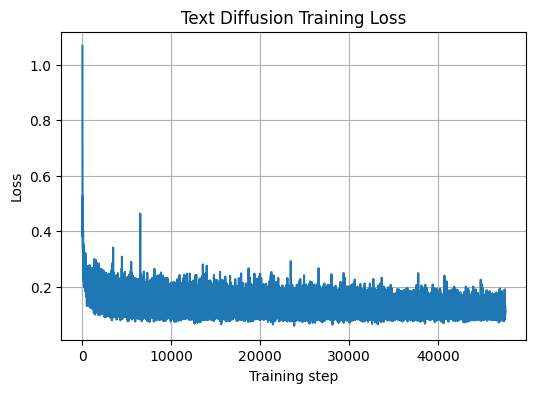

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(loss_history)
plt.xlabel("Training step")
plt.ylabel("Loss")
plt.title("Text Diffusion Training Loss")
plt.grid(True)
plt.show()

### What is actually being optimized?

The loss optimized here is a **sum of three terms**:

1. **Diffusion loss (MSE)**  
   Encourages the model to predict clean embeddings from noisy ones.

2. **Token reconstruction loss (Cross-Entropy)**  
   Ensures embeddings remain decodable into real words.

3. **Endpoint regularization**  
   Stabilizes behavior at the start and end of the diffusion chain.

This combination is what allows diffusion to work for text,
despite text being fundamentally discrete.

## Generating Text and Extracting Embeddings with a Diffusion Model

In this section, we will generate text from a trained text diffusion model.
Conceptually, this mirrors image diffusion — except we diffuse and denoise token embeddings instead of pixels.

### High-level intuition
Key idea

1.	Text is first represented as continuous embeddings

2.	The diffusion process:

	•	adds noise in embedding space (forward process)

	•	learns to remove noise (reverse process)

3.	Only at the very end do we convert embeddings → discrete tokens

This is why text diffusion is fundamentally harder than image diffusion:

> **language is discrete, but diffusion is continuous**

### Switch the model to evaluation mode

Before sampling, disable training-specific behavior.

In [ ]:
wrapped_model.eval()
torch.set_grad_enabled(False)

torch.autograd.grad_mode.set_grad_enabled(mode=False)

### What exactly does the model generate?

During sampling, the diffusion model produces a tensor:

In [ ]:
[batch_size, seq_len, embed_dim]

[16, 32, 64]

This represents denoised token embeddings, not tokens themselves.

We must decode them using the model’s LM head.


### Helper: decode embeddings → text

<font color="orange">Note:
We use greedy decoding for clarity. Sampling strategies (top-k, nucleus) can be added later.</font>

In [ ]:
def decode_embeddings(x, model, tokenizer):
    """
    Convert continuous embeddings into text via the LM head.

    x: Tensor of shape [B, L, D]
    """
    logits = model.get_logits(x)          # [B, L, vocab_size]
    token_ids = logits.argmax(dim=-1)     # greedy decoding

    texts = []
    for ids in token_ids:
        text = tokenizer.decode(
            ids.tolist(),
            skip_special_tokens=True
        )
        texts.append(text)
    return texts

### Sampling from pure noise (core diffusion loop)

This is the reverse diffusion process.

In [ ]:
import torch.nn.functional as F

def decode_by_nearest_embedding(x, model, tokenizer, topk=1):
    """
    x: [B, L, D] continuous embeddings
    Returns decoded strings by nearest neighbor in embedding table.
    """
    net = model.module  # underlying TransformerNetModel
    # Token embedding matrix: [V, D]
    E = net.word_embedding.weight  # on DEVICE
    E = F.normalize(E, dim=-1)
    x = F.normalize(x, dim=-1)

    # cosine sim: [B, L, V]
    sims = torch.matmul(x, E.t())

    # either argmax or sample among top-k
    if topk == 1:
        token_ids = sims.argmax(dim=-1)
    else:
        top = torch.topk(sims, k=topk, dim=-1).indices  # [B, L, K]
        # sample uniformly from top-k (simple)
        pick = torch.randint(0, topk, top.shape[:-1], device=x.device)
        token_ids = top.gather(-1, pick.unsqueeze(-1)).squeeze(-1)

    texts = []
    for ids in token_ids:
        texts.append(tokenizer.decode(ids.tolist(), skip_special_tokens=True))
    return texts

In [ ]:
batch_size = 4

sample_shape = (
    batch_size,
    cfg.sequence_len,
    cfg.in_channel,
)

samples = diffusion.p_sample_loop(
    model=wrapped_model,
    shape=sample_shape,
    device=DEVICE,
    progress=True,   # visualize denoising steps
)

  0%|          | 0/200 [00:00<?, ?it/s]

What happens internally:

```
Gaussian noise  →  x_T
x_T → x_{T-1} → ... → x_0  (learned denoising)
```

### Decode and inspect generated text

In [ ]:
texts = decode_by_nearest_embedding(samples, wrapped_model, tokenizer, topk=5)
for i, t in enumerate(texts, 1):
    print(f"\n=== Sample {i} ===\n{t}")


=== Sample 1 ===
bean lemon green almond cooked garlic cured pistachio poached endive delicious bean toasted grilled soft nectarine crispy collard date microwaved pomelo grapefruit papaya brussels endive carrot pumpkin candied banana black turnip green

=== Sample 2 ===
carrot the clementine yummy carrot raw - pomegranate persimmon poached crunchy pineapple banana fresh lychee brown the white pineapple brown . carrot cucumber rutabaga cucumber tamarind pomegranate sauteed . crispy lychee

=== Sample 3 ===
bean peach zucchini delicious almond deep yam pea brined raw blackberry creamy almond creamy tamarind tomato cucumber burnt toasted brown hazelnut persimmon pickled greasy poached mushroom kale - cucumber blue mushroom

=== Sample 4 ===
lettuce potato plum lentil sour banana jackfruit pomegranate tasty watermelon orange pink stir fish black lemon persimmon pear pistachio fried cantaloupe brown carrot black squash strawberry green cabbage kiwi coconut


What to expect

- Early training: short, repetitive, semi-grammatical phrases

- More training: clearer structure, dataset-specific patterns

- This is normal for text diffusion models

### Optional: control noise with top_p

You can limit extreme Gaussian noise during denoising:

In [ ]:
samples = diffusion.p_sample_loop(
    model=wrapped_model,
    shape=sample_shape,
    device=DEVICE,
    progress=True,
    top_p=0.9,   # lower = more conservative generation
)

  0%|          | 0/200 [00:00<?, ?it/s]

This often improves stability for small models.

In [ ]:
texts = decode_by_nearest_embedding(samples, wrapped_model, tokenizer, topk=5)
for i, t in enumerate(texts, 1):
    print(f"\n=== Sample {i} ===\n{t}")


=== Sample 1 ===
pear soybean pepper is stir - fried asparagus banana is microwaved green black banana rutabaga cauliflower yummy asparagus garlic banana the fried - eggplant cantaloupe rutabaga cucumber

=== Sample 2 ===
bean lettuce crispy cauliflower almond deep - hazelnut potato browned - garlic brown - durian blanched delicious purple turnip . hazelnut red cantaloupe grapefruit tamarind purple honeydew rutabaga fried crispy cabbage

=== Sample 3 ===
okra mushroom red squash starfruit tomato greasy black . - fried melon brown yummy - pistachio brown orange cantaloupe poached marinated green dried crispy fried soybean boiled

=== Sample 4 ===
is green soybean grapefruit fish cucumber fried ripe poached crunchy brown - pea melon grapefruit poached broccoli hazelnut pistachio papaya grapefruit fried cucumber papaya crispy juicy white .


### Baseline comparison: random embeddings

In [ ]:
random_embeds = torch.randn(sample_shape, device=DEVICE)
random_texts = decode_embeddings(random_embeds, wrapped_model, tokenizer)

print("\n--- Random baseline (no diffusion) ---")
for t in random_texts:
    print(t)


--- Random baseline (no diffusion) ---
salty ripe grapefruit yam cold brussels stewed hard stewed frozen cold hard starfruit watermelon olive microwaved greasy garlic yummy deep aged stewed fresh is bitter almond grapefruit
greasy pomelo boiled olive crispy coconut fresh lettuce chicory sauteed watermelon blackberry apricot cucumber rotten . - cantaloupe . stir sprout plum deep macadamia starfruit strawberry coconut
macadamia fermented cold grapefruit pomelo coconut burnt greasy yam mango plum cold strawberry hot pomelo olive is fig cucumber cauliflower blackberry hard fried turnip green burnt pineapple sauteed roasted
soybean sauteed apricot brussels grapefruit fermented - fluffy brussels jackfruit squash bitter jackfruit jackfruit microwaved microwaved apricot blackberry roasted stir roasted jackfruit sunflower grapefruit grape smoked baked


### Key takeaways

• Diffusion models for text operate in **continuous embedding space**

• Discrete tokens only appear at the **final decoding step**

• Training teaches the model to denoise embeddings, not tokens

• This explains why text diffusion is harder than image diffusion

### Extract token embeddings and visualize with PCA/UMAP

In [ ]:
def token_id_for_word(tokenizer, word: str):
    # HF-style tokenizers
    if hasattr(tokenizer, "encode"):
        ids = tokenizer.encode(word)
        # for single-word tokenizers, you often get special tokens too
        # keep only non-special if possible
        if hasattr(tokenizer, "all_special_ids"):
            ids = [i for i in ids if i not in set(tokenizer.all_special_ids)]
        return ids[0] if len(ids) > 0 else None
    return None

words = ["salty", "grapefruit", "cucumber", "fried", "squash", "bitter"]
word_to_id = {w: token_id_for_word(tokenizer, w) for w in words}
word_to_id

{'salty': 106,
 'grapefruit': 128,
 'cucumber': 48,
 'fried': 18,
 'squash': 50,
 'bitter': 56}

### Extract “static” token embeddings

In [ ]:
import torch
import numpy as np

def get_embedding_matrix(model):
    # works because our wrapper exposes .module
    net = model.module
    emb = net.word_embedding.weight.detach().cpu().numpy()  # [vocab, dim]
    return emb

E = get_embedding_matrix(wrapped_model)
E.shape

(165, 64)

In [ ]:
selected = [(w, i) for w, i in word_to_id.items() if i is not None]
selected

[('salty', 106),
 ('grapefruit', 128),
 ('cucumber', 48),
 ('fried', 18),
 ('squash', 50),
 ('bitter', 56)]

In [ ]:
vecs = np.stack([E[i] for _, i in selected], axis=0)  # [n, dim]
labels = [w for w, _ in selected]
vecs.shape, labels

((6, 64), ['salty', 'grapefruit', 'cucumber', 'fried', 'squash', 'bitter'])

### 2D visualization with PCA

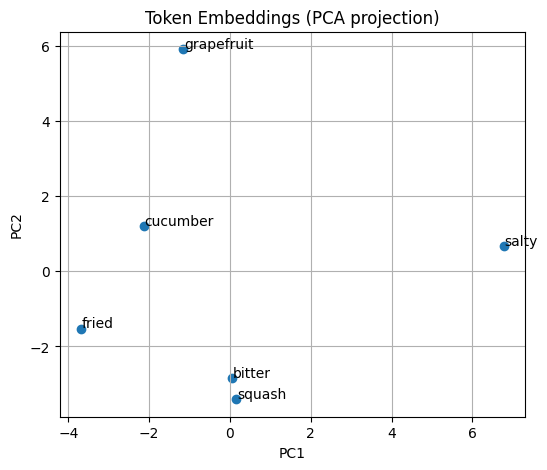

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
xy = pca.fit_transform(vecs)

plt.figure(figsize=(6, 5))
plt.scatter(xy[:, 0], xy[:, 1])

for (x, y), label in zip(xy, labels):
    plt.text(x + 0.02, y + 0.02, label)

plt.title("Token Embeddings (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

### Diffusion-specific embeddings: denoised contextual embeddings at different timesteps

This is the more diffusion-native view.

Idea:

- take a real sentence

- embed it → x₀

- add noise at timestep t → xₜ

- ask model to predict x₀ from xₜ

- extract the predicted embedding for certain positions/words

Encode one sentence and locate word positions

In [ ]:
sentence = "i love fried cucumber"
ids = tokenizer.encode(sentence)
# strip special tokens if present
if hasattr(tokenizer, "all_special_ids"):
    ids = [i for i in ids if i not in set(tokenizer.all_special_ids)]

# pad/truncate
pad_id = getattr(tokenizer, "pad_token_id", 0)
ids = ids[:cfg.sequence_len] + [pad_id] * (cfg.sequence_len - len(ids))

input_ids = torch.tensor([ids], device=DEVICE)
attention_mask = (input_ids != pad_id).long()
input_ids.shape

torch.Size([1, 32])

Pick a timestep grid:

In [ ]:
ts = [0, cfg.diffusion_steps//4, cfg.diffusion_steps//2, 3*cfg.diffusion_steps//4, cfg.diffusion_steps-1]
ts

[0, 50, 100, 150, 199]

Get predicted x0 embeddings at each timestep

In [ ]:
def predict_x0_embeddings_at_t(model, diffusion, input_ids, attention_mask, t_scalar: int):
    model.eval()
    B, L = input_ids.shape
    t = torch.full((B,), t_scalar, device=input_ids.device, dtype=torch.long)

    # x_start_mean from embeddings
    x0_mean = model.module.get_embeds(input_ids)  # [B, L, D]

    # create x0 sample with std at t=0 used in repo
    std0 = torch.tensor(diffusion.sqrt_one_minus_alphas_cumprod[0], device=input_ids.device).float()
    x0 = x0_mean + std0 * torch.randn_like(x0_mean)

    # forward diffuse to x_t
    noise = torch.randn_like(x0)
    x_t = diffusion.q_sample(x0, t, noise=noise)

    # model predicts x_start (since predict_xstart=True in your args)
    x0_pred = model(x_t, diffusion._scale_timesteps(t), attention_mask=attention_mask)

    return x0_pred.detach().cpu().numpy(), x0_mean.detach().cpu().numpy()

preds = []
for t in ts:
    x0_pred, x0_mean = predict_x0_embeddings_at_t(wrapped_model, diffusion, input_ids, attention_mask, t)
    preds.append((t, x0_pred[0], x0_mean[0]))  # [L, D]

Visualize how embeddings “move” across timesteps

In [ ]:
# Pick a few token positions (e.g., first 4 non-pad tokens):

nonpad = (input_ids[0].cpu().numpy() != pad_id).nonzero()[0].tolist()
positions = nonpad[:4]  # choose first few tokens
positions

[0, 1]

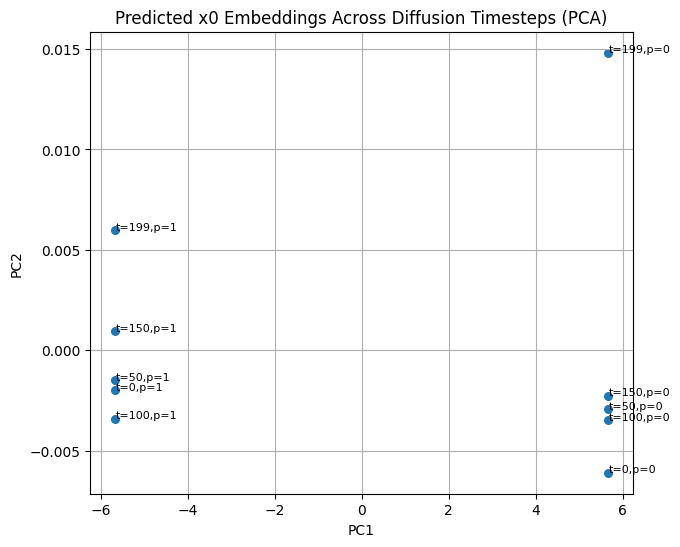

In [ ]:
# Now project the predicted embeddings to 2D with PCA (fit on all timesteps + positions):
all_vecs = []
all_labels = []
for t, x0_pred_LD, _ in preds:
    for pos in positions:
        all_vecs.append(x0_pred_LD[pos])
        all_labels.append((t, pos))

all_vecs = np.stack(all_vecs, axis=0)

pca = PCA(n_components=2)
xy = pca.fit_transform(all_vecs)

plt.figure(figsize=(7, 6))
plt.scatter(xy[:, 0], xy[:, 1], s=30)

# annotate: (t, pos)
for (x, y), (t, pos) in zip(xy, all_labels):
    plt.text(x + 0.02, y, f"t={t},p={pos}", fontsize=8)

plt.title("Predicted x0 Embeddings Across Diffusion Timesteps (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

### Homework Exericise

**1)** Play with hyper-parameters in `DiffusionConfig` class and report how 1 or 2 of them impacts model learning.

**2)** Propose one application of diffusion-based language models.

**3)** BONUS: What unique properties of language do diffusion-based embeddings encode that transformer-based embeddings fail to capture?